<div style="background-color:#a43820; color:white; padding:20px; text-align:center; font-weight:bold; border-radius: 8px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">

<h2 style="font-size: 24px;">Predicting future outcomes - Turtle Games</h2>
    
</div>

Our team of data analysts has been contracted to address critical business questions for Turtle Games:
  
  - We will explore how customers engage with and accumulate loyalty points;
  - How to segment customers for targeted marketing;
  - How to leverage text data from customer reviews to inform marketing strategies and business improvements.

<div style="color:#a43820; font-weight:bold;">
    
## Import modules and display user-defined functions
    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

import contractions
import re
import nltk
from nltk import word_tokenize, pos_tag
from collections import defaultdict
from collections import Counter
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import Counter.
from collections import Counter

# Setting for this notebook.
%matplotlib inline

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set a style for the graphs.

import matplotlib.style as style

style.use('fivethirtyeight')
sns.set_context('talk')

<span style="color: #808080; font-style: italic;">User-defined functions</span>

In [3]:
def calculate_quantiles_and_outliers(name, column):
    '''This is a user-defined function to calculate quantiles, Interquartile range and upper and lower limits'''
    q1_name = round(column.quantile(0.25), 2)
    q3_name = round(column.quantile(0.75), 2)
    IQR_name = round(q3_name - q1_name, 2)
    upper_limit_name = round(q3_name + 1.5 * IQR_name, 2)
    lower_limit_name = round(q1_name - 1.5 * IQR_name, 2)
    max_value_name = column.max()
    min_value_name = column.min()

    print("Quantile 1 -", q1_name)
    print("Quantile 3 -", q3_name)
    print("Interquartile Range -", IQR_name)
    print("Lower Limit -", lower_limit_name)
    print("Lower Value -", min_value_name)
    print("Upper Limit -", upper_limit_name)
    print("Upper Value -", max_value_name)
    
    quantile_info = {
    "Quantile 1": q1_name,
    "Quantile 3": q3_name,
    "Interquartile Range": IQR_name,
    "Lower Limit": lower_limit_name,
    "Lower Value": min_value_name,
    "Upper Limit": upper_limit_name,
    "Upper Value": max_value_name
    }

    if (max_value_name > upper_limit_name) or (min_value_name < lower_limit_name):
        print('There is at least one outlier to be removed.')
        return quantile_info
    else:
        print('There are no outliers to be removed.')
        return quantile_info        


def barplot(column1, column2, df, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label'):
    '''This user-defined function creates a bar chart.'''
    plt.figure(figsize = (12,8))
    sns.barplot(x = column1, y = column2, data = df, color = '#a43820')
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel(xlabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.tight_layout()
    plt.show()


def histogram(column1, df, number_bins, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label'):
    '''This user-defined function creates a histogram chart.'''
    plt.figure(figsize=(12, 8))
    sns.histplot(df[column1], bins = number_bins, color = '#a43820', alpha = 1)
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel(xlabel, color = '#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color = '#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.tight_layout()
    plt.show()


def boxplot(column1, column2, df, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label'):
    '''This user-defined function creates a boxplot chart.'''
    plt.figure(figsize=(12, 8))
    sns.boxplot(x = column1, y = column2, data = df, color = '#a43820')
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel(xlabel, color = '#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color = '#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.tight_layout()
    plt.show()


def scatterplot(column1, column2, df, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label'):
    '''This user-defined function creates a scatter plot.'''
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = column1, y = column2, data = df, color = '#a43820')
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel(xlabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.tight_layout()
    plt.show()
    

def scatterplot_for_clustering(column1, column2, df, hue, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label', titlelegend = 'Legend'):
    '''This user-defined function creates a scatter plot with a third variable as hue.'''
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = column1, y = column2, data = df, hue = hue, color = '#a43820', palette = 'bright')
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel(xlabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.legend(title = titlelegend, fontsize = 'x-small', title_fontsize = 'small', loc = 'best', bbox_to_anchor = (1.02, 1))
    plt.tight_layout()
    plt.show()


def scatter_regression_line(column1, column2, column3, title = 'Chart', xlabel = 'X Label', ylabel = 'Y label'):
    '''This user-defined function creates a scatter plot with a regression line.'''
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = column1, y = column2, color = '#a43820')
    plt.plot(column1, column3, color = 'blue')
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel(xlabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel(ylabel, color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth=0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.tight_layout()
    plt.show()


def scatter_residuals(column1, column2, title = 'Chart'):
    '''This user-defined function creates a scatter plot for residuals.'''
    plt.figure(figsize = (12,8))
    plt.scatter(column1, column2, alpha=0.5, color = '#a43820')
    plt.axhline(y = 0, color = 'blue', linestyle = '--')
    plt.title(title, color = '#a43820', size = 25, pad = 20)
    plt.xlabel('Predicted Charges', color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.ylabel('Residuals', color ='#a43820', size = 15, ha = 'center', labelpad = 20)
    plt.grid(False, axis = 'x')
    plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
    plt.xticks(size = 11)
    plt.yticks(size = 11)
    plt.tight_layout()
    plt.show()

<div style="color:#a43820; font-weight:bold;">
    
## Load, sense-check the data and some cleaning
    
</div>

**Create the DataFrame**

In [4]:
# Import the data.
reviews = pd.read_csv('turtle_reviews.csv')

# Visualize the first 5 rows.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [5]:
# Make a copy of the raw data before starting to wrangle the data.
reviews_raw = reviews.copy()

In [6]:
# Check shape of dataset and the columns.
print(reviews.shape)
print(reviews.columns)

(2000, 11)
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


In [7]:
# Check columns and data types.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [8]:
# Information about the numerical columns.
reviews.describe().round(2)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.00            2000.00                 2000.00         2000.00   
mean     39.49              48.08                   50.00         1578.03   
std      13.57              23.12                   26.09         1283.24   
min      17.00              12.30                    1.00           25.00   
25%      29.00              30.34                   32.00          772.00   
50%      38.00              47.15                   50.00         1276.00   
75%      49.00              63.96                   73.00         1751.25   
max      72.00             112.34                   99.00         6847.00   

        product  
count   2000.00  
mean    4320.52  
std     3148.94  
min      107.00  
25%     1589.25  
50%     3624.00  
75%     6654.00  
max    11086.00

In [9]:
# Information about the other columns.
reviews.describe(include='O')

gender education language platform   review     summary
count     2000      2000     2000     2000     2000        2000
unique       2         5        1        1     1980        1432
top     Female  graduate       EN      Web  love it  Five Stars
freq      1120       900     2000     2000        5         378

In [10]:
# Check number of unique values.
reviews.nunique()

gender                       2
age                         45
remuneration (k£)           64
spending_score (1-100)      84
loyalty_points             627
education                    5
language                     1
platform                     1
product                    200
review                    1980
summary                   1432
dtype: int64

In [11]:
# Check for duplicate values.
reviews.duplicated().sum()

0

In [12]:
# Check for missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

The DataFrame does not have any duplicated rows or missing values.

**Drop columns**

In [13]:
# Let's remove Language and Platform because they are redundant (just one unique value).
reviews.drop(columns = ['language', 'platform'], inplace = True)

In [14]:
# Review shape of the new dataframe.
reviews.shape

(2000, 9)

**Clean Education Values**

In [15]:
# Check the values for Education.
reviews['education'].unique()

array(['graduate', 'PhD', 'diploma', 'postgraduate', 'Basic'],
      dtype=object)

In [16]:
# Capitalize the first letter of each value in the "education" column. It will improve consistency of the data.
reviews['education'] = reviews['education'].str.capitalize()

In [17]:
# Review the column values.
reviews['education'].unique()

array(['Graduate', 'Phd', 'Diploma', 'Postgraduate', 'Basic'],
      dtype=object)

**Convert Product to a string**

In [18]:
# Since Product represents a ID of the product, converting to a string makes it clear that it represents categorical data.
reviews['product'] = reviews['product'].astype(str)

**Change Column names**

In [19]:
# Rename the columns.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration',
                                  'spending_score (1-100)': 'spending_score'})

# Visualize.
print(reviews.shape)
print(reviews.head())
print(reviews.info())

(2000, 9)
   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product                                             review  \
0     453  When it comes to a DM's screen, the space on t...   
1     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     254  Nice art, nice printing.  Why two panels are f...   
3     263  Amazing buy! Bought it as a gift for our new d...   
4     291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from.

**Check Outliers**

In [20]:
# Check if there are outliers for Age.
age_outliers = calculate_quantiles_and_outliers('age', reviews['age'])

Quantile 1 - 29.0
Quantile 3 - 49.0
Interquartile Range - 20.0
Lower Limit - -1.0
Lower Value - 17
Upper Limit - 79.0
Upper Value - 72
There are no outliers to be removed.


In [21]:
# Check if there are outliers for Remuneration.
remuneration_outliers = calculate_quantiles_and_outliers('remuneration', reviews['remuneration'])

Quantile 1 - 30.34
Quantile 3 - 63.96
Interquartile Range - 33.62
Lower Limit - -20.09
Lower Value - 12.3
Upper Limit - 114.39
Upper Value - 112.34
There are no outliers to be removed.


In [22]:
# Check if there are outliers for Spending Score.
spending_score_outliers = calculate_quantiles_and_outliers('spending_score', reviews['spending_score'])

Quantile 1 - 32.0
Quantile 3 - 73.0
Interquartile Range - 41.0
Lower Limit - -29.5
Lower Value - 1
Upper Limit - 134.5
Upper Value - 99
There are no outliers to be removed.


In [23]:
# Check if there are outliers for Loyalty Points.
loyality_points_outliers = calculate_quantiles_and_outliers('loyalty_points', reviews['loyalty_points'])

Quantile 1 - 772.0
Quantile 3 - 1751.25
Interquartile Range - 979.25
Lower Limit - -696.88
Lower Value - 25
Upper Limit - 3220.12
Upper Value - 6847
There is at least one outlier to be removed.


In [24]:
# Filter the values above the upper limit.
over = reviews[reviews['loyalty_points'] > loyality_points_outliers['Upper Limit']]

# Check the number of records over the upper limit.
over.shape[0]

266

Outliers will be kept because they provide essential information to the high loyalty points values.

<div style="color:#a43820; font-weight:bold;">
    
## Exploratory Data Analysis
    
</div>

**Create a client ID column**

Each row represents a purchase. I make an assumption that each combination of Age + Remuneration + Gender + Spending Score + Education is unique and it corresponds to a different client.

A column called number_of_sales was created. It corresponds to the number of rows that each customer appears and, consequently, the number of products sold to that client.

In [25]:
# Subset the data to get a different row for each client.
clients = reviews.groupby(['age', 'remuneration', 'spending_score', 'gender', 'education'])['product'].count().reset_index()

# Visualize the corresponding clients dataframe.
clients.head()

age  remuneration  spending_score  gender     education  product
0   17         13.94              40  Female  Postgraduate        1
1   17         18.86              98    Male           Phd        1
2   17         27.06               4    Male           Phd        1
3   17         27.06              92    Male           Phd        7
4   17         35.26              54  Female  Postgraduate        1

In [26]:
# Number of clients.
clients.shape[0]

782

The reviews dataframe corresponds to 2000 sales. In this case, we have only 782 clients to whom Turtle Games made those sales.

In [27]:
# Rename product as number of sales.
clients = clients.rename(columns={'product': 'number_of_sales'})

In [28]:
# Check the average number of sales per client.
round(clients['number_of_sales'].mean(), 2)

2.56

In [29]:
# Create an ID variable for each client.
clients['client_id'] = range(1, len(clients) + 1)

# Check the first and last rows.
clients

age  remuneration  spending_score  gender     education  number_of_sales  \
0     17         13.94              40  Female  Postgraduate                1   
1     17         18.86              98    Male           Phd                1   
2     17         27.06               4    Male           Phd                1   
3     17         27.06              92    Male           Phd                7   
4     17         35.26              54  Female  Postgraduate                1   
..   ...           ...             ...     ...           ...              ...   
777   72         37.72              56    Male  Postgraduate                7   
778   72         39.36              47    Male           Phd                1   
779   72         40.18              55    Male           Phd                7   
780   72         66.42              93    Male           Phd                1   
781   72        112.34              18    Male           Phd                1   

     client_id  
0            1  
1            2  
2            3  
3            4  
4            5  
..         ...  
777        778  
778        779  
779        780  
780        781  
781        782  

[782 rows x 7 columns]

In [30]:
# Join the two DataFrames to have client_id in the reviews DataFrame.
reviews_id = pd.merge(reviews, clients, on = ['age', 'remuneration', 'spending_score', 'gender', 'education'], how = 'left')

# Drop number_of_sales from this dataset.
reviews_id = reviews_id.drop(columns=['number_of_sales'])

# Visualize.
reviews_id

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  Graduate   
1       Male   23         12.30              81             524  Graduate   
2     Female   22         13.12               6              40  Graduate   
3     Female   25         13.12              77             562  Graduate   
4     Female   33         13.94              40             366  Graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       Phd   
1996  Female   43         92.66               8             539       Phd   
1997    Male   34         92.66              91            5614  Graduate   
1998    Male   34         98.40              16            1048       Phd   
1999    Male   32         92.66               8             479       Phd   

     product                                             review  \
0        453  When it comes to a DM's screen, the space on t...   
1        466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2        254  Nice art, nice printing.  Why two panels are f...   
3        263  Amazing buy! Bought it as a gift for our new d...   
4        291  As my review of GF9's previous screens these w...   
...      ...                                                ...   
1995     977  The perfect word game for mixed ages (with Mom...   
1996     979  Great game.  Did not think I would like it whe...   
1997    1012  Great game for all.........\nKeeps the mind ni...   
1998    1031                                          fun game!   
1999     453  This game is fun. A lot like scrabble without ...   

                                                summary  client_id  
0     The fact that 50% of this space is wasted on a...         13  
1     Another worthless Dungeon Master's screen from...         69  
2                       pretty, but also pretty useless         50  
3                                            Five Stars        101  
4                                            Money trap        246  
...                                                 ...        ...  
1995     The perfect word game for mixed ages (with Mom        380  
1996                                          Super fun        520  
1997                                         Great Game        312  
1998                                         Four Stars        313  
1999                                     Love this game        242  

[2000 rows x 10 columns]

In [31]:
# Check an example of a client with multiple purchases.
client_id_780 = reviews_id[reviews_id['client_id'] == 780]

# Visualize the purchases.
client_id_780

gender  age  remuneration  spending_score  loyalty_points education  \
70     Male   72         40.18              55            1322       Phd   
270    Male   72         40.18              55            1322       Phd   
470    Male   72         40.18              55            1322       Phd   
670    Male   72         40.18              55            1322       Phd   
870    Male   72         40.18              55            1322       Phd   
1070   Male   72         40.18              55            1322       Phd   
1270   Male   72         40.18              55            1322       Phd   

     product                                             review  \
70      9530                        AGE APPROPIATE. G'SON LOVED   
270     9560  I bought this for an adult crafter. While she ...   
470     9560  Great to use with kids who need support with s...   
670     9597  Love these magnets, they are adorable! Just a ...   
870     1581  I have always loved this game. It is as much o...   
1070    2521  i haven't had a full chance to play with it ye...   
1270    6646  It's just beautiful work. And the box is also ...   

                                                summary  client_id  
70                                           Five Stars        780  
270                                     Not Enough Yarn        780  
470   Great to use with kids who need support with s...        780  
670                                           Too cute!        780  
870                                    One of the best!        780  
1070                                         WoA review        780  
1270                                            Awesome        780

In [32]:
# Check another example of a client with multiple purchases.
client_id_778 = reviews_id[reviews_id['client_id'] == 778]

# Visualize the purchases.
client_id_778

gender  age  remuneration  spending_score  loyalty_points     education  \
60     Male   72         37.72              56            1264  Postgraduate   
260    Male   72         37.72              56            1264  Postgraduate   
460    Male   72         37.72              56            1264  Postgraduate   
660    Male   72         37.72              56            1264  Postgraduate   
860    Male   72         37.72              56            1264  Postgraduate   
1060   Male   72         37.72              56            1264  Postgraduate   
1260   Male   72         37.72              56            1264  Postgraduate   

     product                                             review  \
60       876  I was happy to find this little sticker book. ...   
260     4459  A really fun and creative craft!  This book is...   
460     4459  I'm a MHR social worker, and my clients love p...   
660      326  LOVE these puzzles!!  This one is a gift but w...   
860     9507  It is a fun game.  I enjoyed playing it becaus...   
1060    9596  I love this game.  One of the best things abou...   
1260    1592  The D&D master tiles sets are a much better va...   

                                    summary  client_id  
60           Robot themed gift for 6 yr old        778  
260         A really fun and creative craft        778  
460   and my clients love playing this game        778  
660                      LOVE these puzzles        778  
860                       It is a fun game.        778  
1060                               Fun game        778  
1260                   Master sets are best        778

Loyalty Points are indexed by the client, not by each purchase made. I am going to add the number of loyalty points to the client's
table.

In [33]:
# Filtering the reviews table to have client_id and loyalty_points.
reviews_clients = reviews_id[['client_id', 'loyalty_points']]

# Number of duplicates.
print("Number of Duplicates -", reviews_clients.duplicated().sum())

Number of Duplicates - 1218


In [34]:
# Each unique value is giving us a different client, so we will drop duplicates.

# Removing duplicates to have unique values for clients and loyalty_points.
reviews_clients_unique  = reviews_clients.drop_duplicates()

# Check the number of rows.
reviews_clients_unique.shape

(782, 2)

In [35]:
# Add the loyalty points to the clients view.
clients_final = pd.merge(clients, reviews_clients_unique, on = 'client_id', how = 'left')

# Visualize.
clients_final.head()

age  remuneration  spending_score  gender     education  number_of_sales  \
0   17         13.94              40  Female  Postgraduate                1   
1   17         18.86              98    Male           Phd                1   
2   17         27.06               4    Male           Phd                1   
3   17         27.06              92    Male           Phd                7   
4   17         35.26              54  Female  Postgraduate                1   

   client_id  loyalty_points  
0          1             233  
1          2             774  
2          3              45  
3          4            1042  
4          5             797

**Univariate Analysis**

<span style="color: #808080; font-style: italic;">Gender</span>

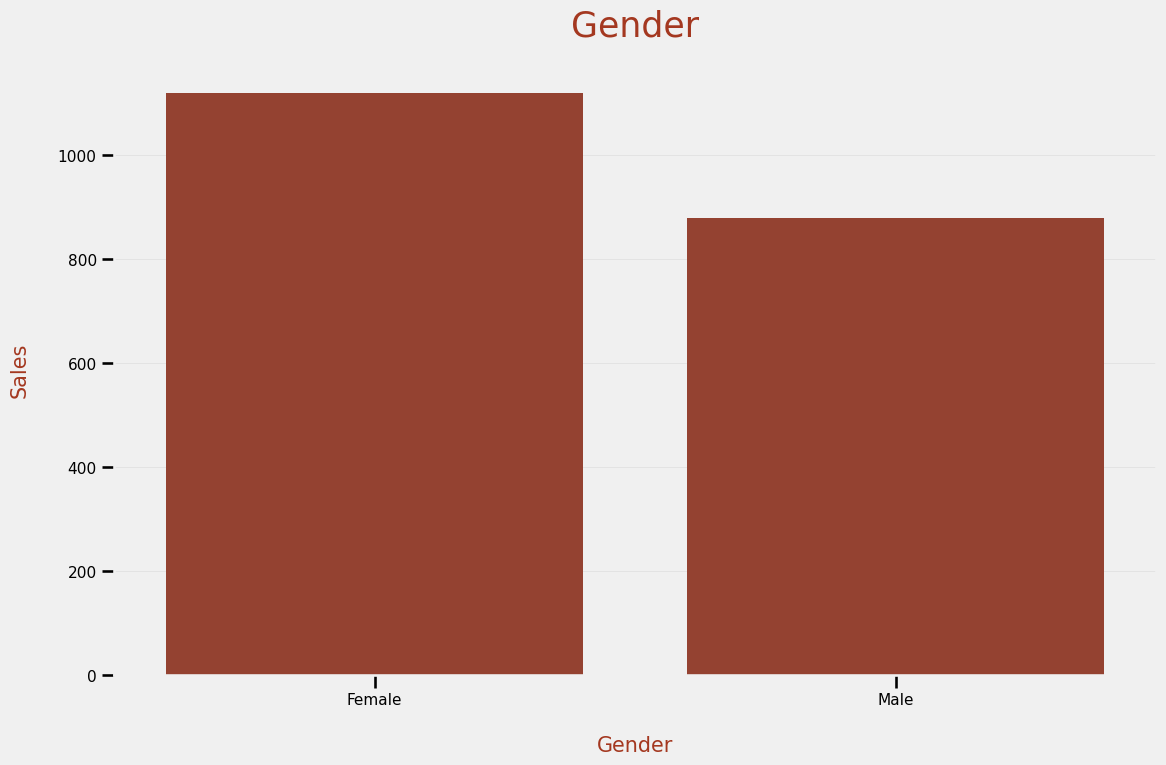

In [36]:
# Filter reviews per gender.
gender_sales = reviews.groupby('gender')['gender'].value_counts().reset_index()

# Visualize a bar chart of gender per sales.
barplot('gender', 'count', gender_sales,
        title = 'Gender',
        xlabel = 'Gender',
        ylabel = 'Sales')

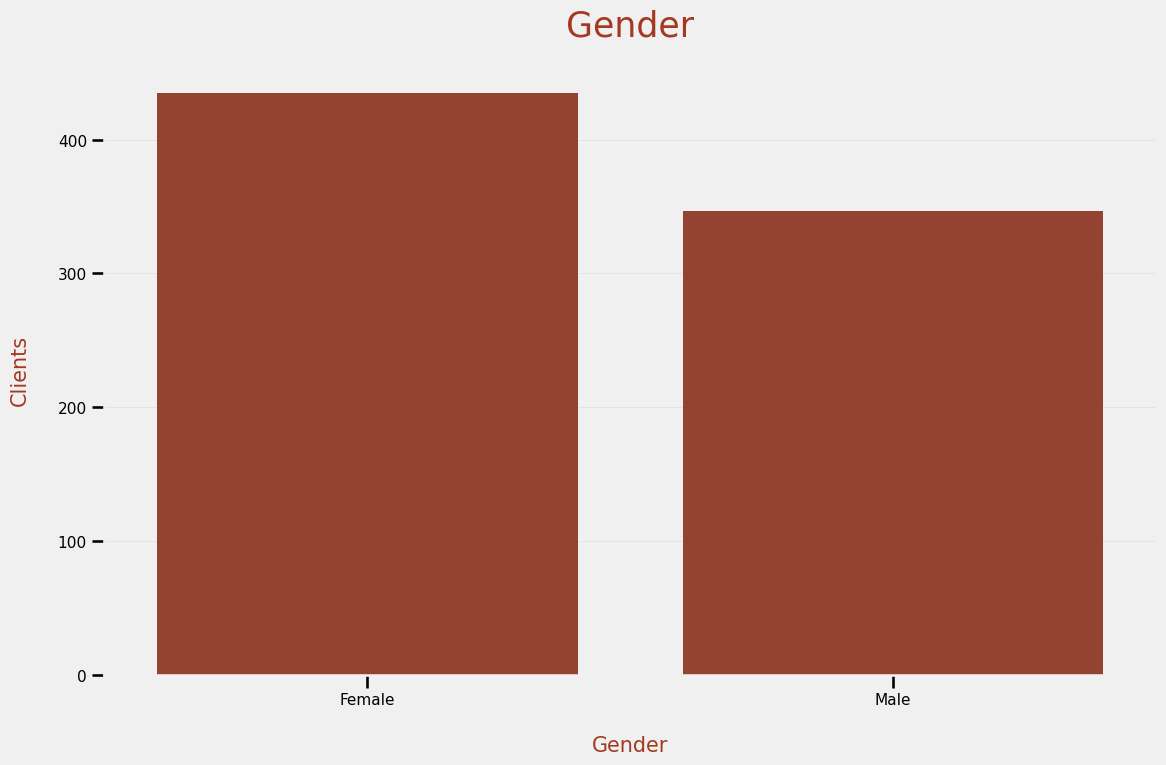

In [37]:
# Filter clients per gender.
gender_clients = clients_final.groupby('gender')['gender'].value_counts().reset_index()

# Visualize the number of clients per gender.
barplot('gender', 'count', gender_clients,
        title = 'Gender',
        xlabel = 'Gender',
        ylabel = 'Clients')

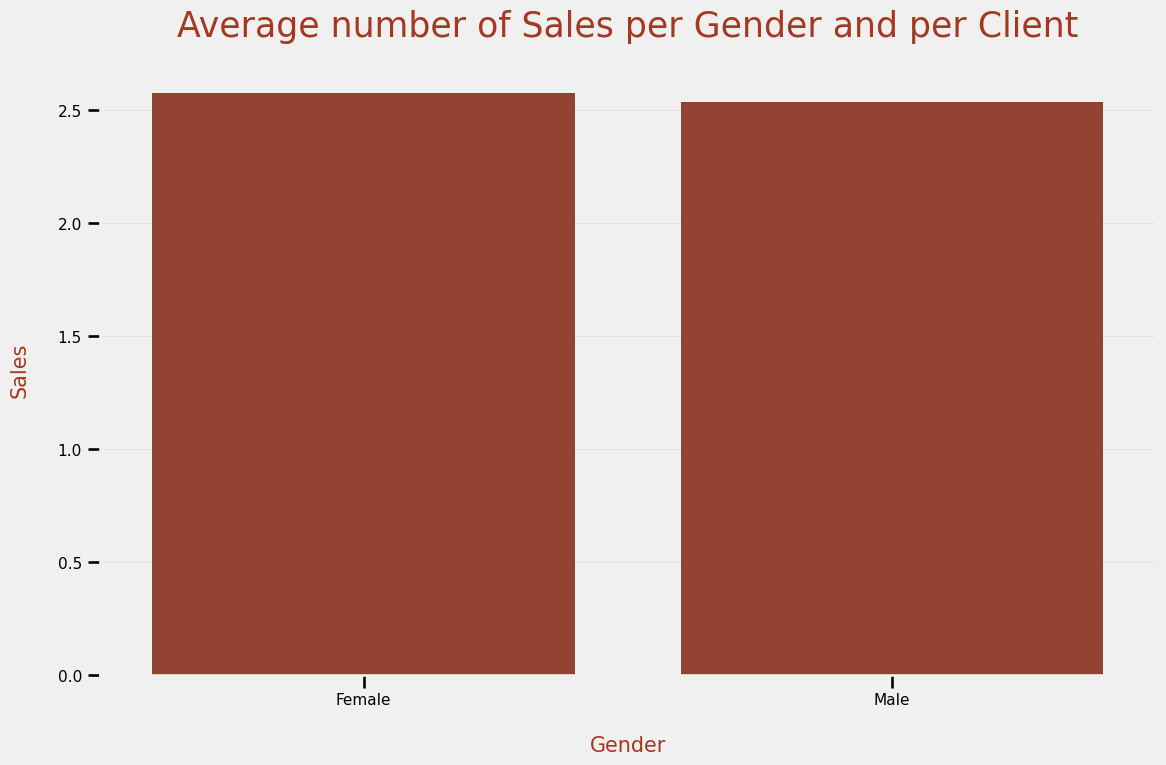

In [38]:
# Filter clients per gender.
gender_mean = clients_final.groupby('gender')['number_of_sales'].mean().reset_index()

# Visualize the average number of sales per gender and client.
barplot('gender', 'number_of_sales', gender_mean,
        title = 'Average number of Sales per Gender and per Client',
        xlabel = 'Gender',
        ylabel = 'Sales')

Our sales show that there are more Female clients than Male clients. The average number of sales per gender is similar so the sales have an equal distribution to the number of clients.

<span style="color: #808080; font-style: italic;">Education</span>

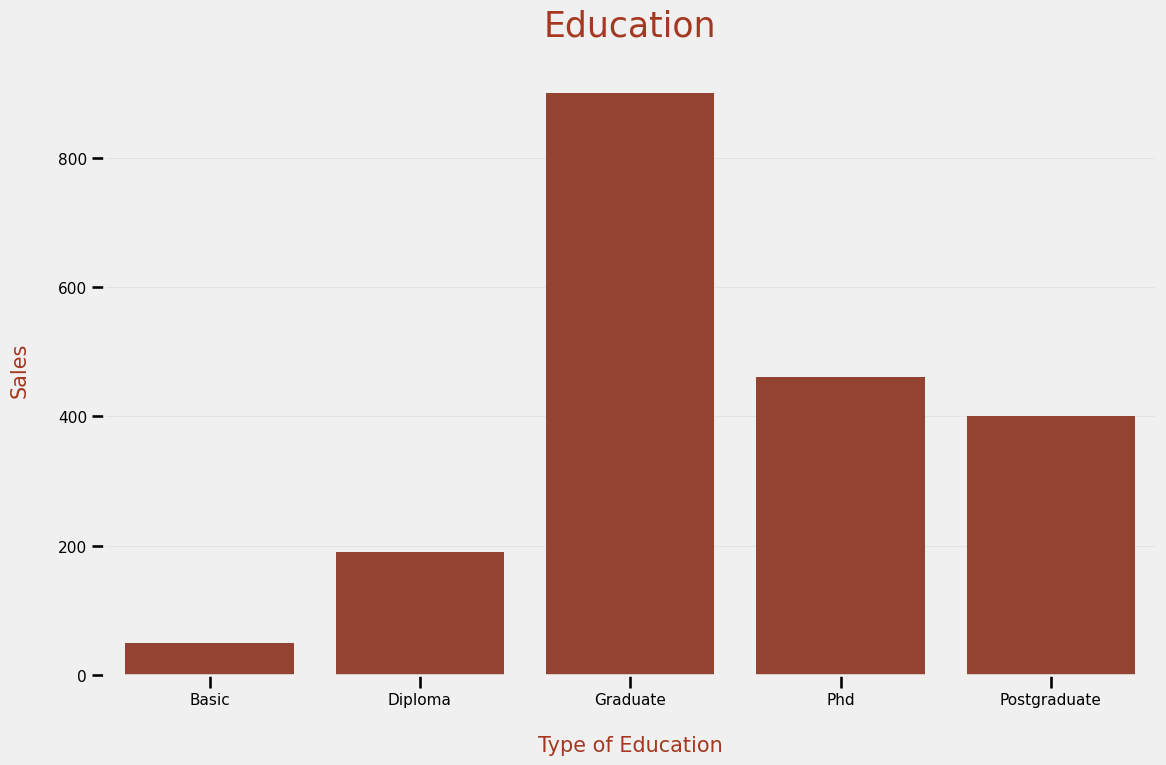

In [39]:
# Filter sales per education.
education_sales = reviews.groupby('education')['education'].value_counts().reset_index()

# Visualize the sales per type of education.
barplot('education', 'count', education_sales,
        title = 'Education',
        xlabel = 'Type of Education',
        ylabel = 'Sales')

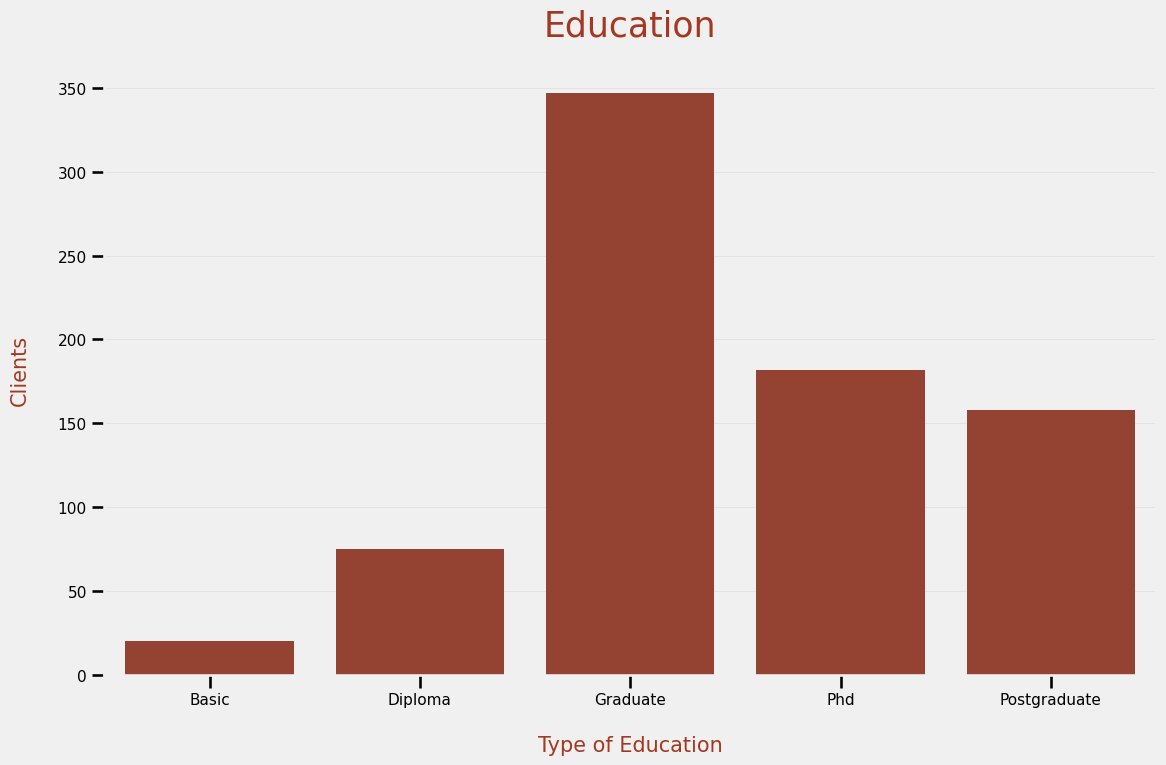

In [40]:
# Filter clients per education.
education_clients = clients_final.groupby('education')['education'].value_counts().reset_index()

# Visualize the number of clients per gender.
barplot('education', 'count', education_clients,
        title = 'Education',
        xlabel = 'Type of Education',
        ylabel = 'Clients')

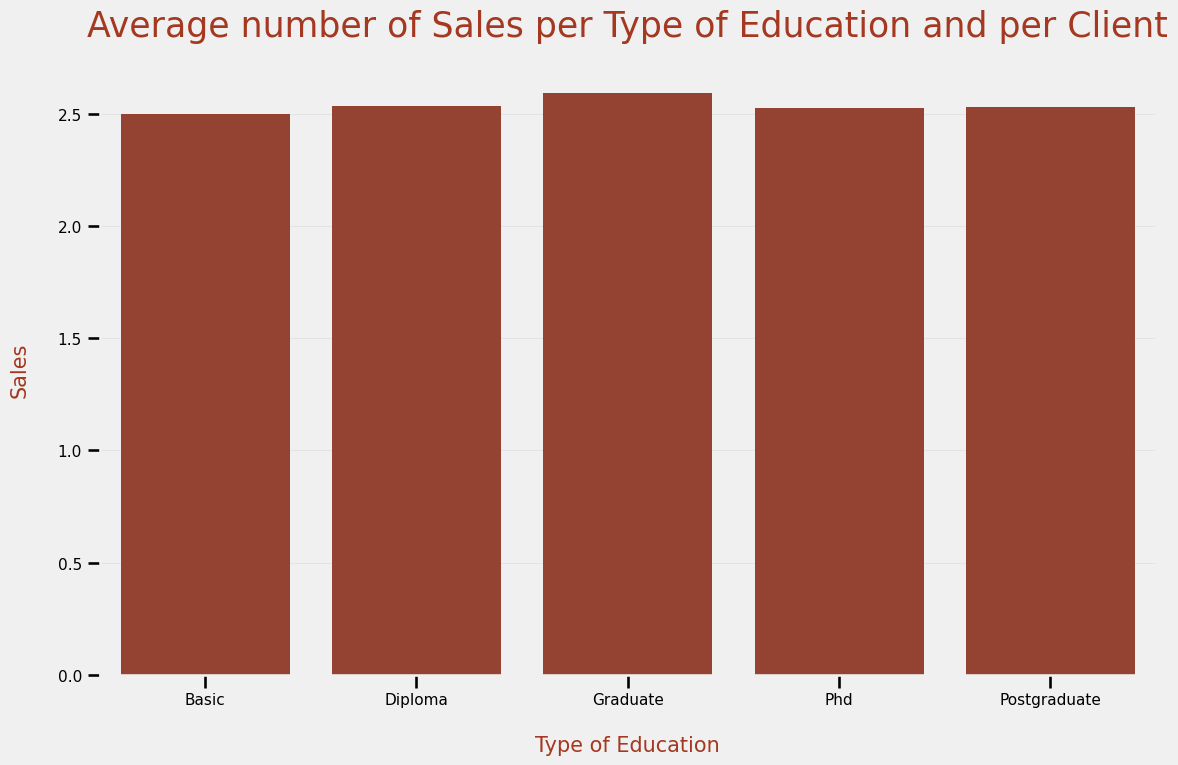

In [41]:
# Filter clients per education.
education_mean = clients_final.groupby('education')['number_of_sales'].mean().reset_index()

# Visualize the average number of sales per type of client and client.
barplot('education', 'number_of_sales', education_mean,
        title = 'Average number of Sales per Type of Education and per Client',
        xlabel = 'Type of Education',
        ylabel = 'Sales')

We see the same behavior in terms of the average number of sales across all types of Education. Our number one type of clients are graduates, and most of them have a superior education.

<span style="color: #808080; font-style: italic;">Age</span>

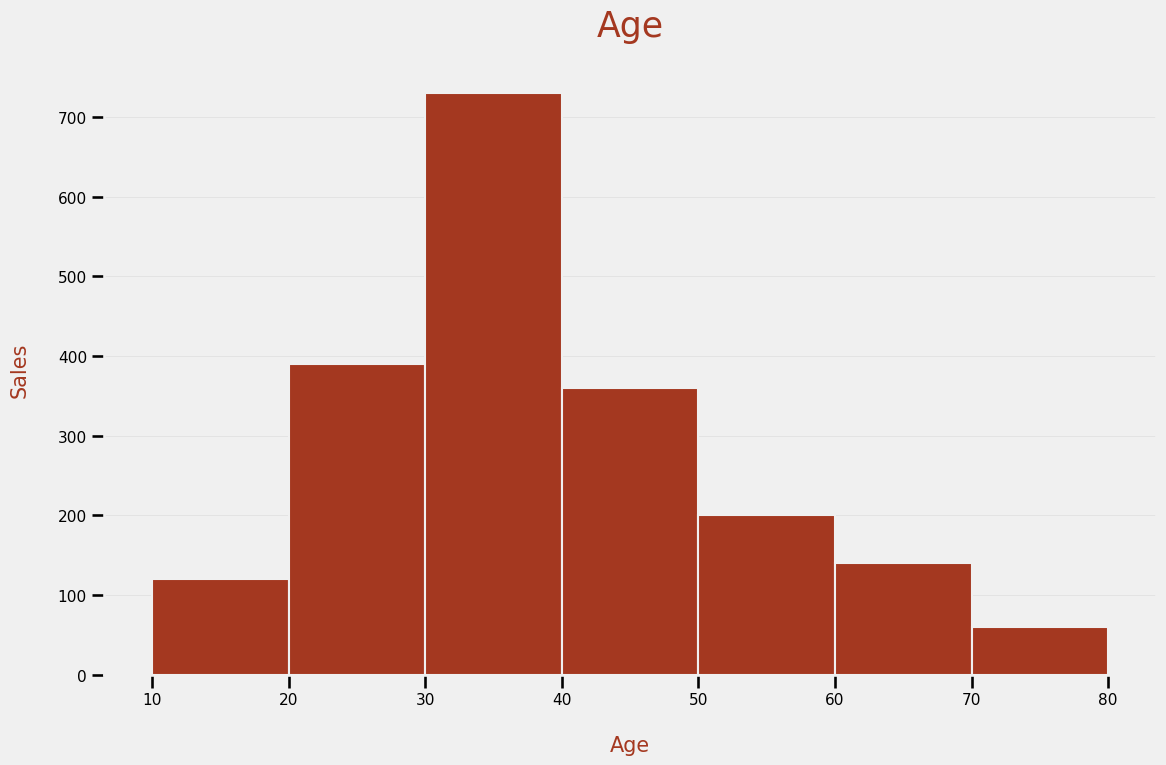

In [42]:
# Visualize sales per age.
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
histogram('age', reviews, age_bins,
          title = 'Age',
          xlabel = 'Age',
          ylabel = 'Sales')

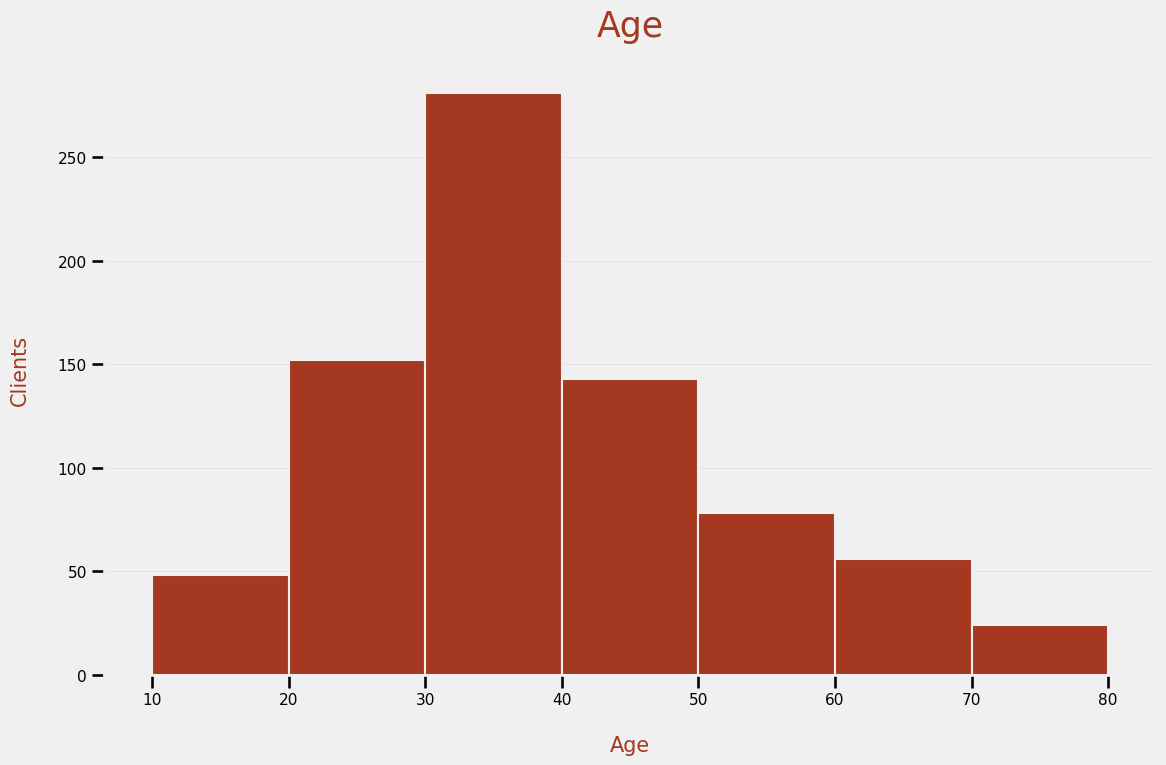

In [43]:
# Visualize clients per age.
histogram('age', clients_final, age_bins,
          title = 'Age',
          xlabel = 'Age',
          ylabel = 'Clients')

Turtle Games clients are mainly between 20 and 50 years old, with the main group being between 30 and 40.

<span style="color: #808080; font-style: italic;">Remuneration</span>

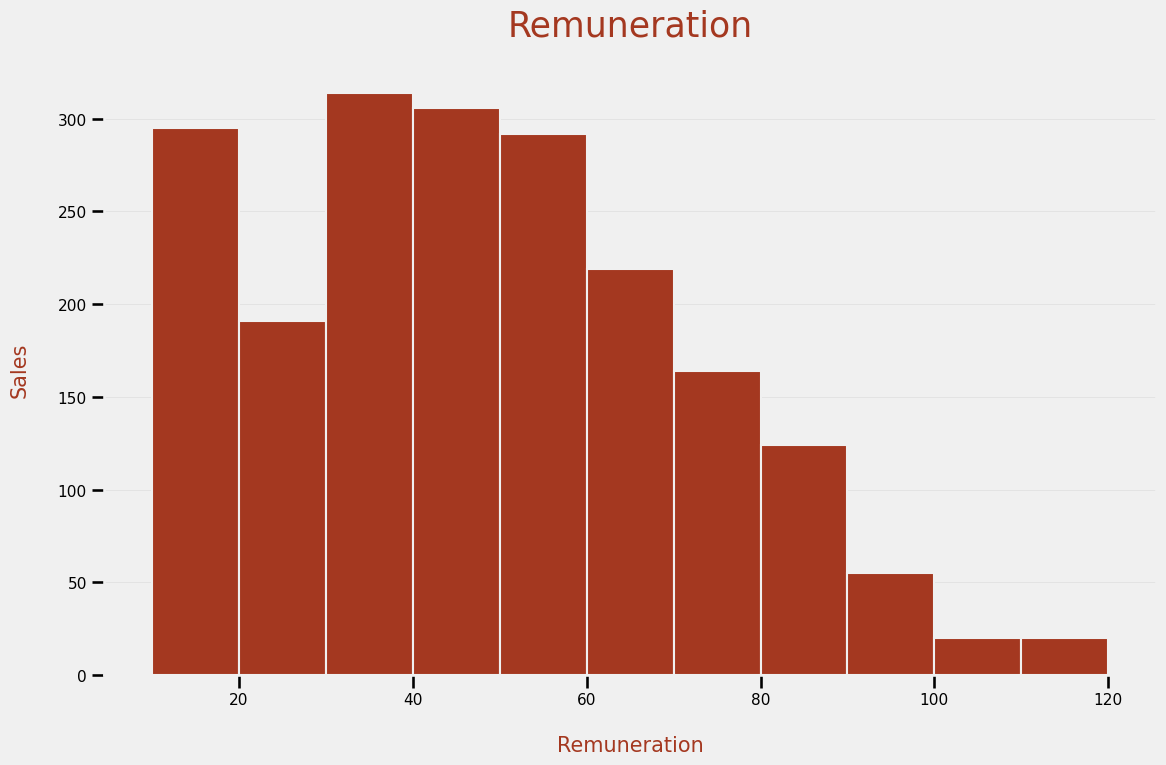

In [44]:
# Visualize sales per remuneration.
remuneration_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
histogram('remuneration', reviews, remuneration_bins,
          title = 'Remuneration',
          xlabel = 'Remuneration',
          ylabel = 'Sales')

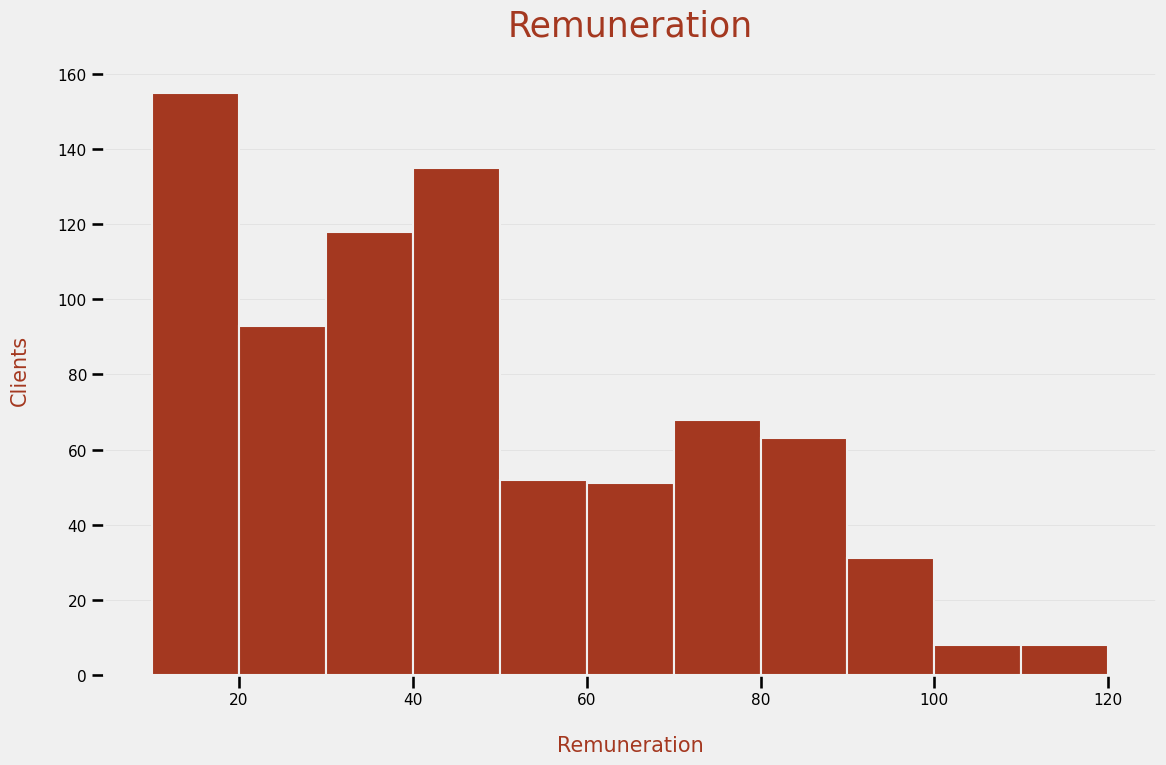

In [45]:
# Visualize clients per remuneration.
histogram('remuneration', clients_final, remuneration_bins,
          title = 'Remuneration',
          xlabel = 'Remuneration',
          ylabel = 'Clients')

In terms of sales, we can see the groups between 30 and 60 thousand being the ones that drive more sales as well as the group with less than 20 thousand. In terms of clients, the group with less than 10 thousand is the main group of our clients. We can conclude that clients between 30 and 60 thousand make more repeated purchases.

<span style="color: #808080; font-style: italic;">Spending Score</span>

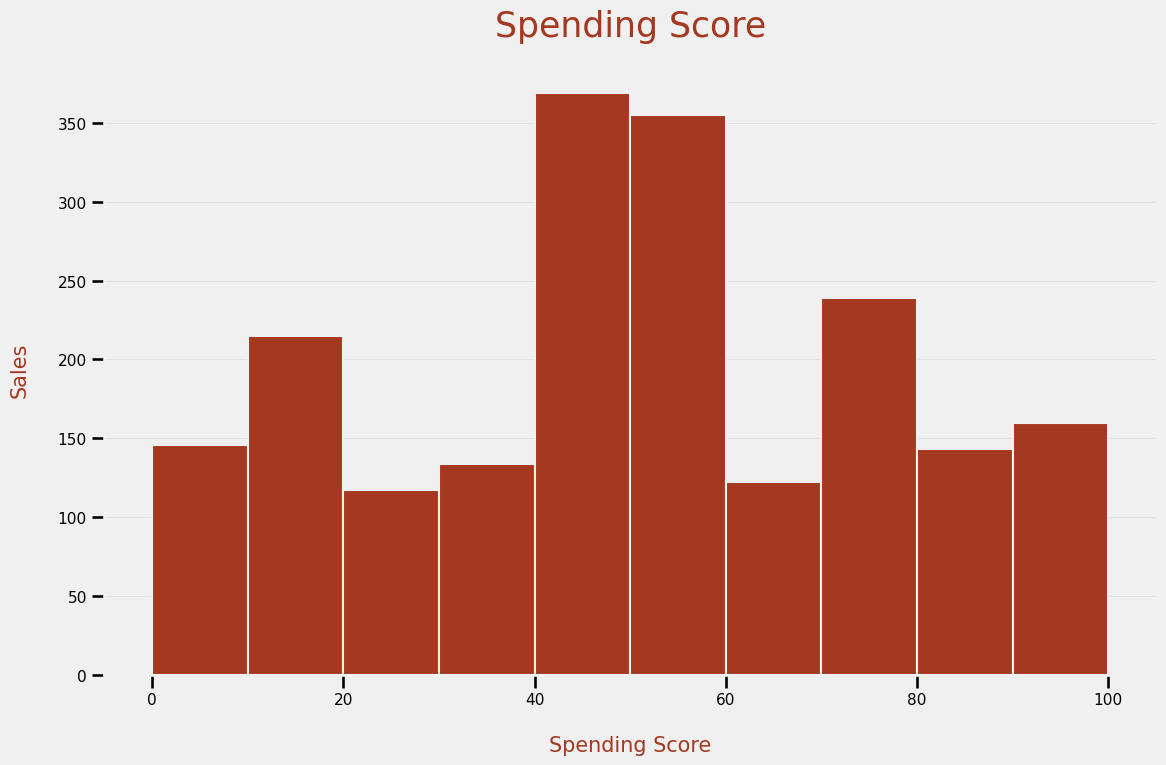

In [46]:
# Visualize sales per spending score.
spending_score_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
histogram('spending_score', reviews, spending_score_bins,
          title = 'Spending Score',
          xlabel = 'Spending Score',
          ylabel = 'Sales')

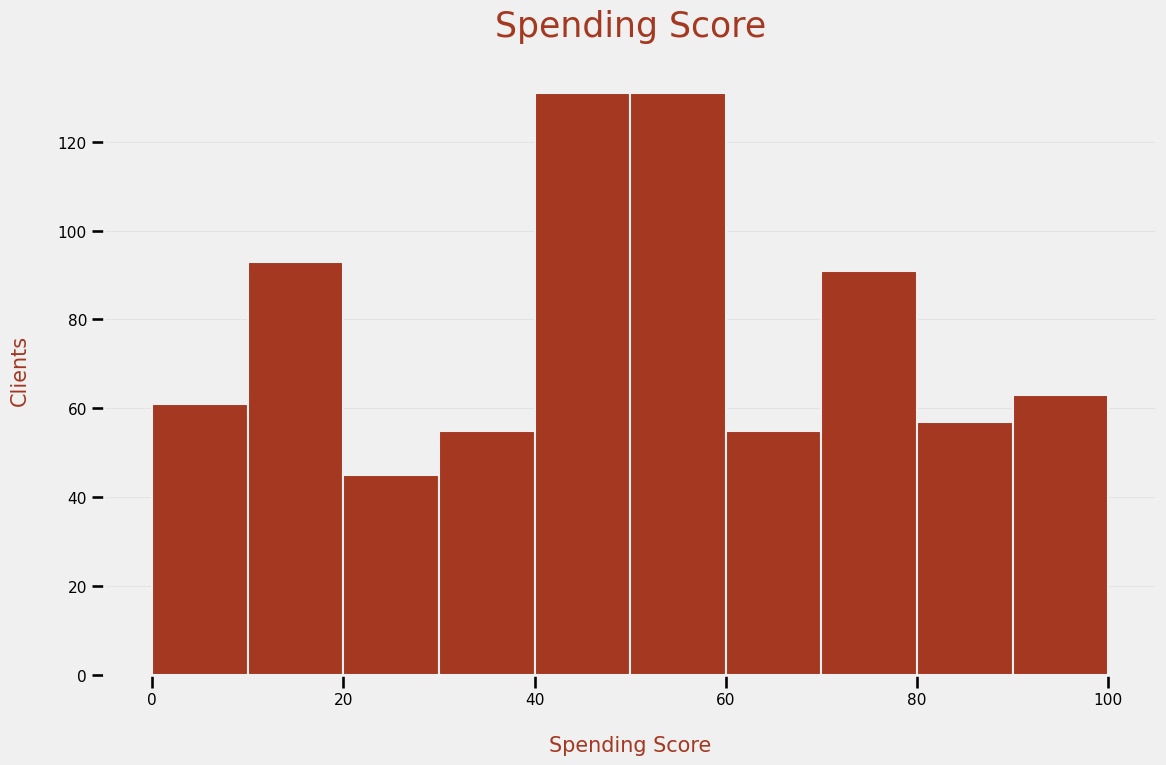

In [47]:
# Visualize clients per spending score.
histogram('spending_score', clients_final, spending_score_bins,
          title = 'Spending Score',
          xlabel = 'Spending Score',
          ylabel = 'Clients')

Spending score behaves similar across number of purchases and number of clients. Our main group is between 40 and 60 spending score.

<span style="color: #808080; font-style: italic;">Loyalty Points</span>

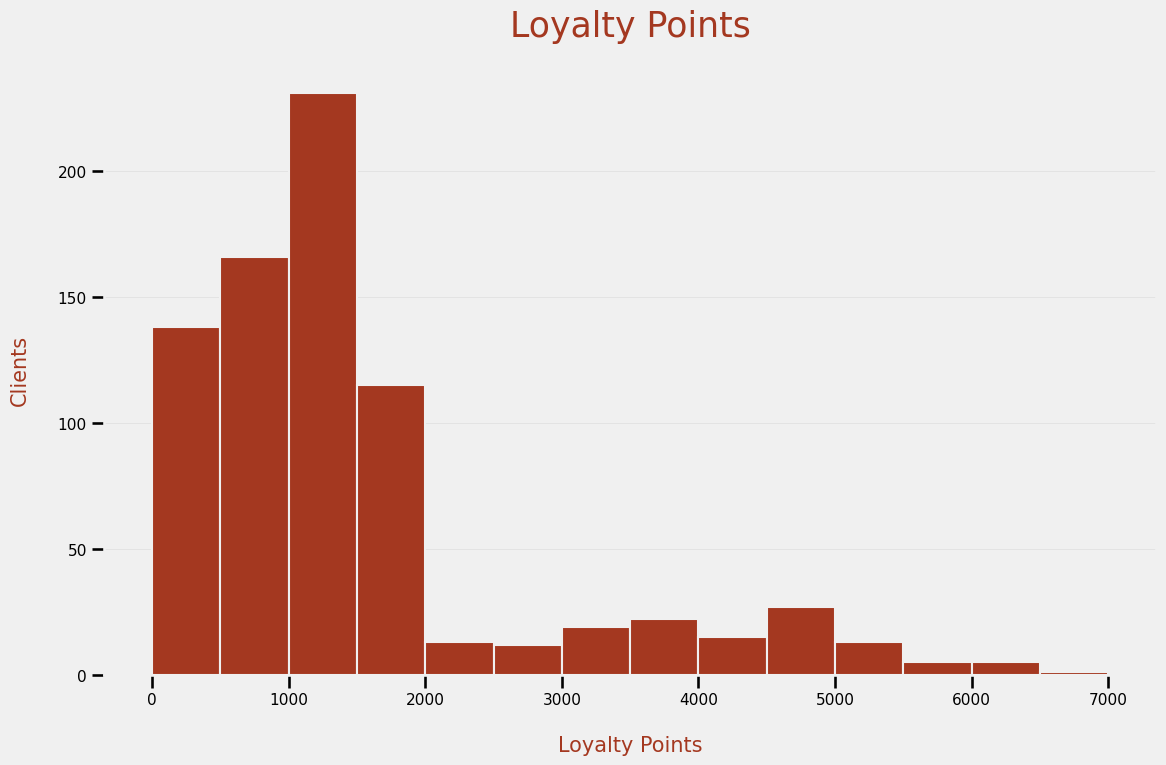

In [48]:
# Visualize sales per loyalty points.
loyalty_points_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
histogram('loyalty_points', clients_final, loyalty_points_bins,
          title = 'Loyalty Points',
          xlabel = 'Loyalty Points',
          ylabel = 'Clients')

Most of our clients have less than 1500 points. Turtle Games should try to retain more clients and have them make more recurrent purchases. That will increase sales and give clients with more loyalty points advantages.

<span style="color: #808080; font-style: italic;">Number of Sales</span>

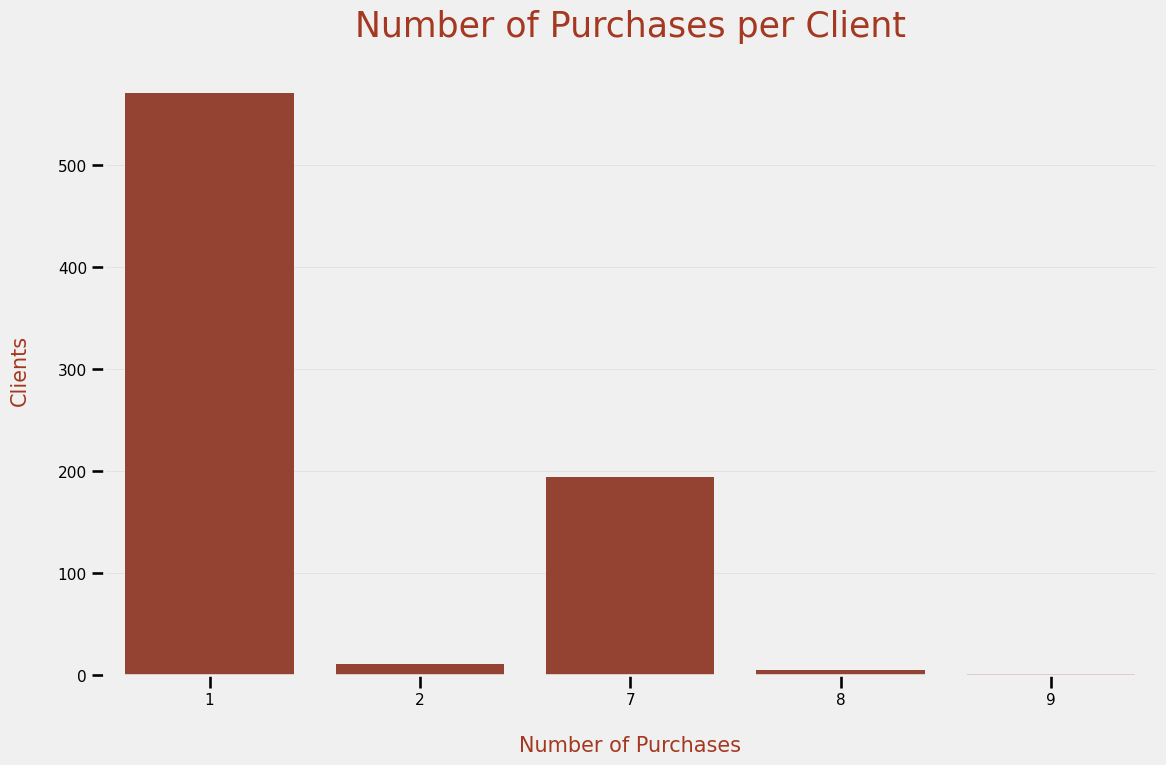

In [49]:
# Filter reviews per gender.
number_sales_client = clients_final.groupby('number_of_sales')['number_of_sales'].value_counts().reset_index()

# Visualize sales per gender.
barplot('number_of_sales', 'count', number_sales_client,
        title = 'Number of Purchases per Client',
        xlabel = 'Number of Purchases',
        ylabel = 'Clients')

Most of our clients make one purchase. The value of repeated sales is very low.

**Bivariate analysis**

<span style="color: #808080; font-style: italic;">Age x Loyalty Points</span>

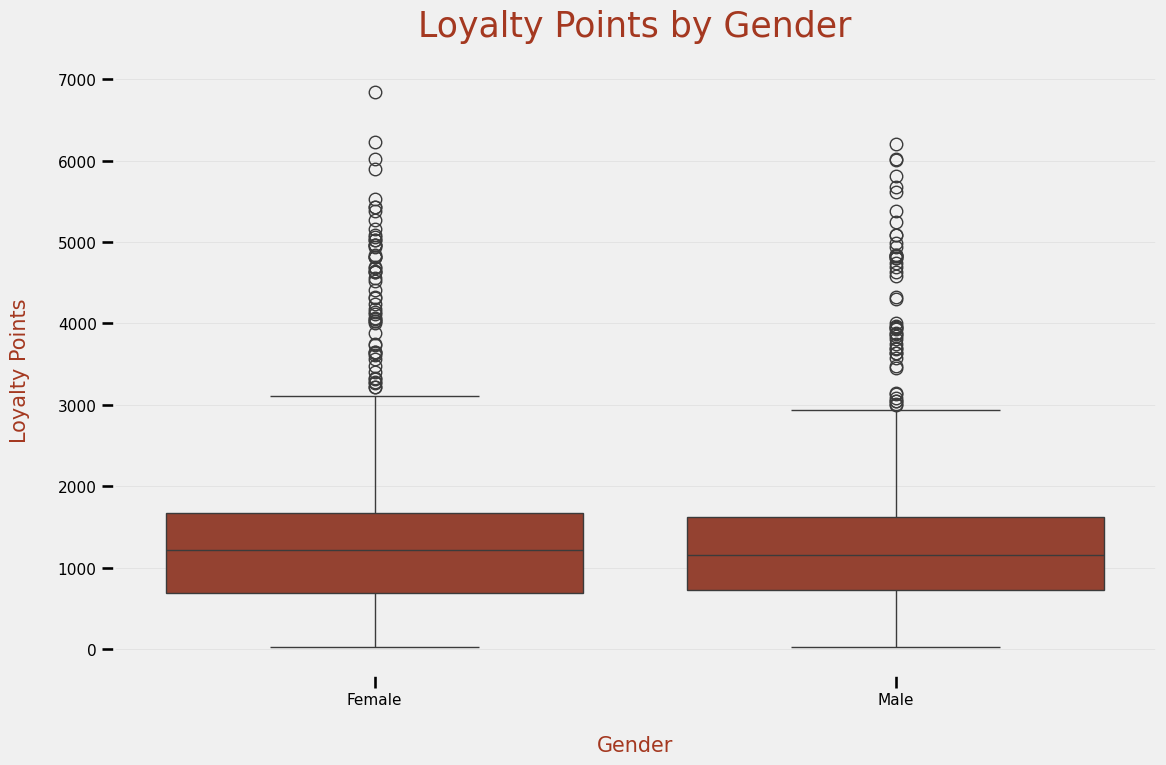

In [50]:
# Visualize in a boxplot.
boxplot('gender', 'loyalty_points', clients_final,
         title = 'Loyalty Points by Gender',
         xlabel = 'Gender',
         ylabel = 'Loyalty Points')

Gender Female has slightly more loyalty points than Male but distribution is very similar.

<span style="color: #808080; font-style: italic;">Education x Loayalty Points</span>

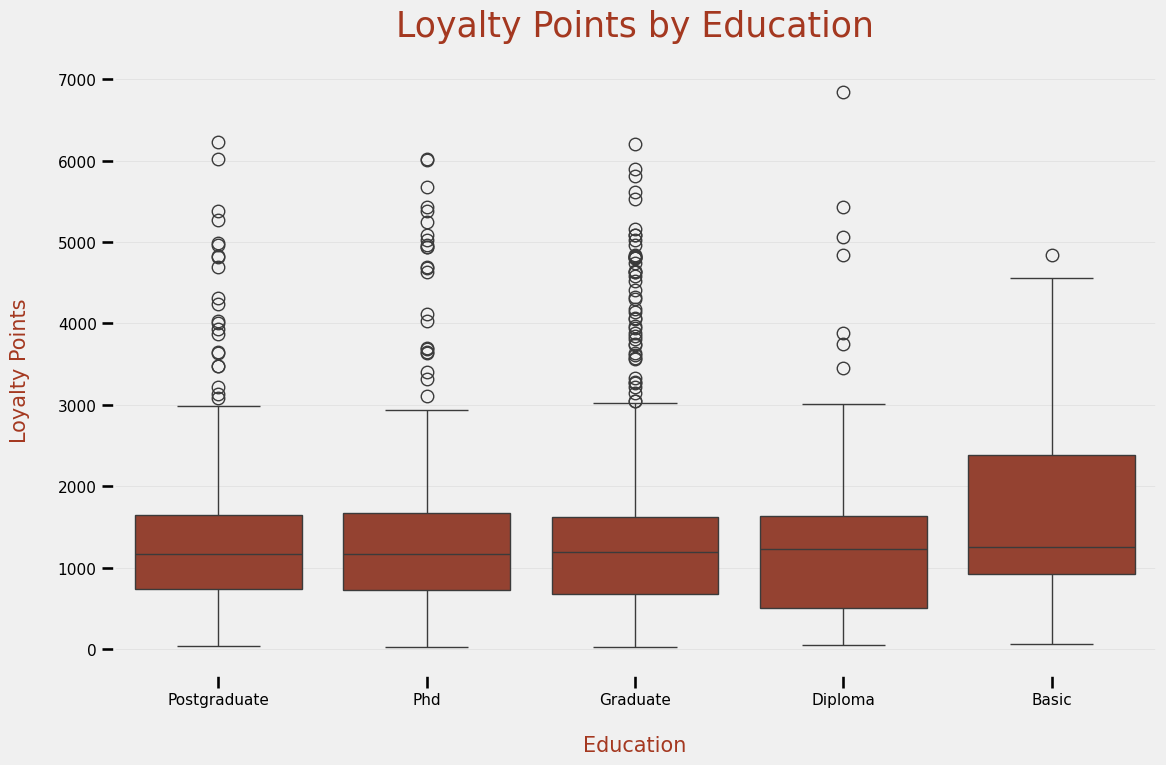

In [51]:
# Visualize in a boxplot.
boxplot('education', 'loyalty_points', clients_final,
         title = 'Loyalty Points by Education',
         xlabel = 'Education',
         ylabel = 'Loyalty Points')

<span style="color: #808080; font-style: italic;">Age x Loyalty Points</span>

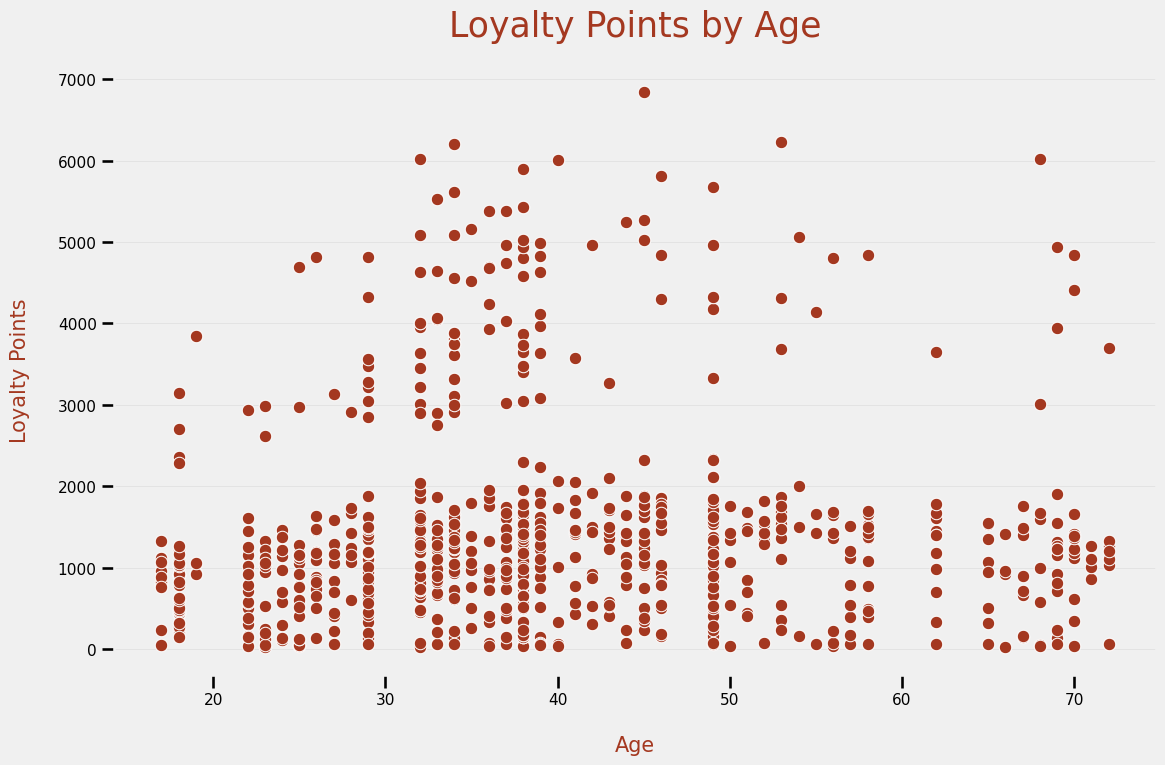

In [52]:
# Visualize in a scatter plot.
scatterplot('age', 'loyalty_points', clients_final,
            title = 'Loyalty Points by Age',
            xlabel = 'Age',
            ylabel = 'Loyalty Points')

There is not a clear relationship between Age and Loyalty Points.

<span style="color: #808080; font-style: italic;">Remuneration x Loyalty Points</span>

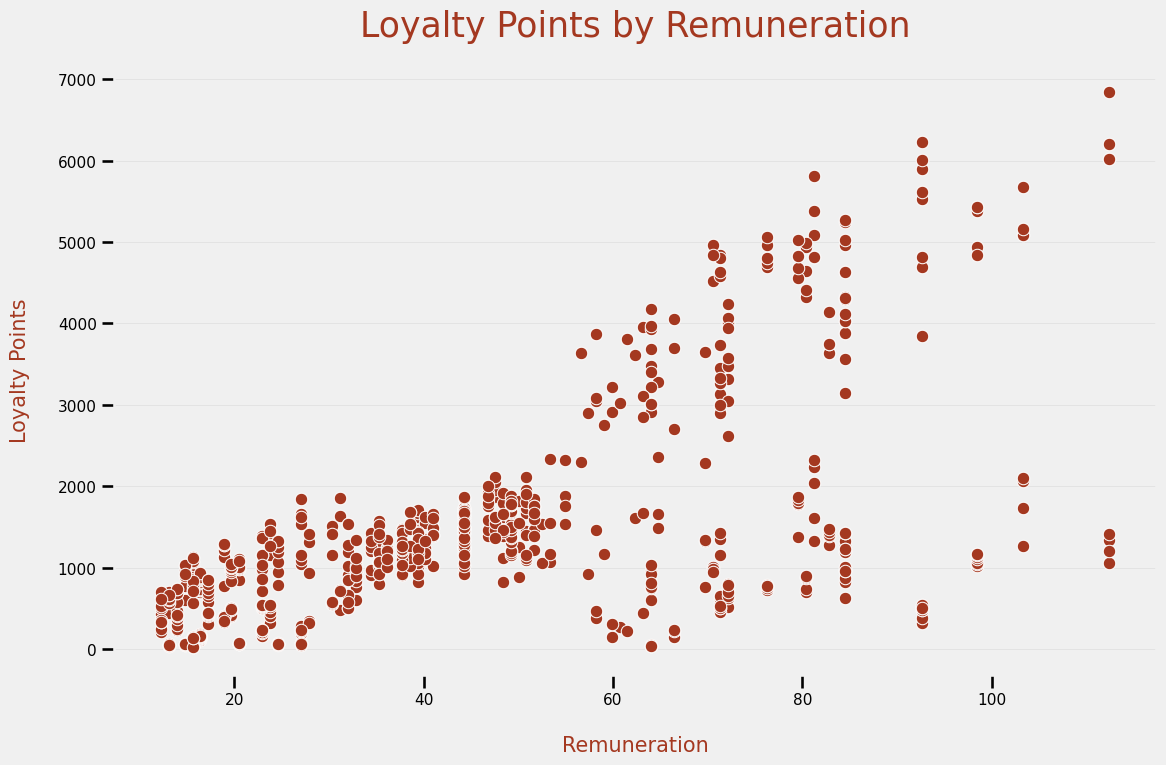

In [53]:
# Visualize in a scatter plot.
scatterplot('remuneration', 'loyalty_points', clients_final,
            title = 'Loyalty Points by Remuneration',
            xlabel = 'Remuneration',
            ylabel = 'Loyalty Points')

We can see a positive relation between Remuneration and Loyalty Points.

<span style="color: #808080; font-style: italic;">Spending Score x Loyalty Points</span>

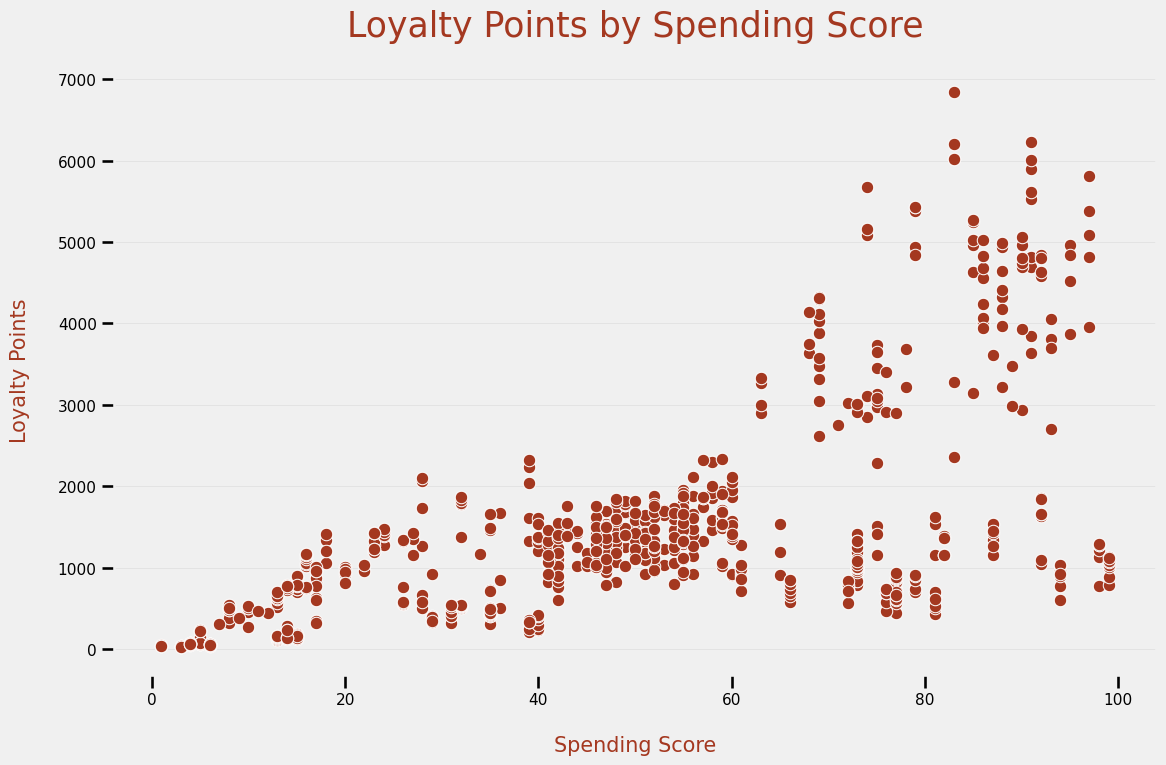

In [54]:
# Visualize in a scatter plot.
scatterplot('spending_score', 'loyalty_points', clients_final,
            title = 'Loyalty Points by Spending Score',
            xlabel = 'Spending Score',
            ylabel = 'Loyalty Points')

We can see a positive relation between Spending Score and Loyalty Points.

<span style="color: #808080; font-style: italic;">Remuneration x Spending Score</span>

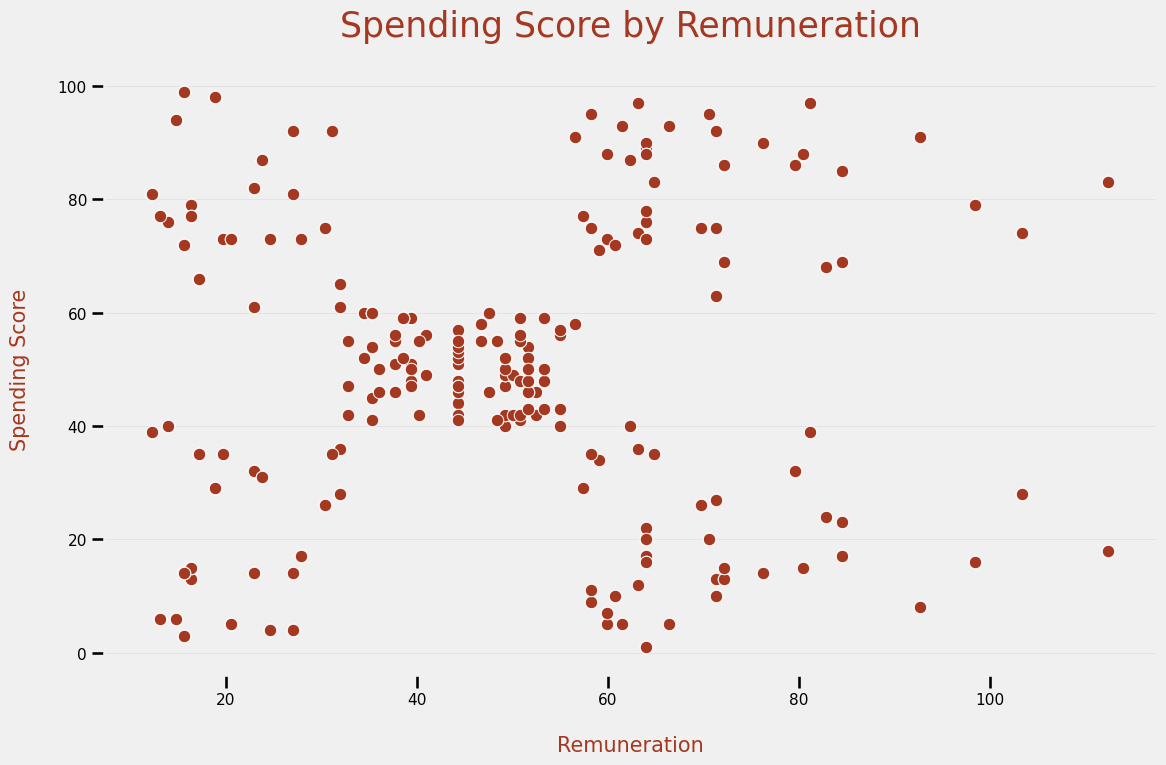

In [55]:
# Visualize in a scatter plot.
scatterplot('remuneration', 'spending_score', clients_final,
            title = 'Spending Score by Remuneration',
            xlabel = 'Remuneration',
            ylabel = 'Spending Score')

There seems to be 5 different types of clients that we can segment.

<span style="color: #808080; font-style: italic;">Number of Sales x Sum of Loyalty Points</span>

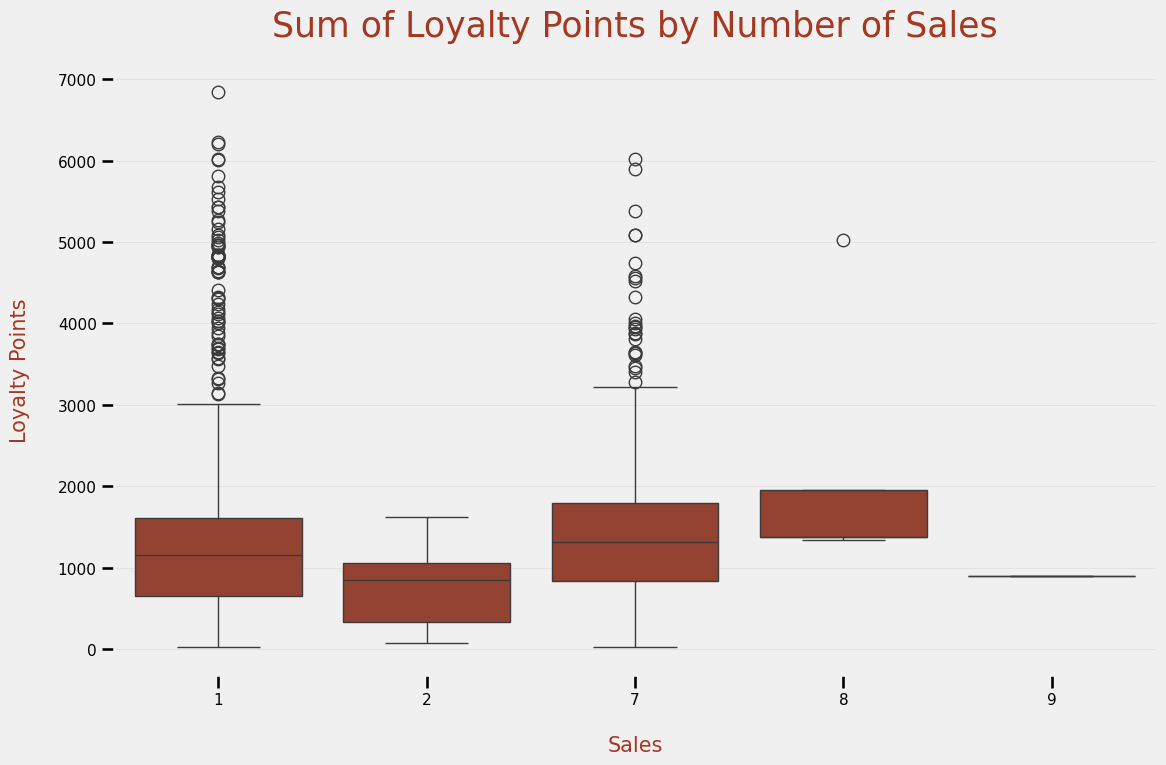

In [56]:
# Visualize in a scatter plot.
boxplot('number_of_sales', 'loyalty_points', clients_final,
            title = 'Sum of Loyalty Points by Number of Sales',
            xlabel = 'Sales',
            ylabel = 'Loyalty Points')

There is a wide variety between the loyalty points accumulated and the number of purchases.

<span style="color: #808080; font-style: italic;">Correlation</span>

In [57]:
# Create Dataframe with the numerical values only.
numerical = clients_final[['loyalty_points', 'age', 'remuneration', 'spending_score', 'number_of_sales']]

# Create correlation.
corr = numerical.corr()

# Visualize correlation.
corr

loyalty_points       age  remuneration  spending_score  \
loyalty_points         1.000000  0.028904      0.630901        0.632116   
age                    0.028904  1.000000      0.006024       -0.124630   
remuneration           0.630901  0.006024      1.000000       -0.001645   
spending_score         0.632116 -0.124630     -0.001645        1.000000   
number_of_sales        0.059754 -0.004272      0.077887        0.014461   

                 number_of_sales  
loyalty_points          0.059754  
age                    -0.004272  
remuneration            0.077887  
spending_score          0.014461  
number_of_sales         1.000000

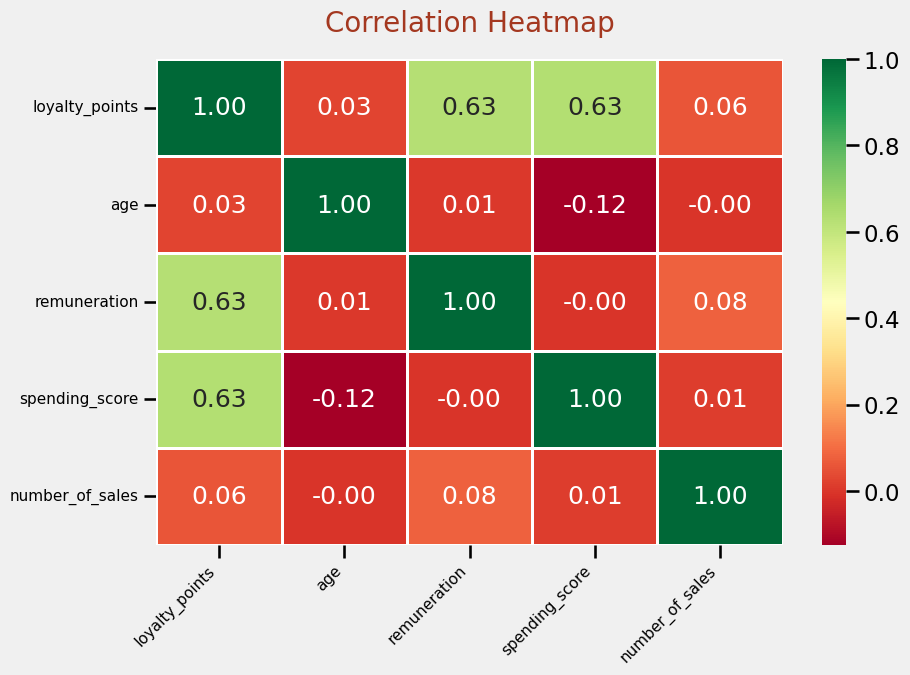

In [58]:
# Visualize the heatmap.
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'RdYlGn', linewidths = 1)
plt.title('Correlation Heatmap', color = '#a43820', size = 20, pad = 20)
plt.xticks(size = 11, rotation = 45, ha = 'right')
plt.yticks(size = 11)
plt.show()

Spending Score and Remuneration have the most positive relations with Loyalty Points. Age and Number of Sales have a relation almost close to 0.

<div style="color:#a43820; font-weight:bold;">
    
## Loyalty Points - Multiple Linear Regression
    
</div>

**Simple Linear Regression**

<span style="color: #808080; font-style: italic;">Age</span>

In [59]:
# Select the independent variable.
x_age = clients_final['age']

# Select the dependent variable.
y_age = clients_final['loyalty_points']

# Add a constant term to the reg model.
x_age = sm.add_constant(x_age)

# Fit the model.
model_age = sm.OLS(y_age, x_age).fit()

# Summary of the model.
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6522
Date:                Sun, 07 Jul 2024   Prob (F-statistic):              0.420
Time:                        22:07:30   Log-Likelihood:                -6723.7
No. Observations:                 782   AIC:                         1.345e+04
Df Residuals:                     780   BIC:                         1.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1387.5427    143.917      9.641      0.0

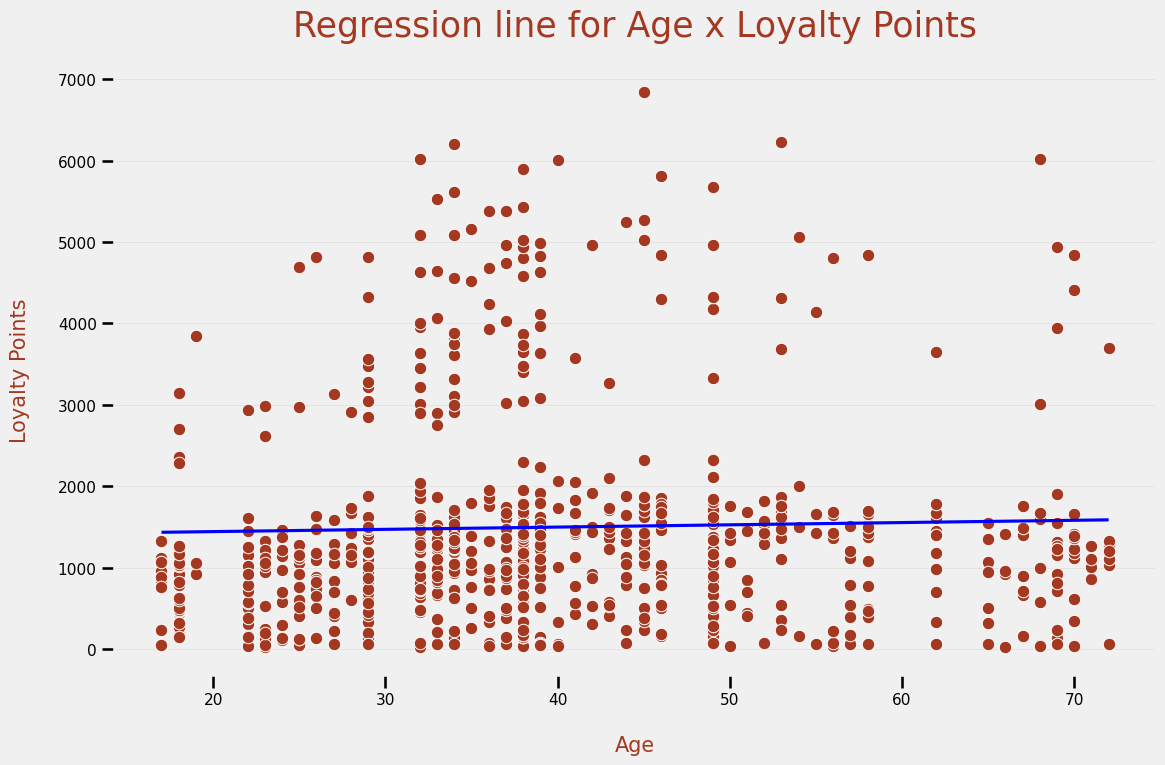

In [60]:
# Predicting charges.
predictions_age = model_age.predict(x_age)

# Plotting the regression line.
scatter_regression_line(clients_final['age'], clients_final['loyalty_points'], predictions_age,
                        title = 'Regression line for Age x Loyalty Points', xlabel = 'Age', ylabel = 'Loyalty Points')


<span style="color: #808080; font-style: italic;">Number of Sales</span>

In [61]:
# Select the independent variable.
x_sales = clients_final['number_of_sales']

# Select the dependent variable.
y_sales = clients_final['loyalty_points']

# Add a constant term to the reg model.
x_sales = sm.add_constant(x_sales)

# Fit the model.
model_sales = sm.OLS(y_sales, x_sales).fit()

# Summary of the model.
print(model_sales.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.795
Date:                Sun, 07 Jul 2024   Prob (F-statistic):             0.0950
Time:                        22:07:31   Log-Likelihood:                -6722.7
No. Observations:                 782   AIC:                         1.345e+04
Df Residuals:                     780   BIC:                         1.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1421.1278     65.436     

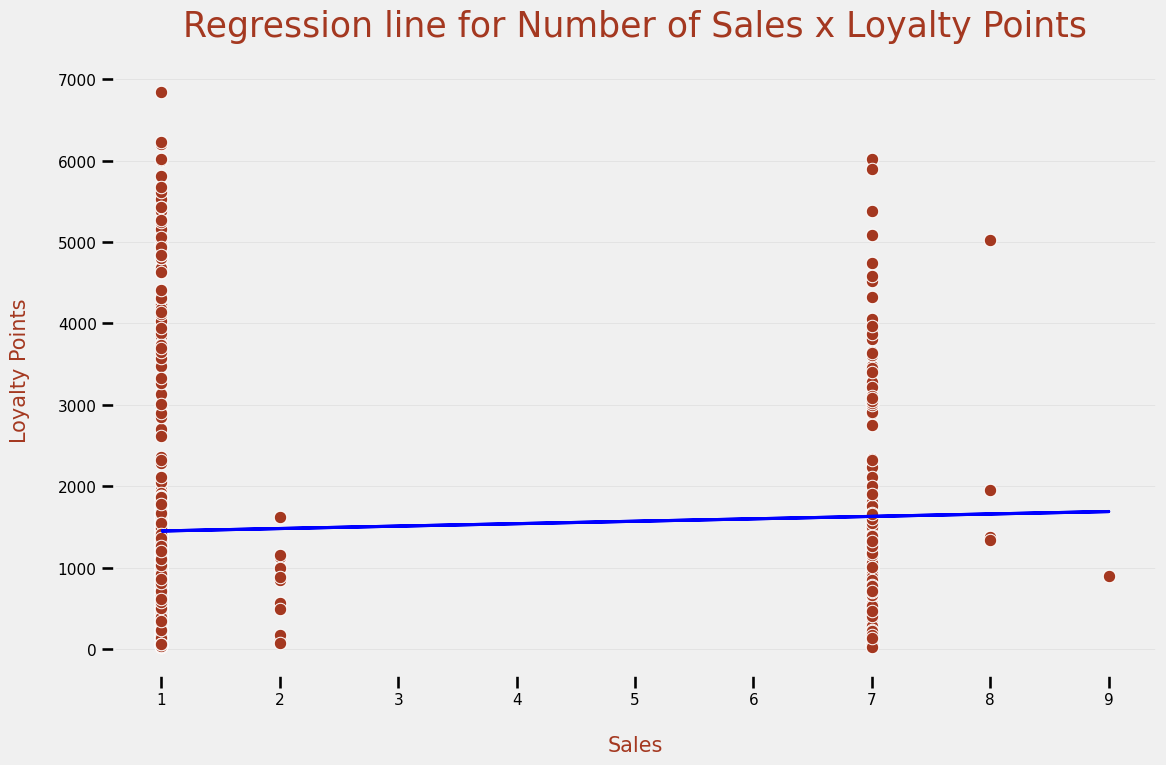

In [62]:
# Predicting charges.
predictions_sales = model_sales.predict(x_sales)

# Plotting the regression line.
scatter_regression_line(clients_final['number_of_sales'], clients_final['loyalty_points'], predictions_sales,
                        title = 'Regression line for Number of Sales x Loyalty Points', xlabel = 'Sales', ylabel = 'Loyalty Points')

<span style="color: #808080; font-style: italic;">Remuneration</span>

In [63]:
# Select the independent variable.
x_ren = clients_final['remuneration']

# Select the dependent variable.
y_ren = clients_final['loyalty_points']

# Add a constant term to the reg model.
x_ren = sm.add_constant(x_ren)

# Fit the model.
model_ren = sm.OLS(y_ren, x_ren).fit()

# Summary of the model.
print(model_ren.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     515.8
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           4.87e-88
Time:                        22:07:31   Log-Likelihood:                -6525.6
No. Observations:                 782   AIC:                         1.306e+04
Df Residuals:                     780   BIC:                         1.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.9200     75.881     -0.183   

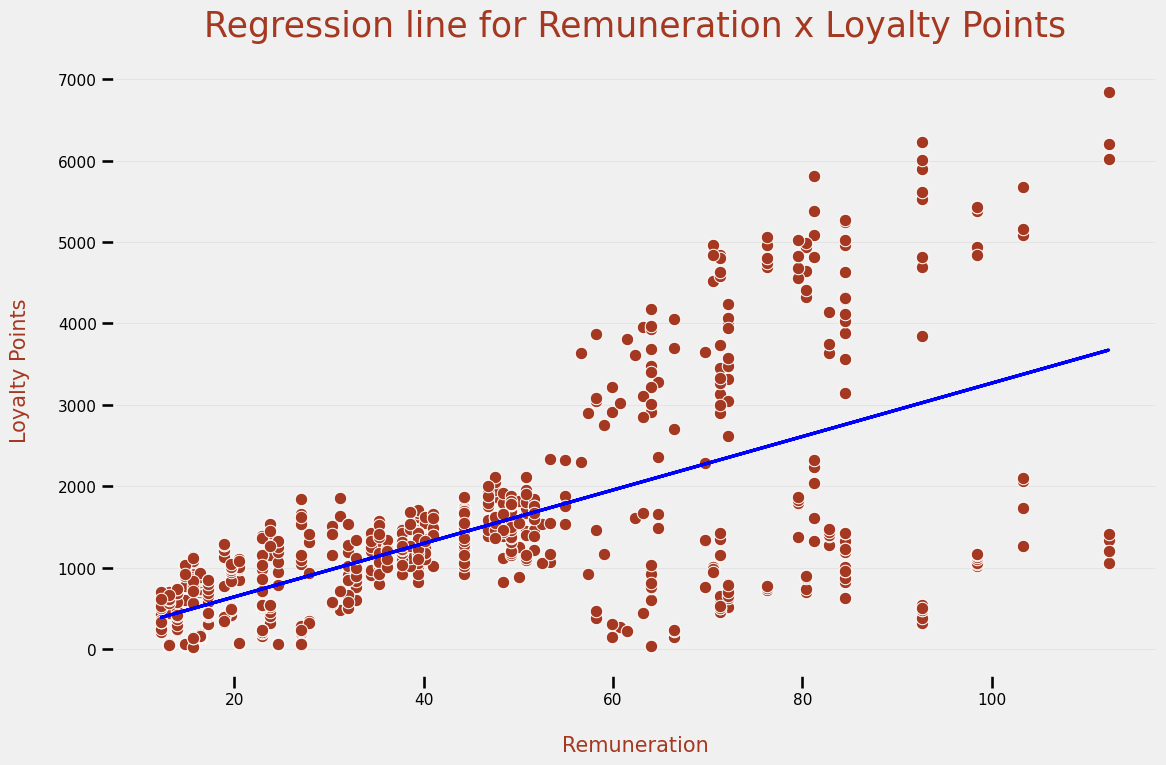

In [64]:
# Predicting charges.
predictions_ren = model_ren.predict(x_ren)

# Plotting the regression line.
scatter_regression_line(clients_final['remuneration'], clients_final['loyalty_points'], predictions_ren,
                        title = 'Regression line for Remuneration x Loyalty Points', xlabel = 'Remuneration', ylabel = 'Loyalty Points')

<span style="color: #808080; font-style: italic;">Spending Score</span>

In [65]:
# Select the independent variable.
x_spe = clients_final['spending_score']

# Select the dependent variable.
y_spe = clients_final['loyalty_points']

# Add a constant term to the reg model.
x_spe = sm.add_constant(x_spe)

# Fit the model.
model_spe = sm.OLS(y_spe, x_spe).fit()

# Summary of the model.
print(model_spe.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     519.1
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           1.80e-88
Time:                        22:07:31   Log-Likelihood:                -6524.6
No. Observations:                 782   AIC:                         1.305e+04
Df Residuals:                     780   BIC:                         1.306e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -51.0144     77.103     -0.

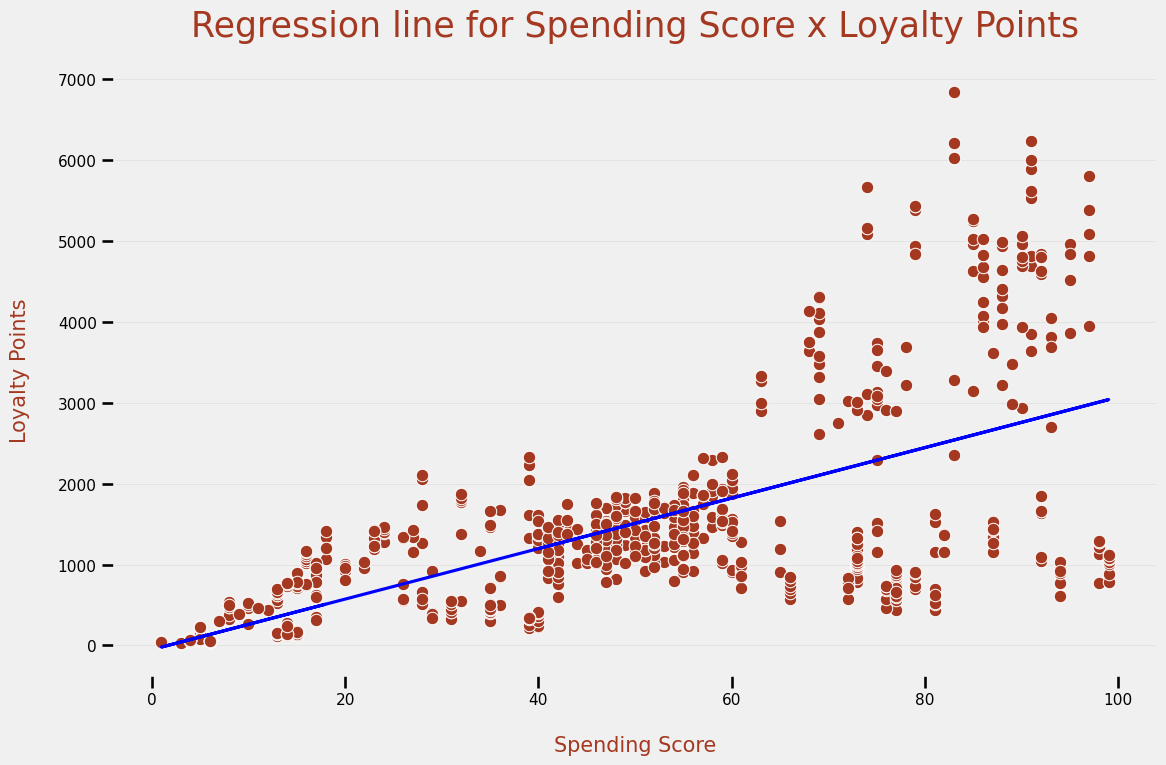

In [66]:
# Predicting charges.
predictions_spe = model_spe.predict(x_spe)

# Plotting the regression line.
scatter_regression_line(clients_final['spending_score'], clients_final['loyalty_points'], predictions_spe,
                        title = 'Regression line for Spending Score x Loyalty Points',
                        xlabel = 'Spending Score', ylabel = 'Loyalty Points')

The Linear Regression of Age and Number of Sales have a low R-squared, which means it is not a good predictor of Loyalty Points. Spending Score and Remuneration are moderate predictors (R-squared between 0.3 and 0.5), so we will try to build a multiple linear regression with those variables.

**Multiple Linear Regression Model**

<span style="color: #808080; font-style: italic;">Model 1 - Remuneration and Spending Score</span>

In [67]:
# Select the independent variable.
X_multi2 = clients_final[['spending_score', 'remuneration']]

# Select the dependent variable.
y_multi2 = clients_final['loyalty_points']

# Add a constant term to the reg model.
X_multi2 = sm.add_constant(X_multi2)

# Fit the model.
model_multi2 = sm.OLS(y_multi2, X_multi2).fit()

# Summary of the model.
print(model_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          4.59e-272
Time:                        22:07:32   Log-Likelihood:                -6096.9
No. Observations:                 782   AIC:                         1.220e+04
Df Residuals:                     779   BIC:                         1.221e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1567.3789     58.989    -26.

I will try to run the multiple linear regression model with all the 4 variables to see if it improves the model.

<span style="color: #808080; font-style: italic;">Model 2 - Age, Remuneration, Number of Sales and Spending Score</span>

In [68]:
# Select the independent variable.
X_multi4 = clients_final[['spending_score', 'age', 'remuneration', 'number_of_sales']]

# Select the dependent variable.
y_multi4 = clients_final['loyalty_points']

# Add a constant term to the reg model.
X_multi4 = sm.add_constant(X_multi4)

# Fit the model.
model_multi4 = sm.OLS(y_multi4, X_multi4).fit()

# Summary of the model.
print(model_multi4.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     827.6
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          2.36e-278
Time:                        22:07:32   Log-Likelihood:                -6074.9
No. Observations:                 782   AIC:                         1.216e+04
Df Residuals:                     777   BIC:                         1.218e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2001.5384     87.974    -

P-value of Number of Sales is over 0.05 which shows that this variable is statistically insignificant.

<span style="color: #808080; font-style: italic;">Model 3 - Age, Remuneration and Spending Score</span>

In [69]:
# Select the independent variable.
X_multi3 = clients_final[['spending_score', 'age', 'remuneration']]

# Select the dependent variable.
y_multi3 = clients_final['loyalty_points']

# Add a constant term to the reg model.
X_multi3 = sm.add_constant(X_multi3)

# Fit the model.
model_multi3 = sm.OLS(y_multi3, X_multi3).fit()

# Summary of the model.
print(model_multi3.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1105.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          6.58e-280
Time:                        22:07:32   Log-Likelihood:                -6074.9
No. Observations:                 782   AIC:                         1.216e+04
Df Residuals:                     778   BIC:                         1.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1999.7279     86.314    -23.

Adding Age and Number of Sales to model 1 increases the R-squared and adjusted R-squared. Removing the Number of Sales from Model 2 keeps those values the same but decreases the p-value of the F-statistic. In this case, we will keep model 3 to predict loyalty points. Even though Age alone doesn't explain Loyalty Points, adding it to the model improves it.

The high F-statistic and low p-value show that the model is statistically significant. The p-value in all variables under 0.05 shows that they are relevant. The model explains 80.9% of the variation of Loyalty Points. 
The Durbin-Watson value of 1.93 is close to 2, which shows almost no correlation between the residuals.


<span style="color: #808080; font-style: italic;">Multicollinearity</span>

In [70]:
# Check for multicollinearity using VIF.

# No need to add the constant, it is done before.
# Create an empty dataframe.
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(X_multi3.values, i) for i in range(X_multi3.shape[1])]

# Create the feature columns.
vif['features'] = X_multi3.columns

# Print VIF values.
print(vif.round(1))

   VIF Factor        features
0        17.7           const
1         1.0  spending_score
2         1.0             age
3         1.0    remuneration


All the variables have a VIF factor of less than 5, which indicates no or very low multicollinearity.

<span style="color: #808080; font-style: italic;">Model Coefficients</span>

In [71]:
# Get the coefficients and intercept.
coefficients = model_multi3.params

# Extract the intercept (constant term) and the coefficients for the predictors.
intercept = coefficients[0]
coefficients_only = coefficients[1:]

# Visualize.
print("The intercept is:", round(intercept, 2))
print("The co-efficients are:", round(coefficients_only, 2))

The intercept is: -1999.73
The co-efficients are: spending_score    31.92
age               10.15
remuneration      32.84
dtype: float64


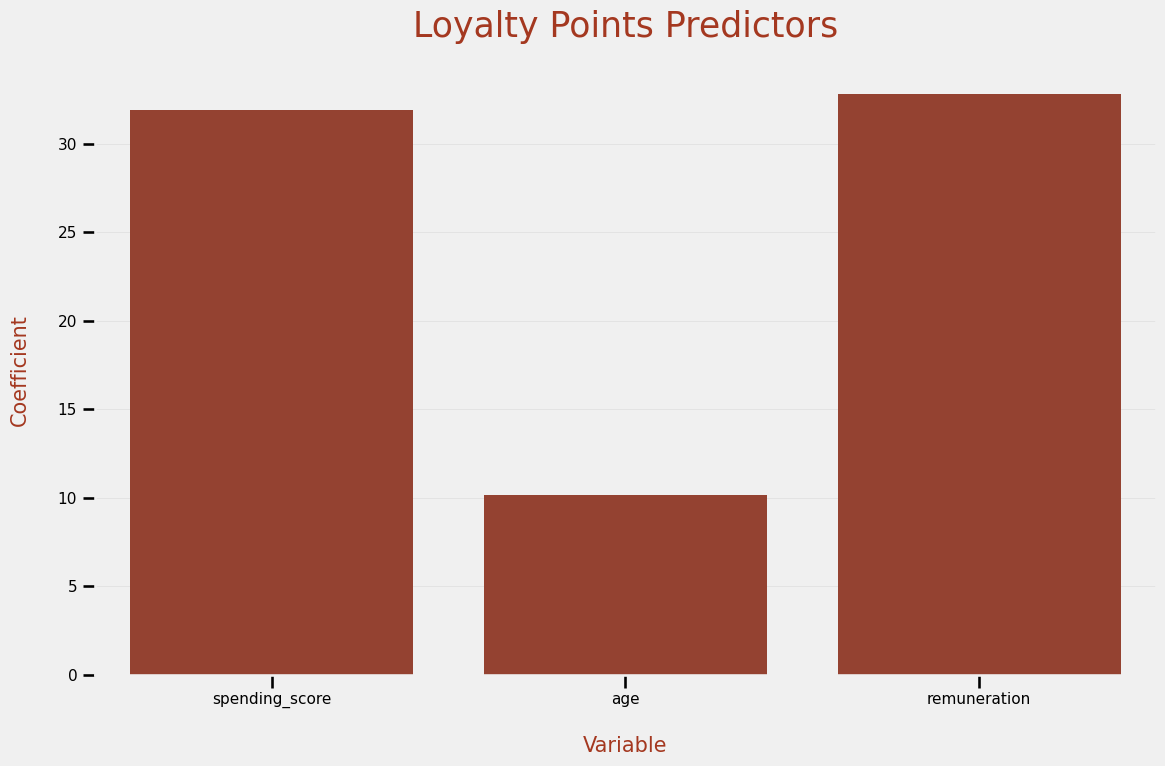

In [72]:
# Convert coefficients to a DataFrame for better plotting.
coefficients_df = pd.DataFrame(coefficients_only, index = X_multi3.columns[1:], columns=['Coefficient'])

# Visualize in a graph plot.
barplot(coefficients_df.index, 'Coefficient', coefficients_df,
        title = 'Loyalty Points Predictors',
        xlabel = 'Variable',
        ylabel = 'Coefficient')

If we increase 1 unit in each one of the variables, the one that will drive a bigger increase in Loyalty Points is Remuneration (+32.84), followed by Spending Score (+31.92) and followed by Age (+10.15).

<span style="color: #808080; font-style: italic;">Residuals</span>

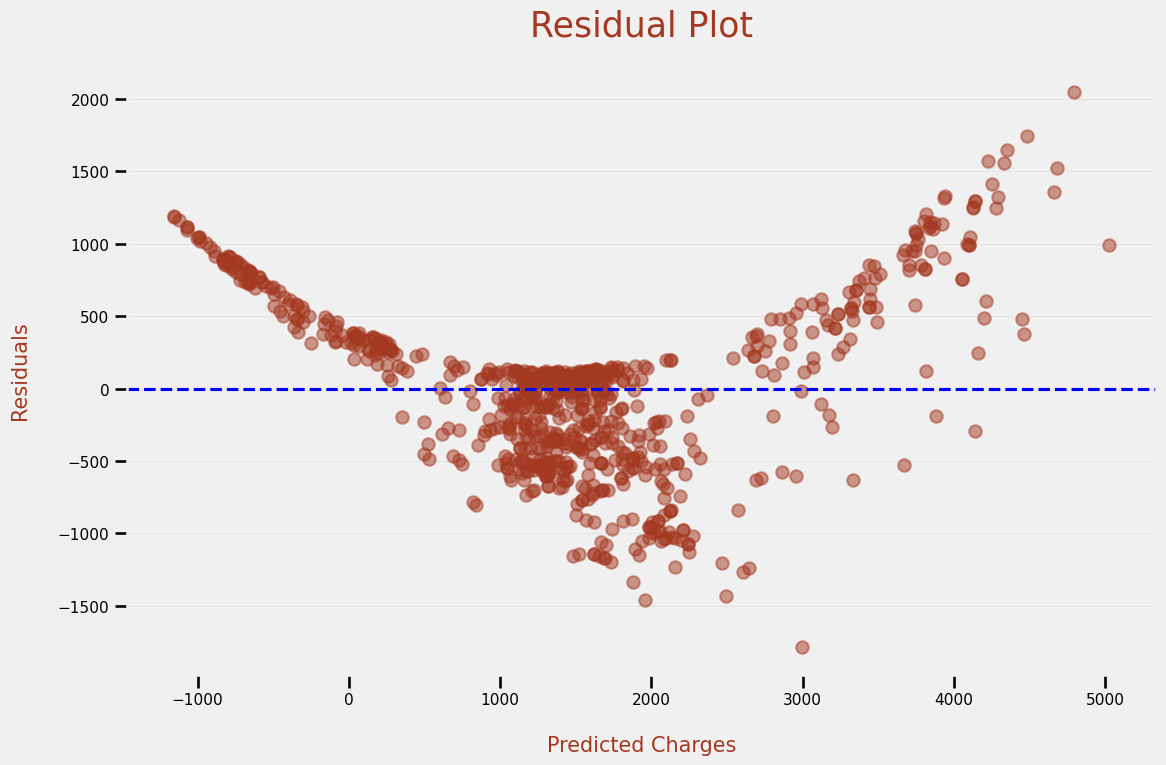

In [73]:
# Residual Plot.
scatter_residuals(model_multi3.predict(X_multi3), model_multi3.resid, title = 'Residual Plot')

In [74]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
bp_test_multi3 = het_breuschpagan(model_multi3.resid, model_multi3.model.exog)

# Print the results of the test.
terms_multi3 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_multi3, bp_test_multi3)))

{'LM stat': 86.43452313969695, 'LM Test p-value': 1.2770431798388165e-18, 'F-stat': 32.22608617965757, 'F-test p-value': 1.2191693316946459e-19}


The Breusch-Pagan test's p-value is less than 0.05, which tells us that Heteroscedasticity is present, but one of our assumptions of linear regression is not. Let's try to transform the independent variable to see if this is solved.

**Improving a model to a future use for Predictions**

<span style="color: #808080; font-style: italic;">Transform the dependent variable</span>

In [75]:
# Select the dependent variable - We are going to take the square root.
y_sqrt = np.sqrt(clients_final['loyalty_points'])

# Select the independent variable.
X_sqrt = clients_final[['spending_score', 'age', 'remuneration']]

# Add a constant term to the reg model.
X_sqrt = sm.add_constant(X_sqrt)

# Fit the model.
model_sqrt = sm.OLS(y_sqrt, X_sqrt).fit()

# Summary of the model.
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2239.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:07:33   Log-Likelihood:                -2381.5
No. Observations:                 782   AIC:                             4771.
Df Residuals:                     778   BIC:                             4790.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.7543      0.767    -11.

Our new model improved the R-squared and adjusted the R-squared. Now, it explains 89.6% of the variation in loyalty points. All the variables are statistically significant.
The Durbin-Watson value decreased and it shows some positive autocorrelation between the residuals.

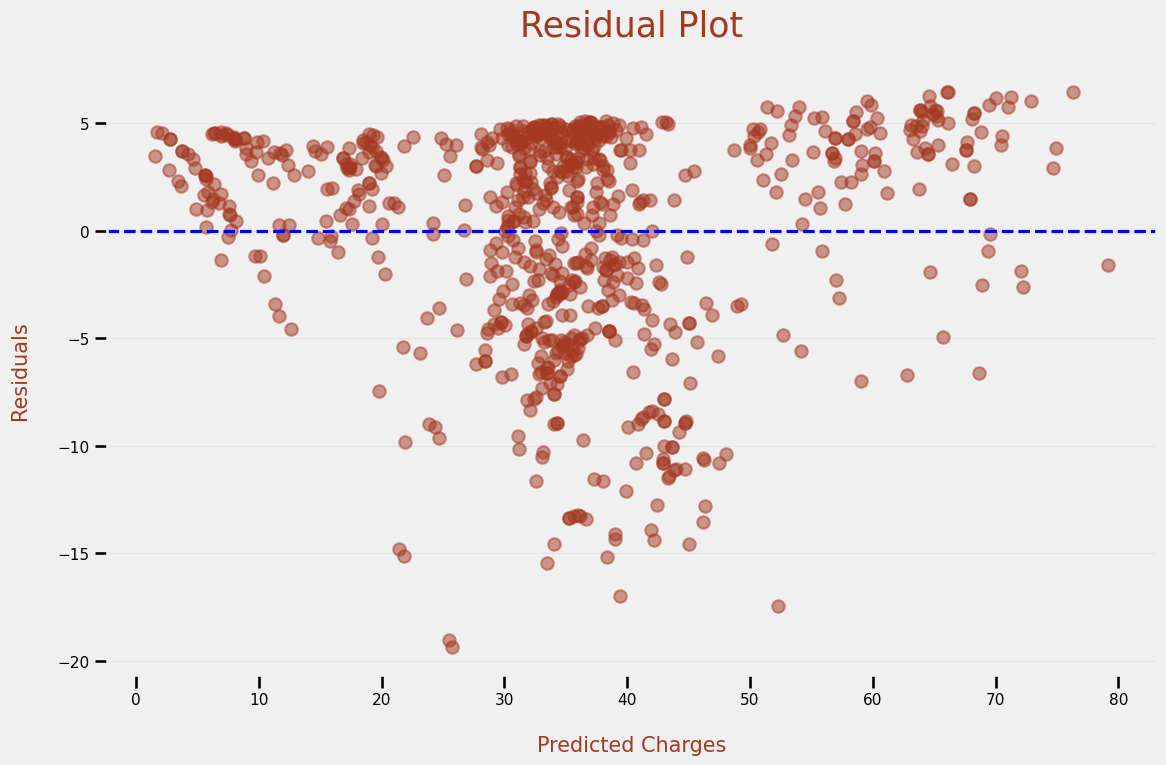

In [76]:
# Residual Plot.
scatter_residuals(model_sqrt.predict(X_sqrt), model_sqrt.resid, title = 'Residual Plot')

In [77]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
bp_test_sqrt = het_breuschpagan(model_sqrt.resid, model_sqrt.model.exog)

# Print the results of the test.
terms_sqrt = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms_sqrt, bp_test_sqrt)))

{'LM stat': 13.281671041439918, 'LM Test p-value': 0.0040654297075603685, 'F-stat': 4.480678934870419, 'F-test p-value': 0.003963963669767041}


The Breusch-Pagan test's p-value is less than 0.05, which shows that we have Homoscedasticity contrary to before.

<span style="color: #808080; font-style: italic;">Training and Testing Subsets</span>

In [78]:
# Split the data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X_sqrt, y_sqrt,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Add a constant term to the reg model.
X_train = sm.add_constant(X_train)

# Run regression on the train subset.
mlr = sm.OLS(y_train, X_train).fit()

# Summary of the model.
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1817.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          6.84e-307
Time:                        22:07:34   Log-Likelihood:                -1907.9
No. Observations:                 625   AIC:                             3824.
Df Residuals:                     621   BIC:                             3842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.3839      0.877    -10.

In [79]:
# Predictions on the test set.
y_pred_test = mlr.predict(X_test)

In [80]:
# Calculate mean absolute error.
mae = metrics.mean_absolute_error(y_test, y_pred_test)

# Calculate mean squared error.
mse = metrics.mean_squared_error(y_test, y_pred_test)

# Calculate root mean squared error.
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 4.076410336032461
Mean Squared Error: 24.512251056551236
Root Mean Squared Error: 4.9509848572330775


The model's performance metrics indicate the following:

Mean Absolute Error (MAE) of 4.08 suggests that, on average, the predictions are off by approximately 4.08 units.
Mean Squared Error (MSE) of 24.51 highlights larger errors more prominently due to squaring.
Root Mean Squared Error (RMSE) of 4.95, being the square root of MSE, shows a more interpretable average error in the same units as the data, indicating moderate prediction accuracy.

<span style="color: #808080; font-style: italic;">Homoscedasticity</span>

In [81]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
bp_test = het_breuschpagan(mlr.resid, mlr.model.exog)

# Print the results of the test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, bp_test)))

{'LM stat': 8.286956293635516, 'LM Test p-value': 0.04043892006118605, 'F-stat': 2.781520466104005, 'F-test p-value': 0.04028068049236902}


The Breusch-Pagan test's p-value is less than 0.05, which shows that we have Homoscedasticity.

<div style="color:#a43820; font-weight:bold;">
    
## Loyalty Points - Decision Tree Regressor
    
</div>

In [82]:
# Create a new DataFrame, a copy of reviews.
df2 = clients_final.copy()

In [83]:
# Select the relevant columns for the Decision Tree.
df2_new = df2[['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'number_of_sales']]

In [84]:
# Convert the categorical columns in numerical ones.

# Categorical columns.
categorical = ['gender', 'education']

# Convert categorical columns.
df2_new = pd.get_dummies(df2_new, columns = categorical)

# Visualize
df2_new.head()

age  remuneration  spending_score  loyalty_points  number_of_sales  \
0   17         13.94              40             233                1   
1   17         18.86              98             774                1   
2   17         27.06               4              45                1   
3   17         27.06              92            1042                7   
4   17         35.26              54             797                1   

   gender_Female  gender_Male  education_Basic  education_Diploma  \
0           True        False            False              False   
1          False         True            False              False   
2          False         True            False              False   
3          False         True            False              False   
4           True        False            False              False   

   education_Graduate  education_Phd  education_Postgraduate  
0               False          False                    True  
1               False           True                   False  
2               False           True                   False  
3               False           True                   False  
4               False          False                    True

In [85]:
# Drop the column gender_Male because it is not needed.
df2_new.drop(columns = 'gender_Male', inplace = True)

In [86]:
# Check the columns of the new dataframe.
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     782 non-null    int64  
 1   remuneration            782 non-null    float64
 2   spending_score          782 non-null    int64  
 3   loyalty_points          782 non-null    int64  
 4   number_of_sales         782 non-null    int64  
 5   gender_Female           782 non-null    bool   
 6   education_Basic         782 non-null    bool   
 7   education_Diploma       782 non-null    bool   
 8   education_Graduate      782 non-null    bool   
 9   education_Phd           782 non-null    bool   
 10  education_Postgraduate  782 non-null    bool   
dtypes: bool(6), float64(1), int64(4)
memory usage: 35.3 KB


In [87]:
# Check for missing values.
df2_new.isnull().sum()

age                       0
remuneration              0
spending_score            0
loyalty_points            0
number_of_sales           0
gender_Female             0
education_Basic           0
education_Diploma         0
education_Graduate        0
education_Phd             0
education_Postgraduate    0
dtype: int64

In [88]:
# Select the independent variables.
X_tree = df2_new.drop('loyalty_points', axis = 1)

# Select the dependent variable.
y_tree = df2_new['loyalty_points']

**Fit the tree**

In [89]:
# Create testing data.
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree,
                                                    random_state = 42,
                                                    test_size = 0.3)

# Create regressor.
dtr = DecisionTreeRegressor(random_state = 42)

# Fit the Data.
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [90]:
# Predict using the test data.
y_test_predicted = dtr.predict(X_test)

# Calculate mean absolute error.
mae_dtr = metrics.mean_absolute_error(y_test, y_test_predicted)

# Calculate mean squared error.
mse_dtr = metrics.mean_squared_error(y_test, y_test_predicted)

# Calculate root mean squared error.
rmse_dtr = np.sqrt(mse_dtr)

# Calculate the R2 score.
r2_dtr = metrics.r2_score(y_test, y_test_predicted)

print('Mean Absolute Error:', round(mae_dtr, 2))
print('Mean Squared Error:', round(mse_dtr, 2))
print('Root Mean Squared Error:', round(rmse_dtr, 2))
print('R2 Score', round(r2_dtr, 2))

Mean Absolute Error: 105.14
Mean Squared Error: 32609.69
Root Mean Squared Error: 180.58
R2 Score 0.98


These performance metrics indicate:

Mean Absolute Error (MAE) is 105.14, indicating how close the predictions are to the actual values on average.
Mean Squared Error (MSE) is 32609.69, providing insight into the magnitude of prediction errors.
Root Mean Squared Error (RMSE) is 180.58, showing the typical deviation of the predicted values from the actual values.
R² Score of 0.98 indicates that the model explains 98% of the variance in the target variable, suggesting a high level of predictive accuracy.
These metrics underscore the model's robust performance in predicting the target variable. Due to being a small dataset, the high score can be explained by that.

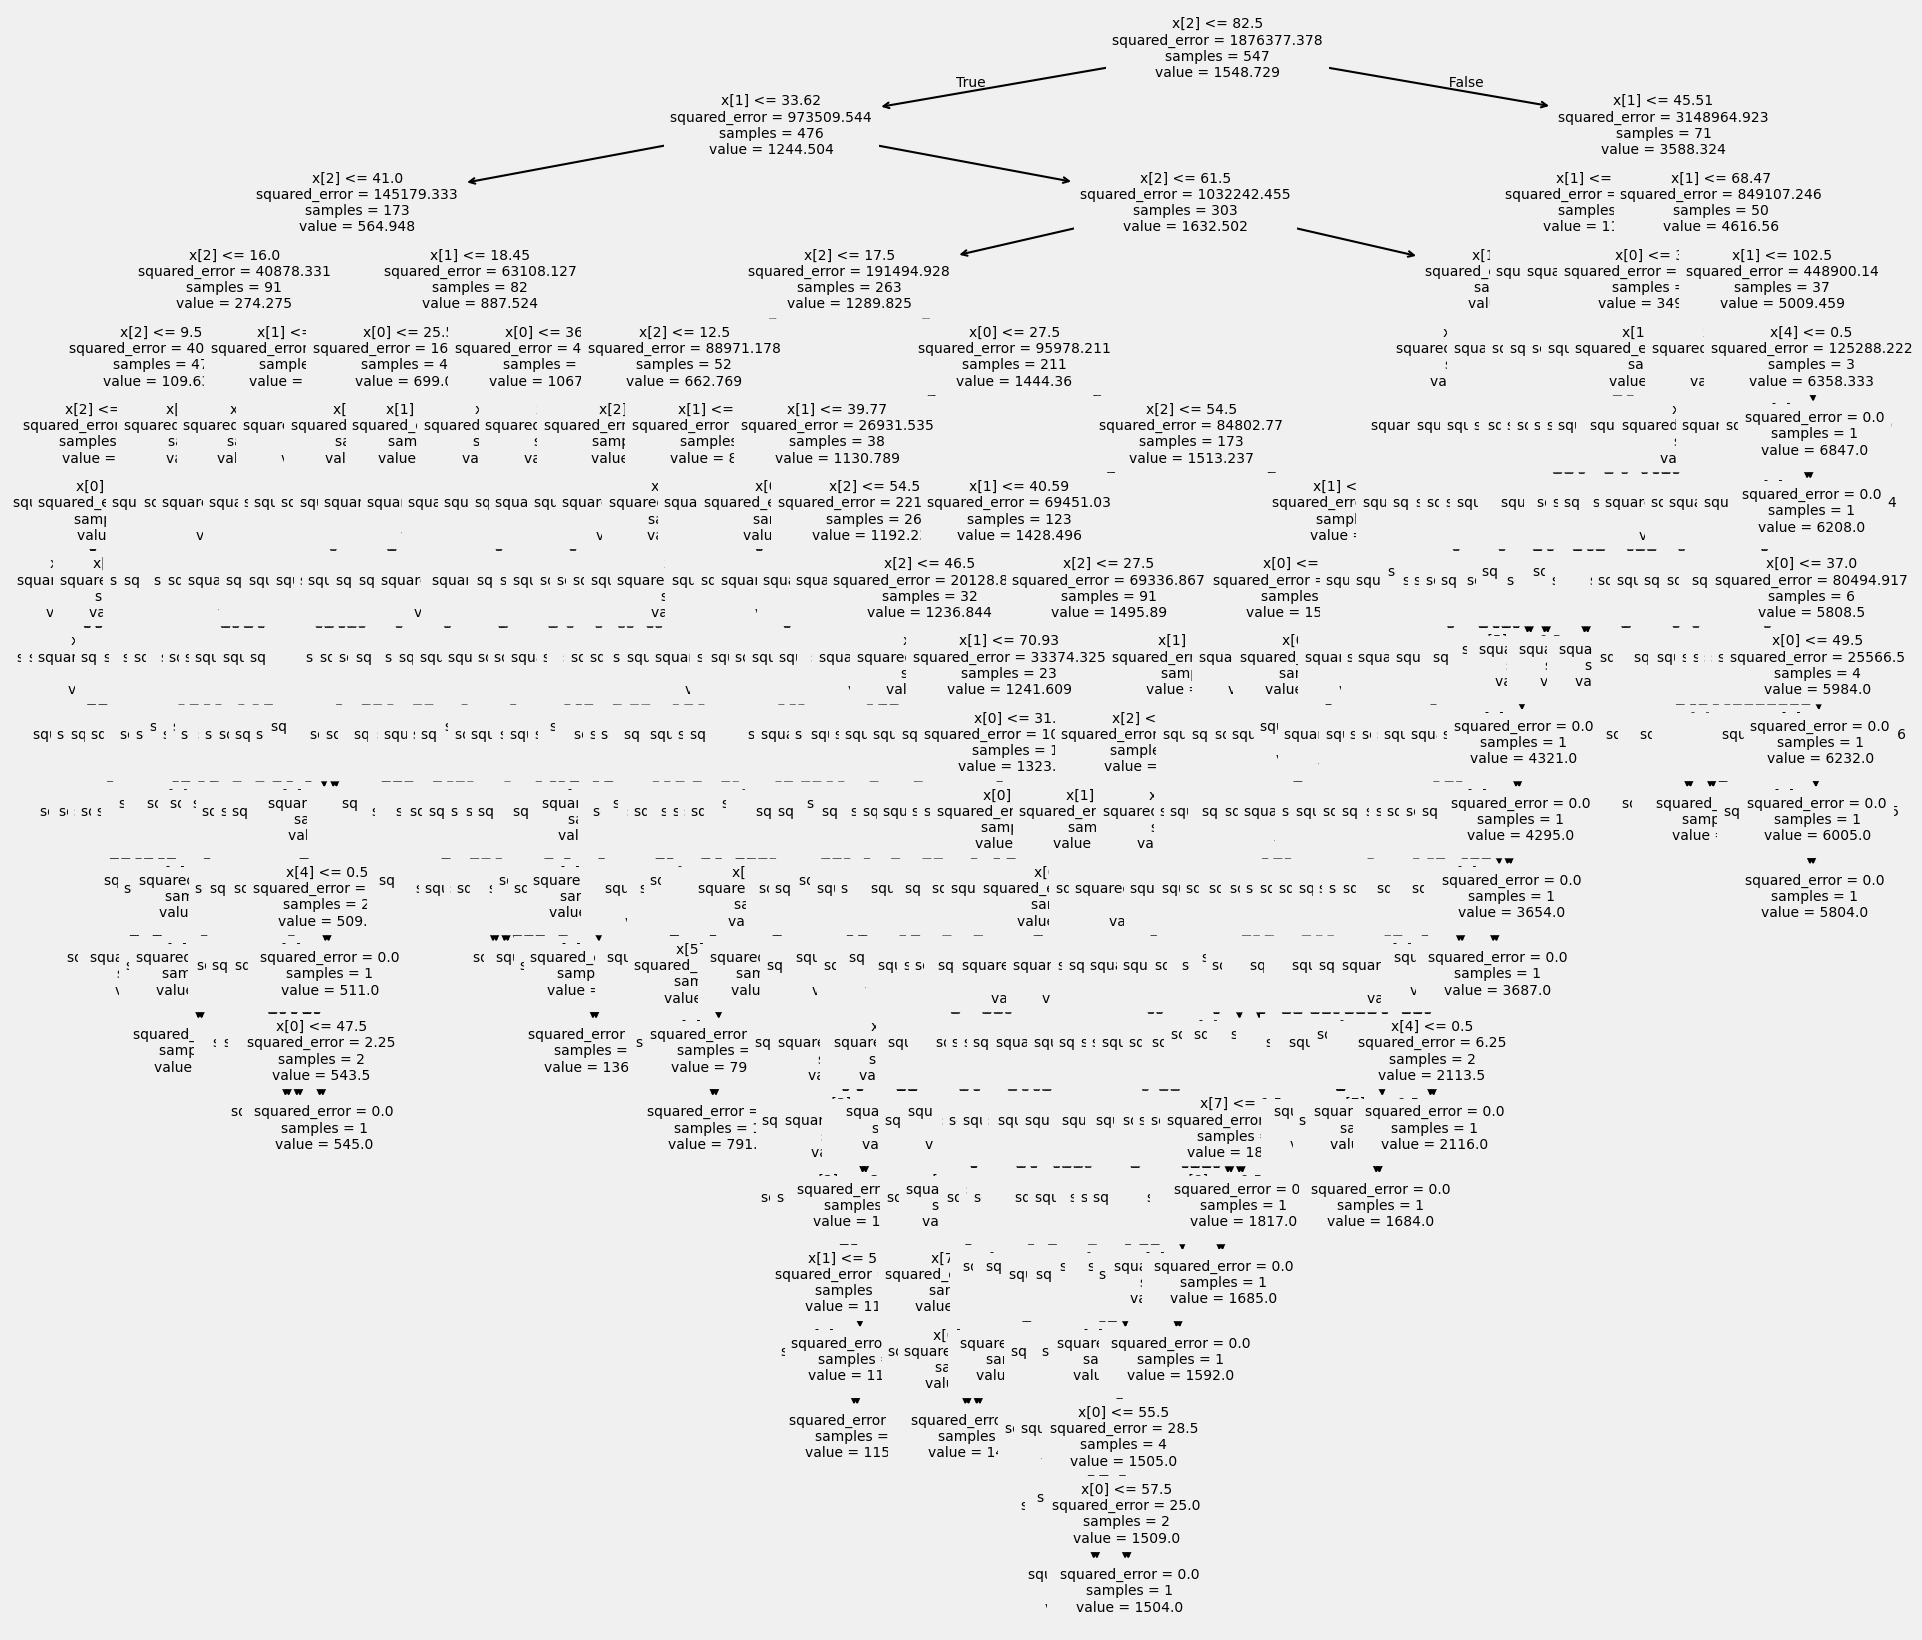

In [91]:
# Plot the regressor tree to create the visualization.
plt.figure(figsize = (20, 20))
tree.plot_tree(dtr, fontsize = 10)
plt.show()

**Feature Importance**

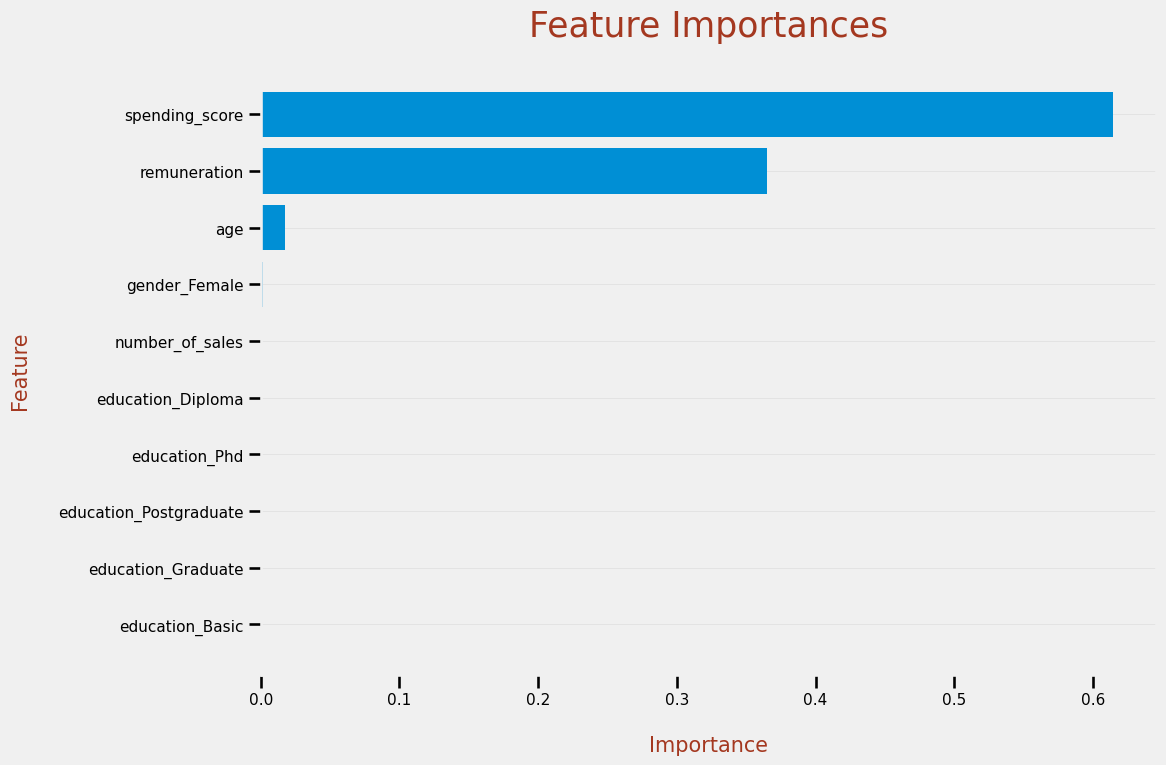

In [92]:
# Extract feature importances.
feature_importances = dtr.feature_importances_

# Create the list of columns.
feature_cols = [c for c in X_tree.columns]

# Create a DataFrame to display feature importances.
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances.
plt.figure(figsize = (12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances', color = '#a43820', size = 25, pad = 20)
plt.xlabel('Importance', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Feature', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.tight_layout()
plt.show()

The results of the Features Importance test matched those we got from the coefficients of the Multiple Linear Regression Model.
Remuneration, Spending Score, and Age are the best predictors of Loyalty Points, but there is a difference between the first two and Age.

**Pruning Process**

Since the dataset is small and to avoid overfitting in a bigger scale, pruning will be done. It will help us as well visualize the model.

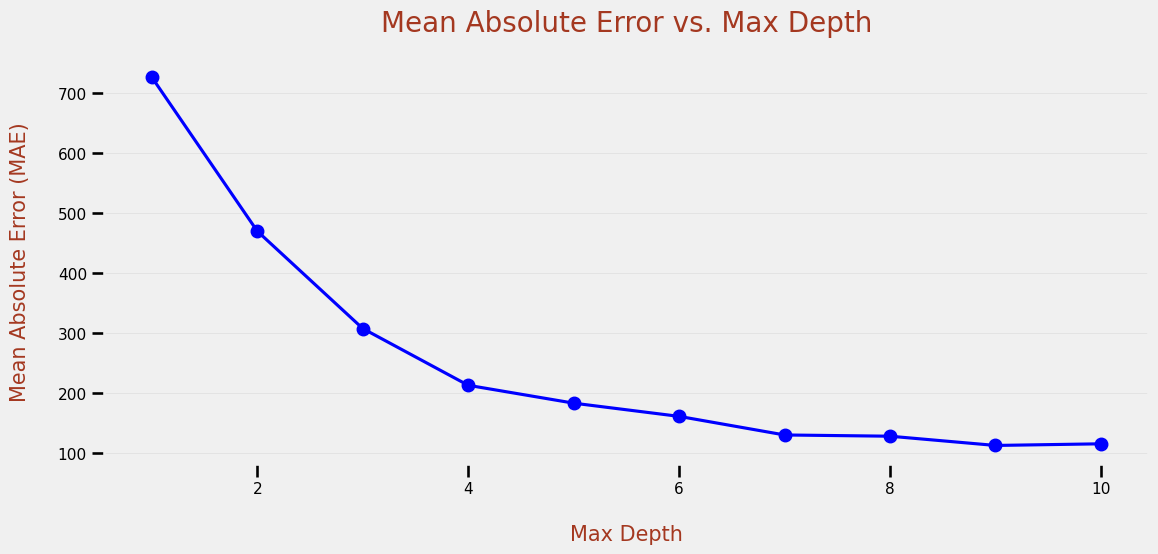

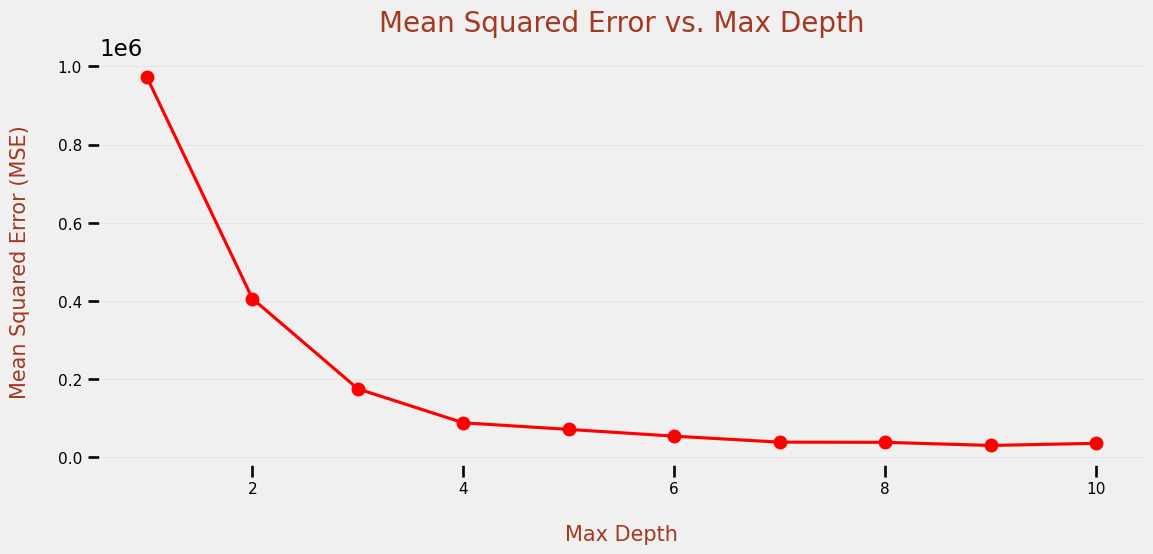

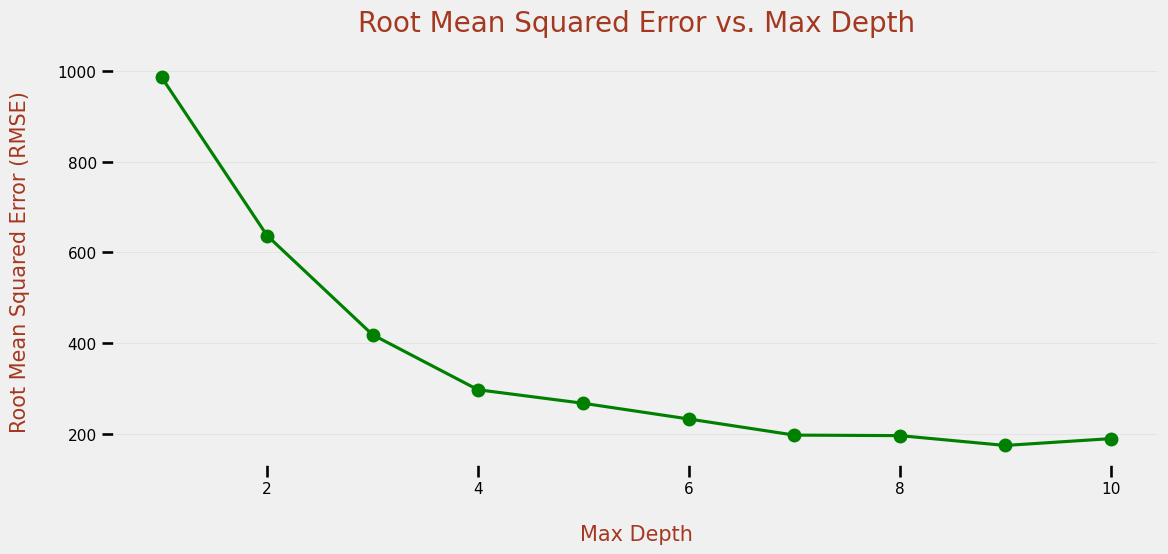

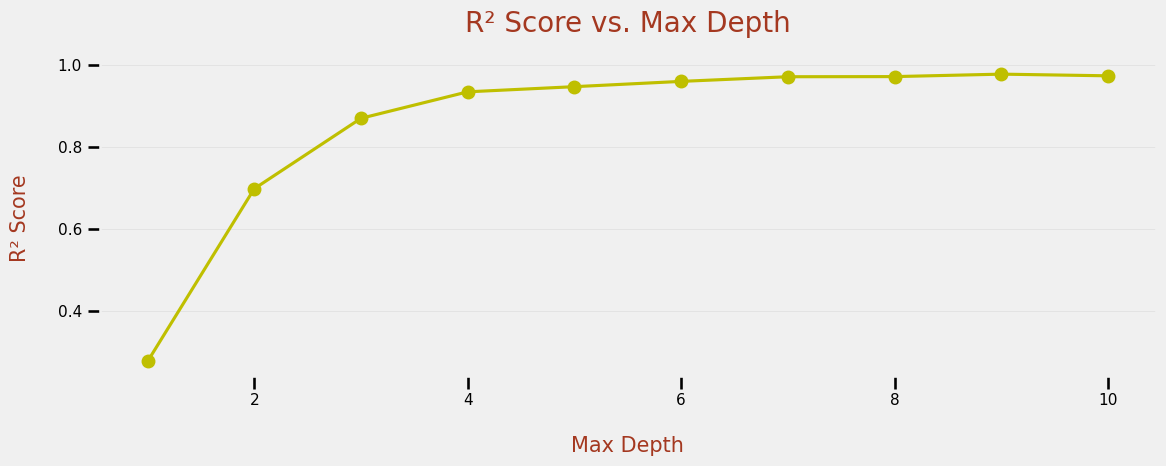

In [93]:
# List of depths to evaluate.
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Lists to store the metrics for each value of max_depth.
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

# Loop over the specified depths and evaluate the metrics.
for depth in max_depth_values:
    dtr2 = DecisionTreeRegressor(max_depth = depth, random_state=42)
    dtr2.fit(X_train, y_train)
    predictions = dtr2.predict(X_test)
    
    mae_dtr2 = metrics.mean_absolute_error(y_test, predictions)
    mse_dtr2 = metrics.mean_squared_error(y_test, predictions)
    rmse_dtr2 = np.sqrt(mse_dtr2)
    r2_dtr2 = metrics.r2_score(y_test, predictions)
    
    mae_list.append(mae_dtr2)
    mse_list.append(mse_dtr2)
    rmse_list.append(rmse_dtr2)
    r2_list.append(r2_dtr2)

# Convert the metrics lists to a DataFrame
metrics_df = pd.DataFrame({
    'max_depth': max_depth_values,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'R²': r2_list
})

# Plot MAE.
plt.figure(figsize=(12, 5))
plt.plot(metrics_df['max_depth'], metrics_df['MAE'], marker = 'o', linestyle = '-', color = 'b')
plt.title('Mean Absolute Error vs. Max Depth', color = '#a43820', size = 20, pad = 20)
plt.xlabel('Max Depth', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Mean Absolute Error (MAE)', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.show()

# Plot MSE.
plt.figure(figsize=(12, 5))
plt.plot(metrics_df['max_depth'], metrics_df['MSE'], marker = 'o', linestyle = '-', color = 'r')
plt.title('Mean Squared Error vs. Max Depth', color = '#a43820', size = 20, pad = 20)
plt.xlabel('Max Depth', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Mean Squared Error (MSE)', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.show()

# Plot RMSE.
plt.figure(figsize=(12, 5))
plt.plot(metrics_df['max_depth'], metrics_df['RMSE'], marker = 'o', linestyle = '-', color = 'g')
plt.title('Root Mean Squared Error vs. Max Depth', color = '#a43820', size = 20, pad = 20)
plt.xlabel('Max Depth', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Root Mean Squared Error (RMSE)', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.show()

# Plot R².
plt.figure(figsize=(12, 5))
plt.plot(metrics_df['max_depth'], metrics_df['R²'], marker = 'o', linestyle = '-', color = 'y')
plt.title('R² Score vs. Max Depth', color = '#a43820', size = 20, pad = 20)
plt.xlabel('Max Depth', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('R² Score', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.tight_layout()
plt.show()

We decided to go with max_depth = 4 since it is a good compromise between all the metrics visualized in the graphs previously and avoid overfitting.

**After Prune**

In [94]:
# Create regressor.
dtr_final = DecisionTreeRegressor(max_depth = 4,
                                  random_state = 42)

# Fit the Data.
dtr_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [95]:
# Predict using the test data.
y_test_pred_final = dtr_final.predict(X_test)

# Calculate mean absolute error.
mae_dtr_final = metrics.mean_absolute_error(y_test, y_test_pred_final)

# Calculate mean squared error.
mse_dtr_final = metrics.mean_squared_error(y_test, y_test_pred_final)

# Calculate root mean squared error.
rmse_dtr_final = np.sqrt(mse_dtr)

# Calculate the R2 score.
r2_dtr_final = metrics.r2_score(y_test, y_test_pred_final)

print('Mean Absolute Error:', mae_dtr_final)
print('Mean Squared Error:', mse_dtr_final)
print('Root Mean Squared Error:', rmse_dtr_final)
print('R2 Score', r2_dtr_final)

Mean Absolute Error: 212.95674838192713
Mean Squared Error: 88365.07904614505
Root Mean Squared Error: 180.5815310647856
R2 Score 0.9342317936062399


R² continues very good in terms of predicting, as well as the other performance metrics.

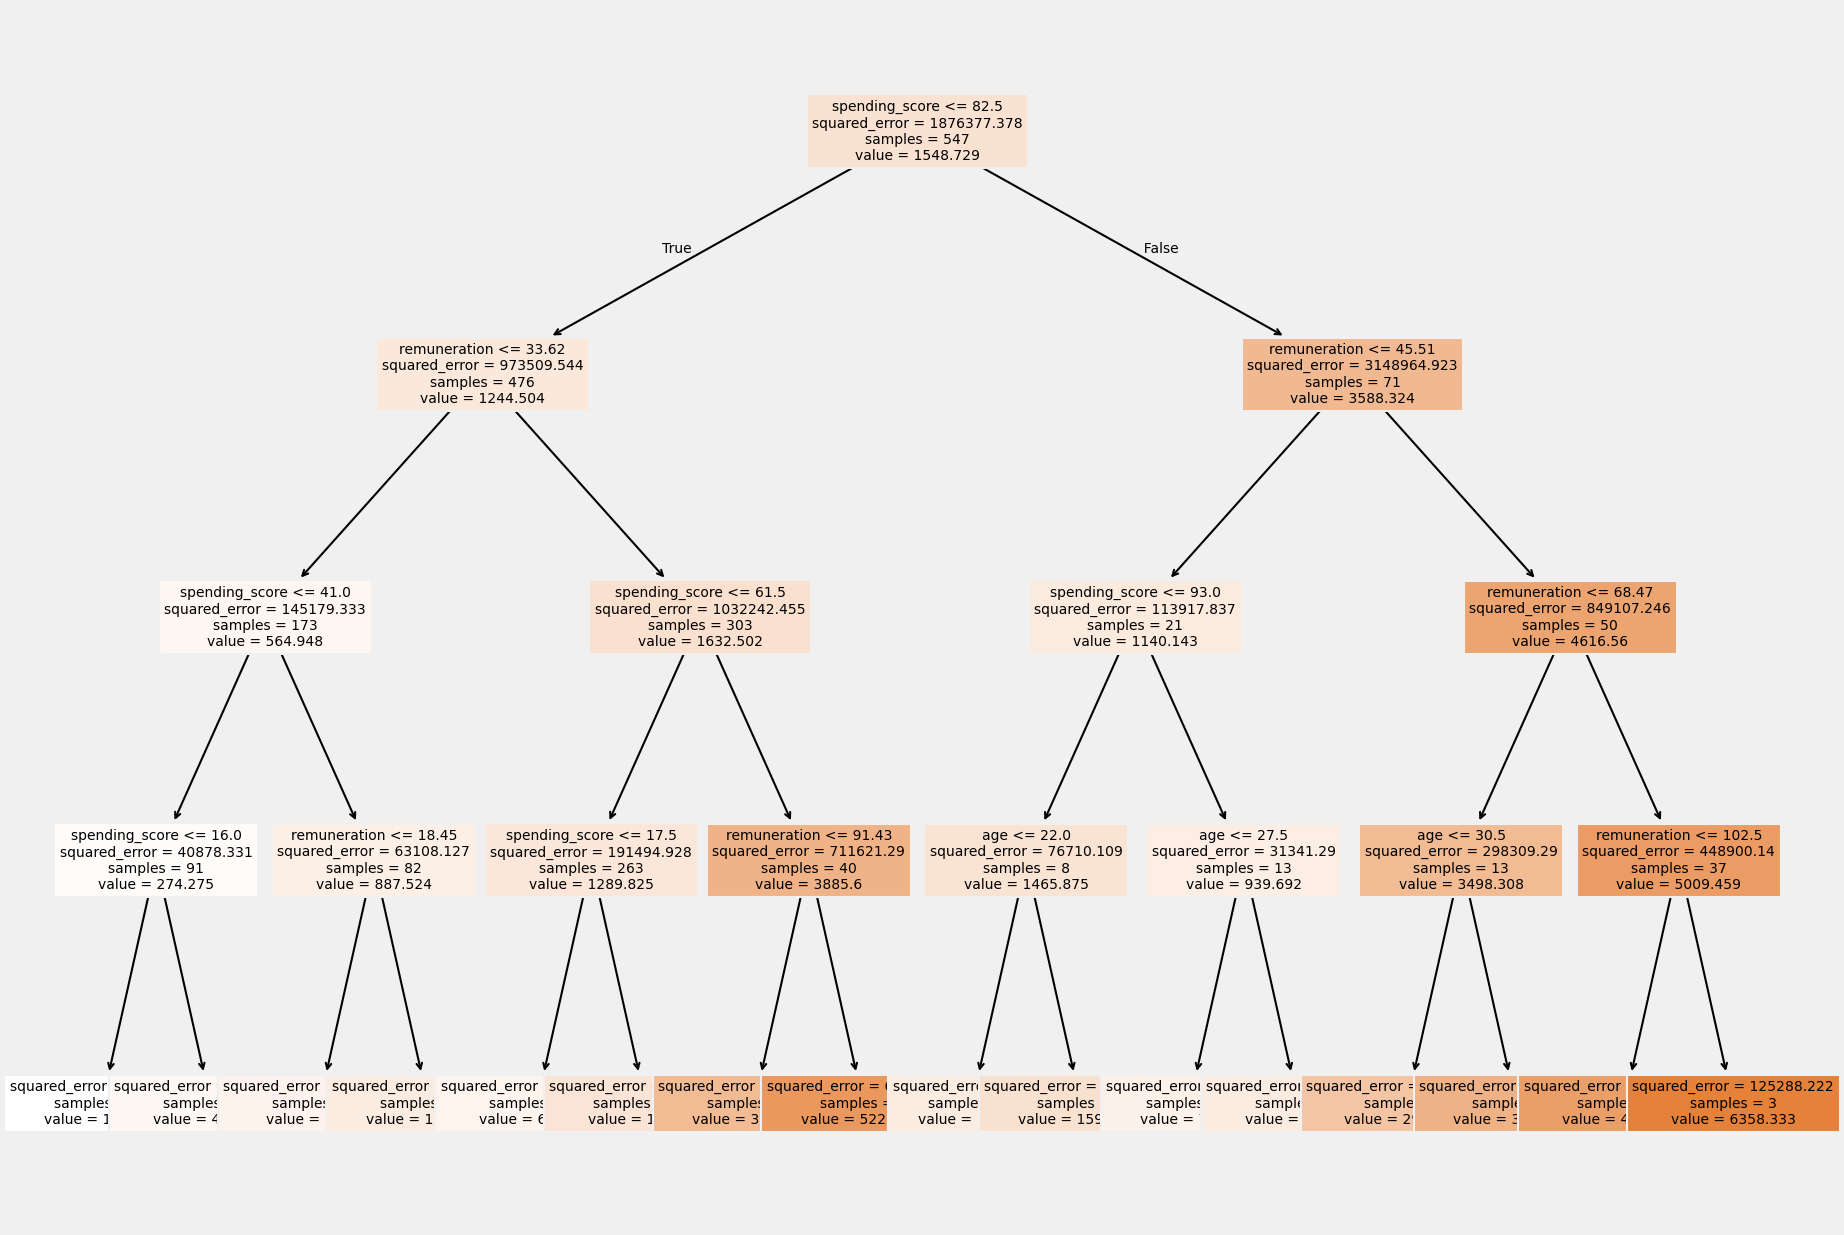

In [96]:
# Increase the figure size to accommodate larger text.
plt.figure(figsize=(20, 15))

# Plot the tree with adjusted parameters.
tree.plot_tree(dtr_final, filled = True, feature_names = X_tree.columns, fontsize = 10)
plt.xlim(0, 300)  # Adjust xlim based on the tree structure
plt.ylim(0, 150)  # Adjust ylim based on the tree structure
plt.show()

<div style="color:#a43820; font-weight:bold;">
    
## Customer Segmentation
    
</div>

In [97]:
# Create a copy of the dataframe.
clients_segments = clients_final.copy()

# Visualize.
clients_segments.head()

age  remuneration  spending_score  gender     education  number_of_sales  \
0   17         13.94              40  Female  Postgraduate                1   
1   17         18.86              98    Male           Phd                1   
2   17         27.06               4    Male           Phd                1   
3   17         27.06              92    Male           Phd                7   
4   17         35.26              54  Female  Postgraduate                1   

   client_id  loyalty_points  
0          1             233  
1          2             774  
2          3              45  
3          4            1042  
4          5             797

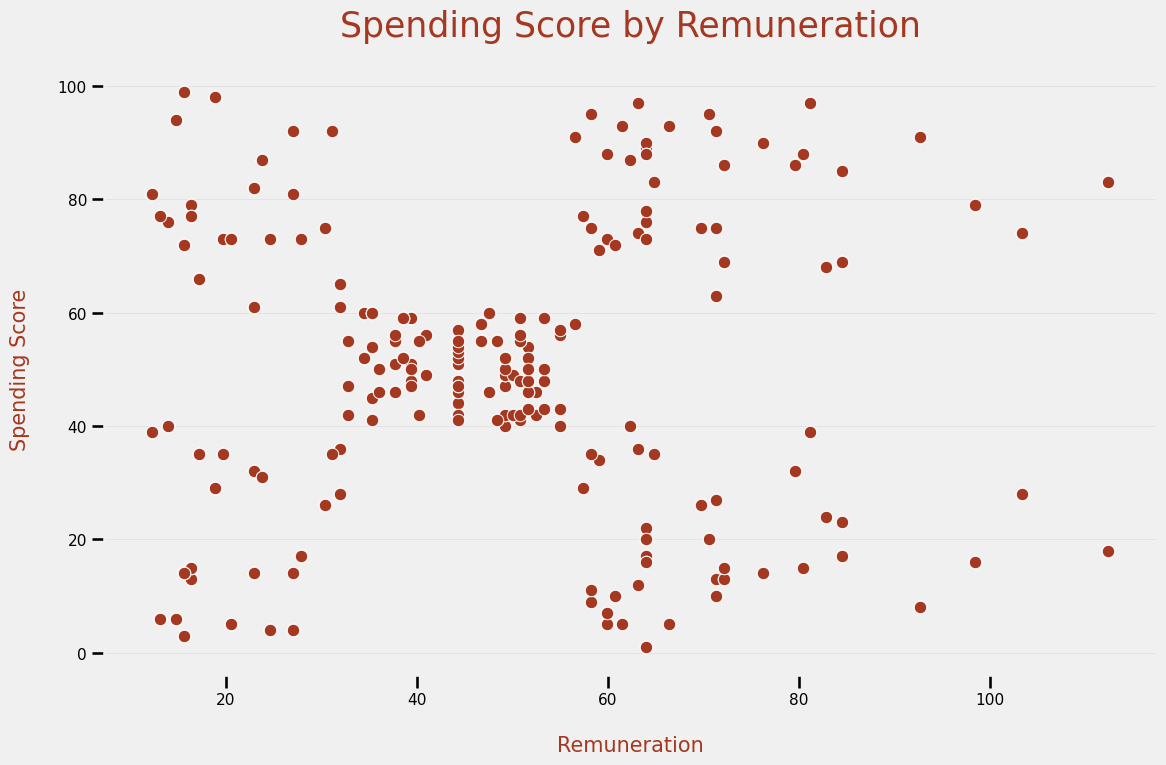

In [98]:
# Review renumeration x spending score visualization.
scatterplot('remuneration', 'spending_score', clients_segments,
            title = 'Spending Score by Remuneration',
            xlabel = 'Remuneration',
            ylabel = 'Spending Score')

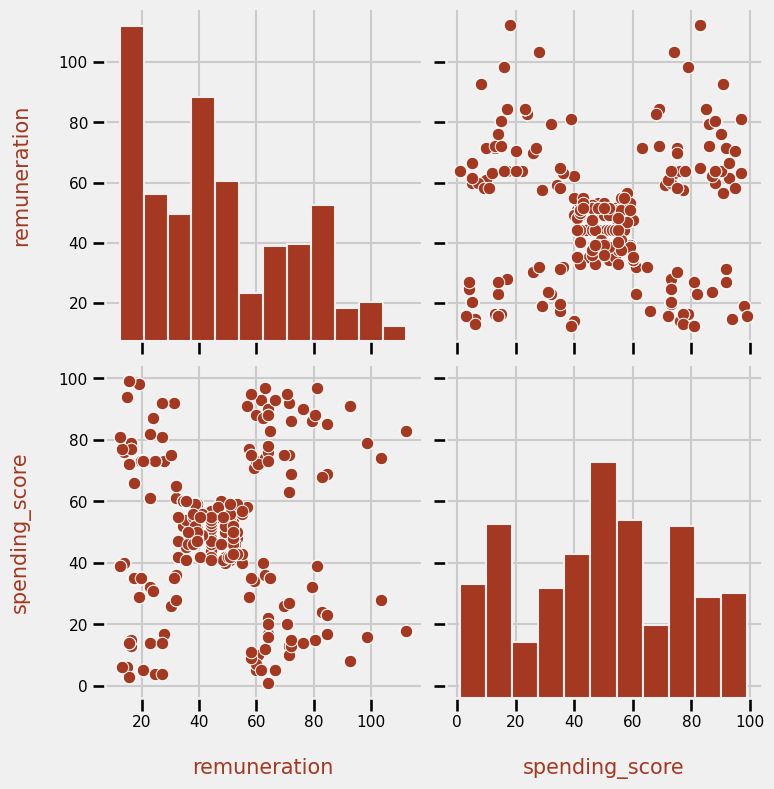

In [99]:
# Create variable independents.
X = clients_segments[['remuneration', 'spending_score']]

# Create a pairplot.
pairplot = sns.pairplot(X, height = 4, aspect = 1, plot_kws = {'color': '#a43820'}, diag_kws = {'color': '#a43820', 'alpha': 1})

# Customize labels and ticks.
for ax in pairplot.axes.flatten():
    if ax is not None:  
        ax.set_xlabel(ax.get_xlabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()

**The elbow method**

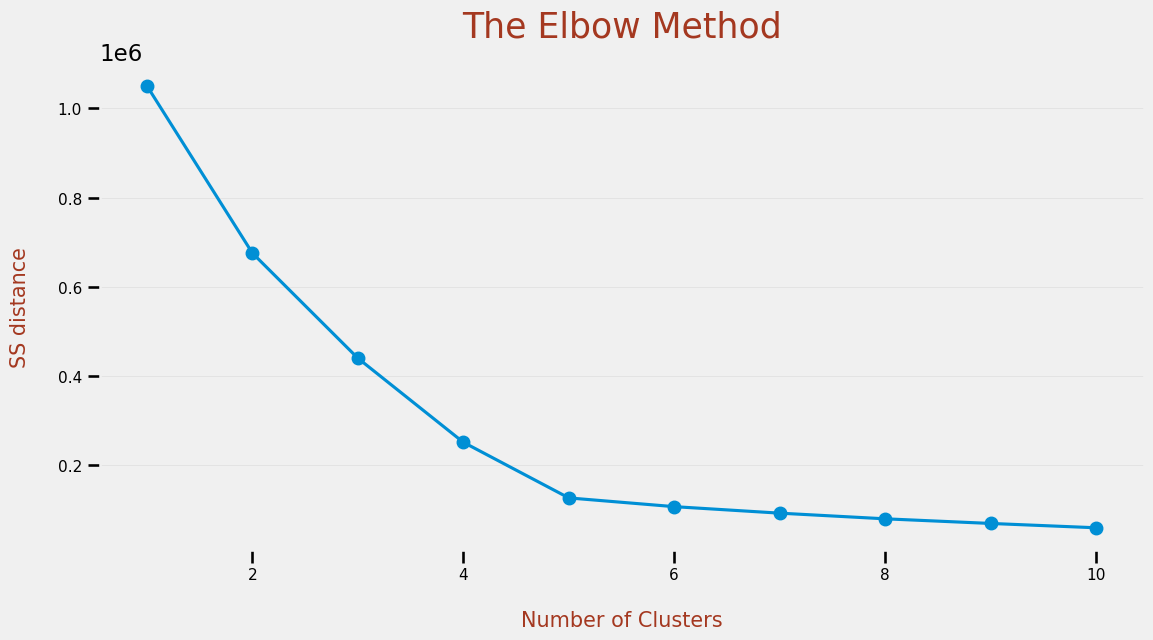

In [100]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.figure(figsize = (12,6))
plt.plot(range(1, 11), ss, marker = 'o')
plt.title("The Elbow Method", color = '#a43820', size = 25, pad = 20)
plt.xlabel("Number of Clusters", color ='#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel("SS distance", color ='#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.show()

**The shilhouette method**

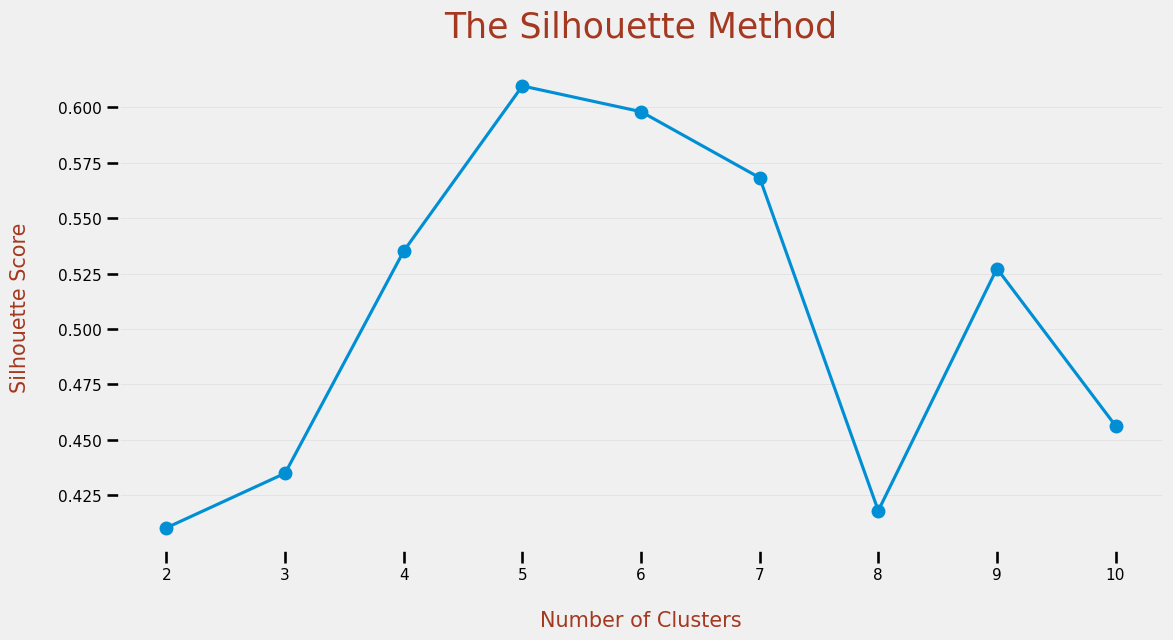

In [101]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(X)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X,
                                labels,
                                random_state = 42,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.figure(figsize = (12,6))
plt.plot(range(2, kmax+1), sil, marker = 'o')
plt.title("The Silhouette Method", color = '#a43820', size = 25, pad = 20)
plt.xlabel("Number of Clusters", color ='#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel("Silhouette Score", color ='#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.show()

**Evaluate different values of K**

Selection will be between k = 5, 6 or 7. 5 seems the better one according to both tests.

**K = 5**

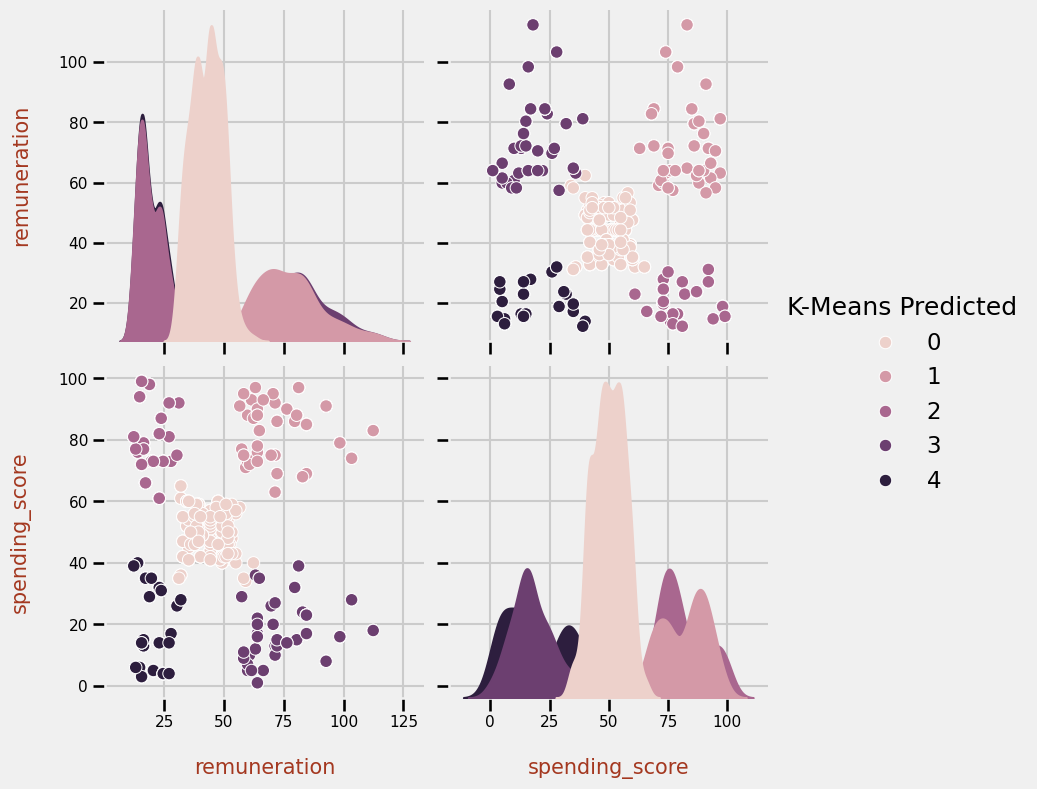

In [102]:
# Use 5 clusters:
kmeans_5 = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(X)

clusters = kmeans_5.labels_
X['K-Means Predicted'] = clusters


# Create a pairplot.
pairplot = sns.pairplot(X, hue = 'K-Means Predicted', diag_kind = 'kde',
                        height = 4, aspect = 1,
                        plot_kws = {'color': '#a43820'}, diag_kws = {'color': '#a43820', 'alpha': 1})

# Customize labels and ticks.
for ax in pairplot.axes.flatten():
    if ax is not None:  
        ax.set_xlabel(ax.get_xlabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()

In [103]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

K-Means Predicted
0    282
4    132
2    127
1    121
3    120
Name: count, dtype: int64

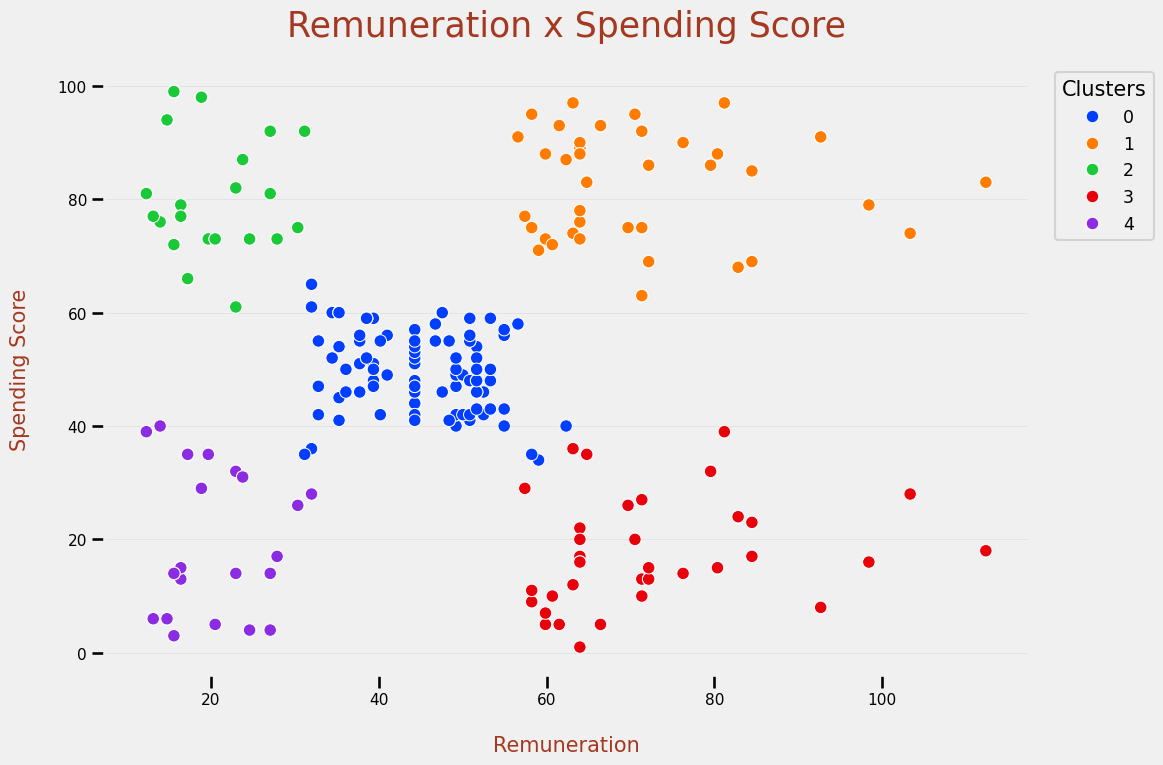

In [104]:
# Visualize clusters in a scatterplot.
scatterplot_for_clustering('remuneration', 'spending_score', X, 'K-Means Predicted',
                            title = 'Remuneration x Spending Score',
                            xlabel = 'Remuneration',
                            ylabel = 'Spending Score',
                            titlelegend = 'Clusters')

**K = 6**

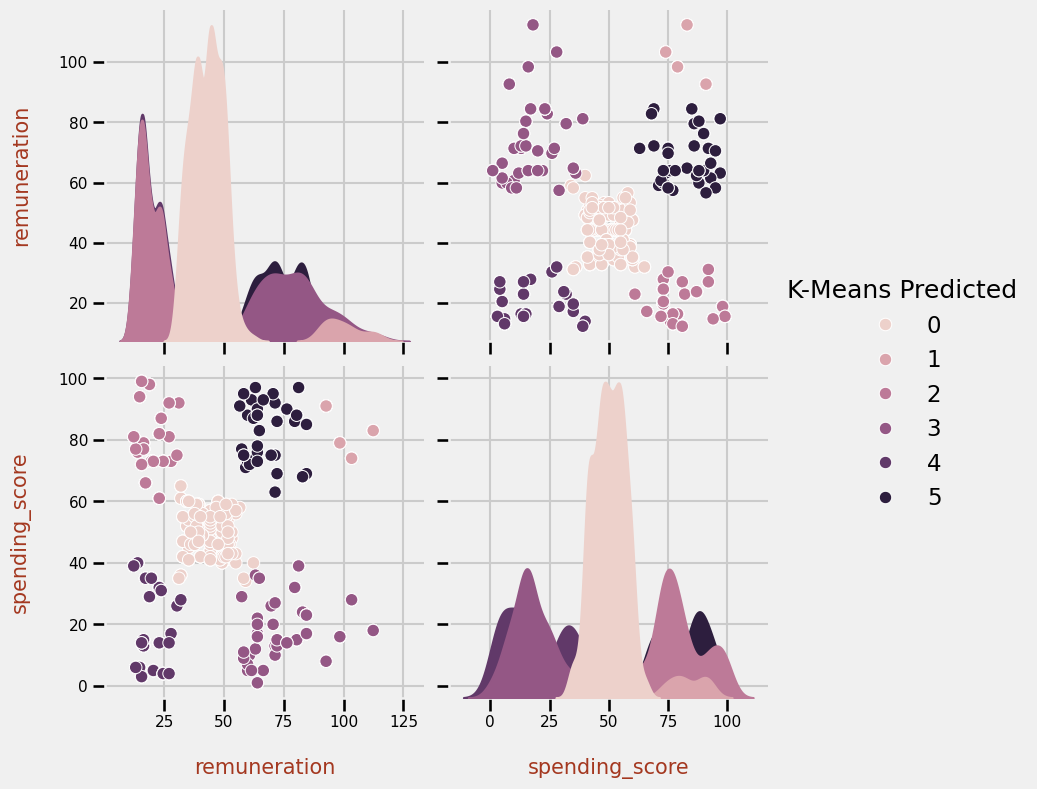

In [105]:
# Use 6 clusters:
kmeans_6 = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(X)

clusters = kmeans_6.labels_
X['K-Means Predicted'] = clusters

# Create a pairplot. 
pairplot = sns.pairplot(X, hue = 'K-Means Predicted', diag_kind = 'kde',
                        height = 4, aspect = 1,
                        plot_kws = {'color': '#a43820'}, diag_kws = {'color': '#a43820', 'alpha': 1})

# Customize labels and ticks.
for ax in pairplot.axes.flatten():
    if ax is not None:  
        ax.set_xlabel(ax.get_xlabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()

In [106]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

K-Means Predicted
0    282
4    132
2    127
3    120
5    100
1     21
Name: count, dtype: int64

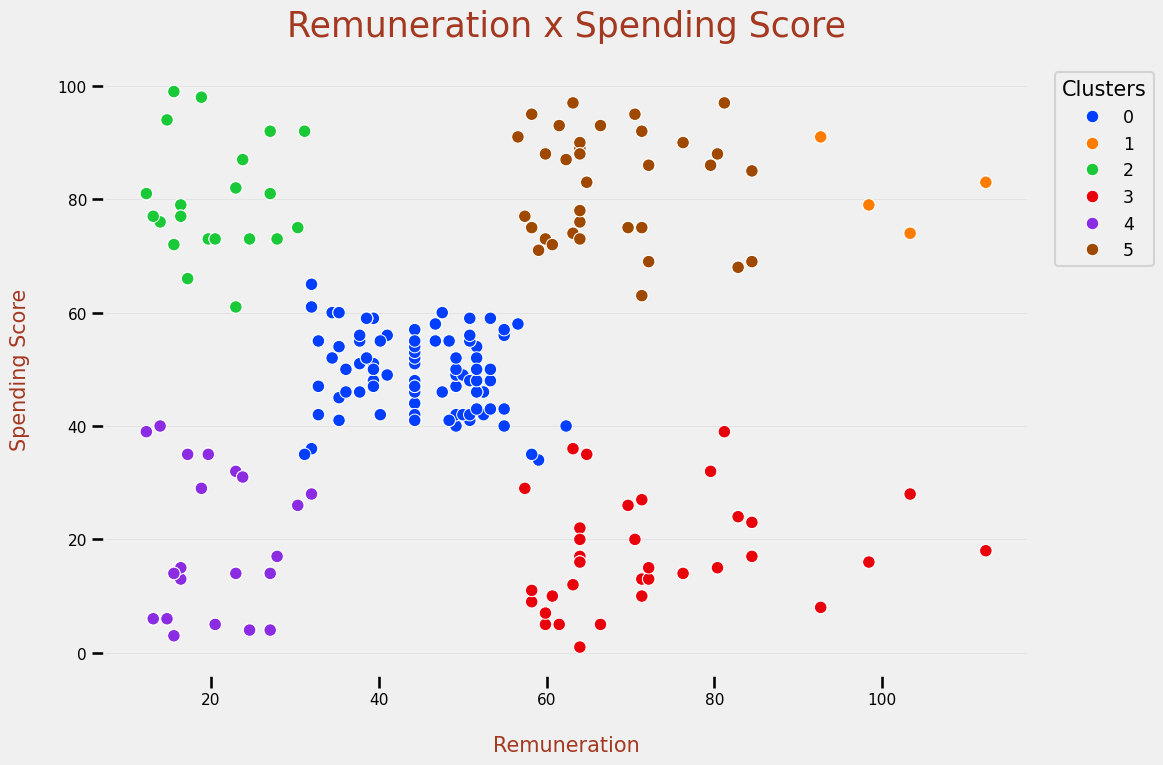

In [107]:
# Visualize clusters in a scatterplot.
scatterplot_for_clustering('remuneration', 'spending_score', X, 'K-Means Predicted',
                            title = 'Remuneration x Spending Score',
                            xlabel = 'Remuneration',
                            ylabel = 'Spending Score',
                            titlelegend = 'Clusters')

**K = 7**

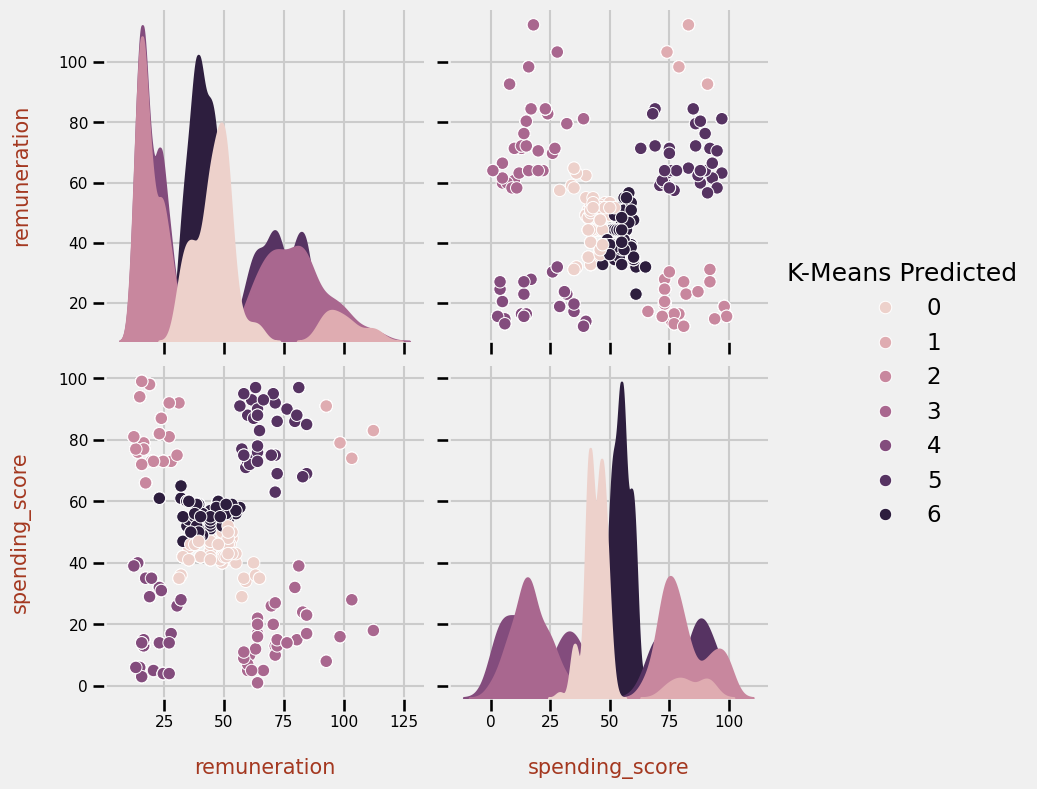

In [108]:
# Use 7 clusters:
kmeans_7 = KMeans(n_clusters = 7,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(X)

clusters = kmeans_7.labels_
X['K-Means Predicted'] = clusters

# Create a pairplot. 
pairplot = sns.pairplot(X, hue = 'K-Means Predicted', diag_kind = 'kde',
                        height = 4, aspect = 1,
                        plot_kws = {'color': '#a43820'}, diag_kws = {'color': '#a43820', 'alpha': 1})

# Customize labels and ticks.
for ax in pairplot.axes.flatten():
    if ax is not None:  
        ax.set_xlabel(ax.get_xlabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=15, color='#a43820', labelpad=20)
        ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()

In [109]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

K-Means Predicted
6    163
4    132
0    130
2    120
3    116
5    100
1     21
Name: count, dtype: int64

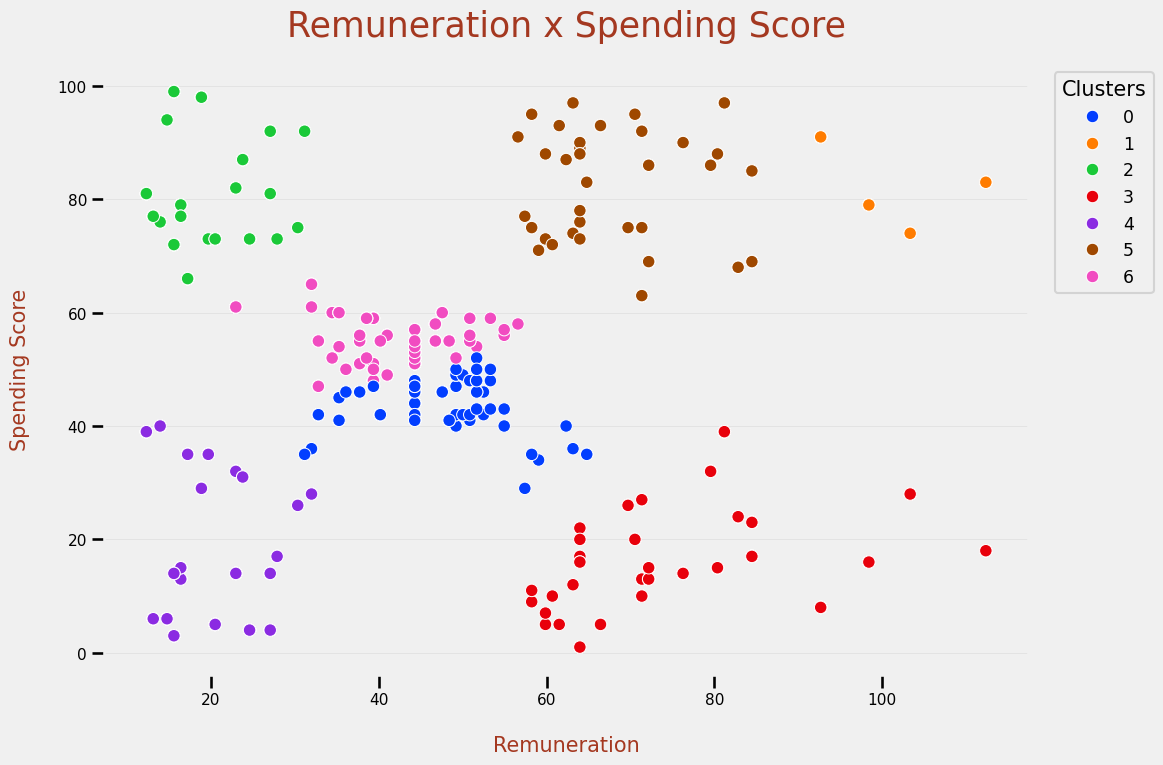

In [110]:
# Visualize clusters in a scatterplot.
scatterplot_for_clustering('remuneration', 'spending_score', X, 'K-Means Predicted',
                            title = 'Remuneration x Spending Score',
                            xlabel = 'Remuneration',
                            ylabel = 'Spending Score',
                            titlelegend = 'Clusters')

**Let's go for 5 clusters**

From a visual analysis of the scatterplot, 5 clusters appears as the number one option for the number of cluster. The Elbow method and the Silhouette model reassure that result. So we are segmenting our data in 5 clusters.

In [111]:
# Use 5 clusters.
km = KMeans(n_clusters = 5, n_init = 10, random_state = 42)

# Fitting the input data.
km.fit(X)

# Predicting the clusters of the input data.
y = km.predict(X)

In [112]:
# Adding the cluster to our dataframe.
clients_segments['segment'] = y

# Visualize our DataFrame.
clients_segments

age  remuneration  spending_score  gender     education  number_of_sales  \
0     17         13.94              40  Female  Postgraduate                1   
1     17         18.86              98    Male           Phd                1   
2     17         27.06               4    Male           Phd                1   
3     17         27.06              92    Male           Phd                7   
4     17         35.26              54  Female  Postgraduate                1   
..   ...           ...             ...     ...           ...              ...   
777   72         37.72              56    Male  Postgraduate                7   
778   72         39.36              47    Male           Phd                1   
779   72         40.18              55    Male           Phd                7   
780   72         66.42              93    Male           Phd                1   
781   72        112.34              18    Male           Phd                1   

     client_id  loyalty_points  segment  
0            1             233        4  
1            2             774        2  
2            3              45        4  
3            4            1042        2  
4            5             797        0  
..         ...             ...      ...  
777        778            1264        0  
778        779            1107        0  
779        780            1322        0  
780        781            3695        1  
781        782            1210        3  

[782 rows x 9 columns]

In [113]:
# Check the number of observations per predicted class.
clients_segments['segment'].value_counts()

segment
0    282
4    132
2    127
1    121
3    120
Name: count, dtype: int64

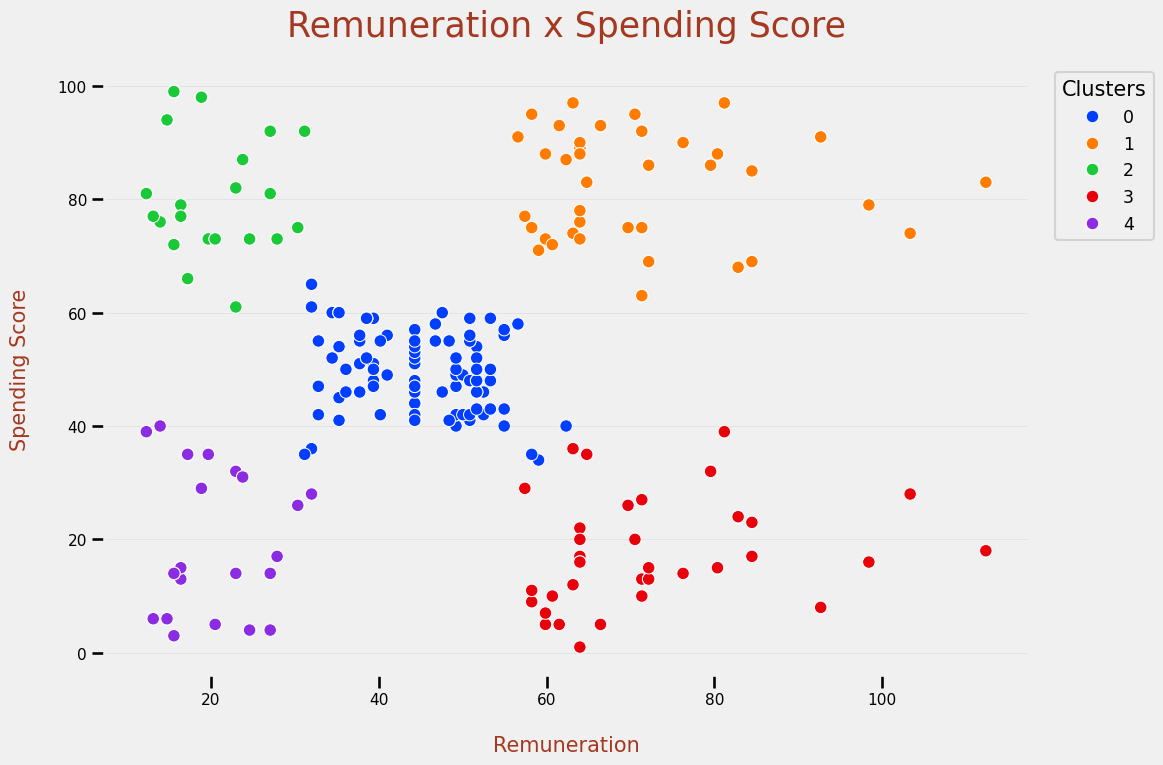

In [114]:
# Visualize again clusters in a scatterplot.
scatterplot_for_clustering('remuneration', 'spending_score', clients_segments, 'segment',
                            title = 'Remuneration x Spending Score',
                            xlabel = 'Remuneration',
                            ylabel = 'Spending Score',
                            titlelegend = 'Clusters')

**Segments Analysis**

In [115]:
# Check the attributes by cluster.
cluster_analysis = clients_segments.groupby('segment')[['remuneration', 'spending_score']].mean().round(2).sort_values(by = 'remuneration')

# Visualize.
cluster_analysis

remuneration  spending_score
segment                              
2               19.31           79.89
4               19.57           19.04
0               42.88           49.94
1               77.55           81.75
3               79.22           17.97

**0 - Balanced Buyers**

Remuneration: 42.88

Spending Score: 49.94

Description: Customers with moderate income and balanced spending. They are reliable and appreciate a variety of products.

**1 - Premium Enthusiasts**

Remuneration: 77.55

Spending Score: 81.75

Description: High-income customers who spend significantly and frequently. They value premium and exclusive items.

**2 - Passionate Gamers**

Remuneration: 19.31

Spending Score: 79.89

Description: Customers with lower income but high spending enthusiasm. They allocate a significant portion of their budget to their interests.

**3 - High Income Minimalists**

Remuneration: 79.22

Spending Score: 17.97

Description: High-income customers who spend minimally. They are selective buyers.

**4 - Casual Shoppers**

Remuneration: 19.57

Spending Score: 19.04

Description: Low-income customers with cautious spending habits. They are occasional buyers.

In [116]:
# I will add the name of our segments to the DataFrame.

# Mapping the segments.
segment_names = {
    0: 'Balanced Buyers',
    1: 'Premium Enthusiasts',
    2: 'Passionate Gamers',
    3: 'High Income Minimalists',
    4: 'Casual Shoppers',
}

# Creating the column with the type of clients.
clients_segments['segment_names'] = clients_segments['segment'].map(segment_names)

# Visualize our DataFrame.
clients_segments.head(7)

age  remuneration  spending_score  gender     education  number_of_sales  \
0   17         13.94              40  Female  Postgraduate                1   
1   17         18.86              98    Male           Phd                1   
2   17         27.06               4    Male           Phd                1   
3   17         27.06              92    Male           Phd                7   
4   17         35.26              54  Female  Postgraduate                1   
5   17         44.28              52    Male           Phd                1   
6   17         48.38              41    Male           Phd                7   

   client_id  loyalty_points  segment      segment_names  
0          1             233        4    Casual Shoppers  
1          2             774        2  Passionate Gamers  
2          3              45        4    Casual Shoppers  
3          4            1042        2  Passionate Gamers  
4          5             797        0    Balanced Buyers  
5          6             964        0    Balanced Buyers  
6          7             830        0    Balanced Buyers

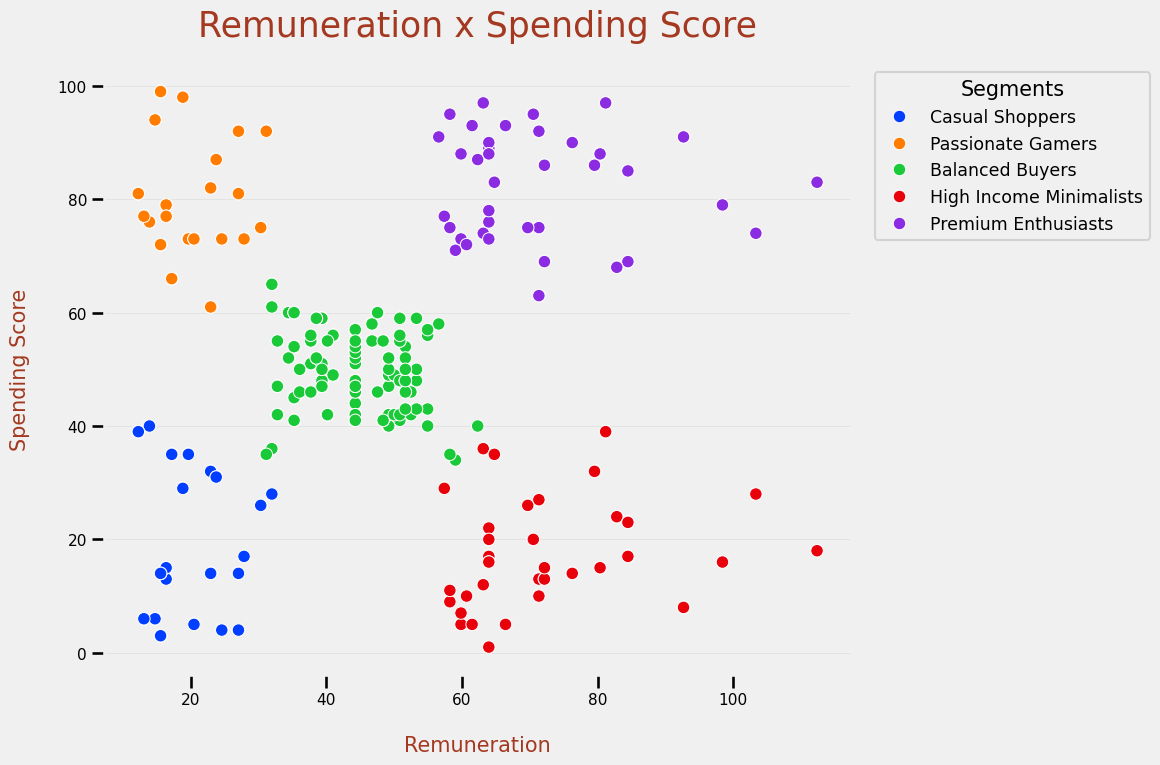

In [117]:
# Visualize the segment names.
scatterplot_for_clustering('remuneration', 'spending_score', clients_segments, 'segment_names',
                            title = 'Remuneration x Spending Score',
                            xlabel = 'Remuneration',
                            ylabel = 'Spending Score',
                            titlelegend = 'Segments')

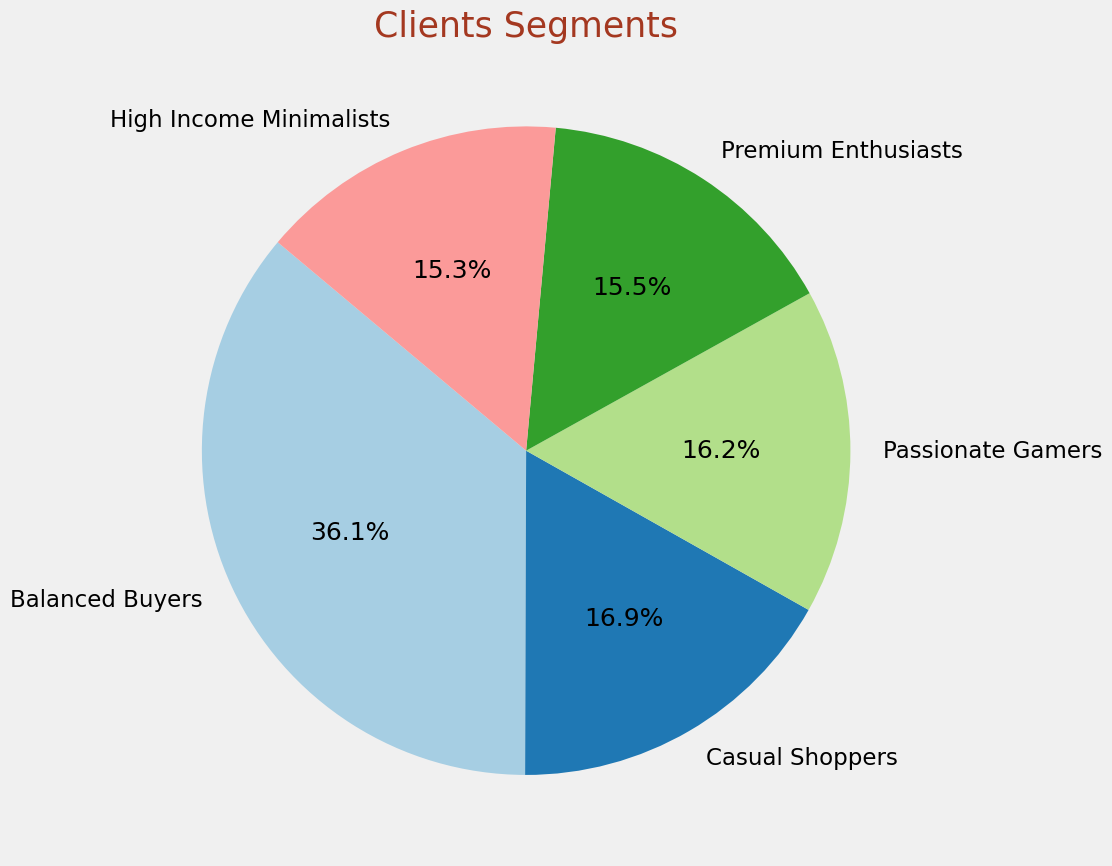

In [118]:
# Visualize the share of each segment.

# Check the share of each segment.
segments_count = clients_segments['segment_names'].value_counts()

# Calculate the share of each segment.
segment_share = (segments_count / segments_count.sum()) * 100

# Visualize in a pie chart. 
plt.figure(figsize = (12,9))
segment_share.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 140, colors = plt.cm.Paired.colors)
plt.title('Clients Segments', color = '#a43820', size = 25)
plt.ylabel('')
plt.tight_layout()
plt.show()

Balanced Buyers are Turtle Games' number 1 group. The rest of them have a share very close to each other.

In [119]:
# Visualize the numeric characteristics of each groups.
segments_numeric = clients_segments.groupby('segment_names')\
                 [['age', 'number_of_sales', 'remuneration', 'spending_score', 'loyalty_points']].mean().round(2).reset_index()

# Visualize in a table.
segments_numeric

segment_names    age  number_of_sales  remuneration  \
0          Balanced Buyers  40.29             2.81         42.88   
1          Casual Shoppers  41.70             1.98         19.57   
2  High Income Minimalists  40.48             2.75         79.22   
3        Passionate Gamers  36.19             2.04         19.31   
4      Premium Enthusiasts  38.11             2.94         77.55   

   spending_score  loyalty_points  
0           49.94         1388.88  
1           19.04          246.64  
2           17.97          953.19  
3           79.89          980.52  
4           81.75         4197.02

<span style="color: #808080; font-style: italic;">Age</span>

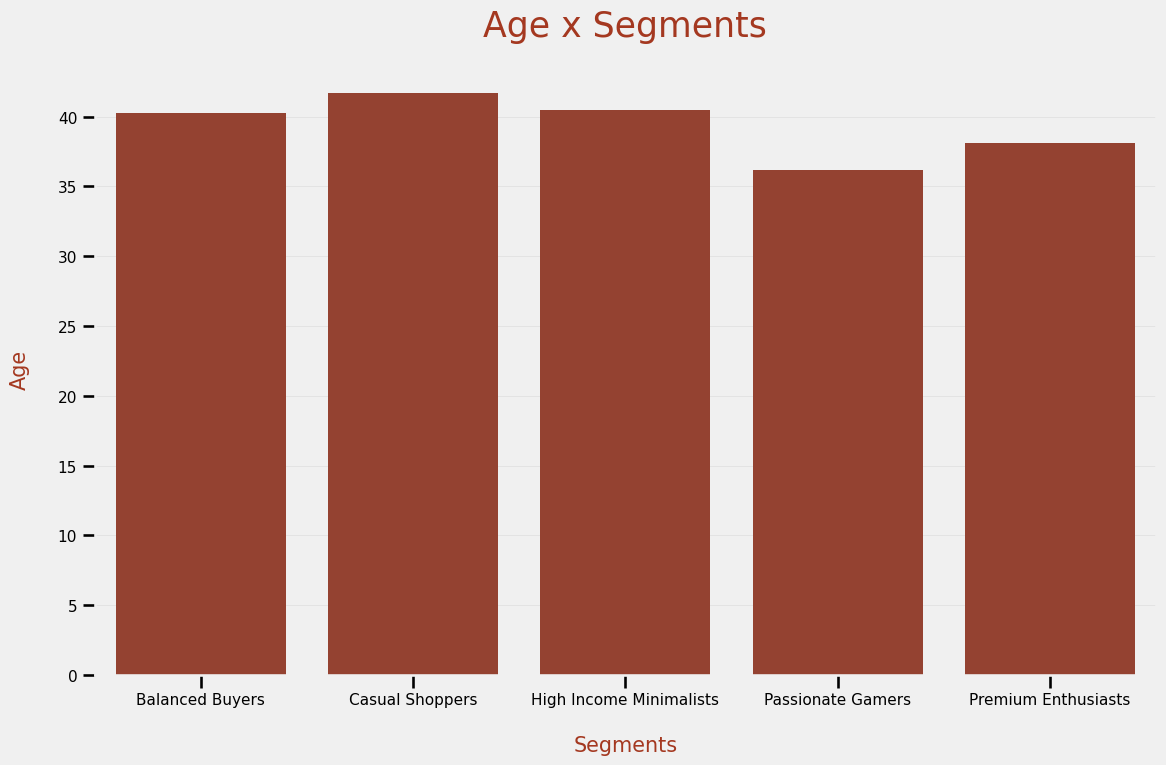

In [120]:
# Visualize in a bar chart.
barplot('segment_names', 'age', segments_numeric,
        title = 'Age x Segments',
        xlabel = 'Segments',
        ylabel = 'Age')

Age is very close between our segments. Passionate gamers are slightly younger than the rest. This makes sense since it is one of the groups with the lowest remuneration.

<span style="color: #808080; font-style: italic;">Number of Sales</span>

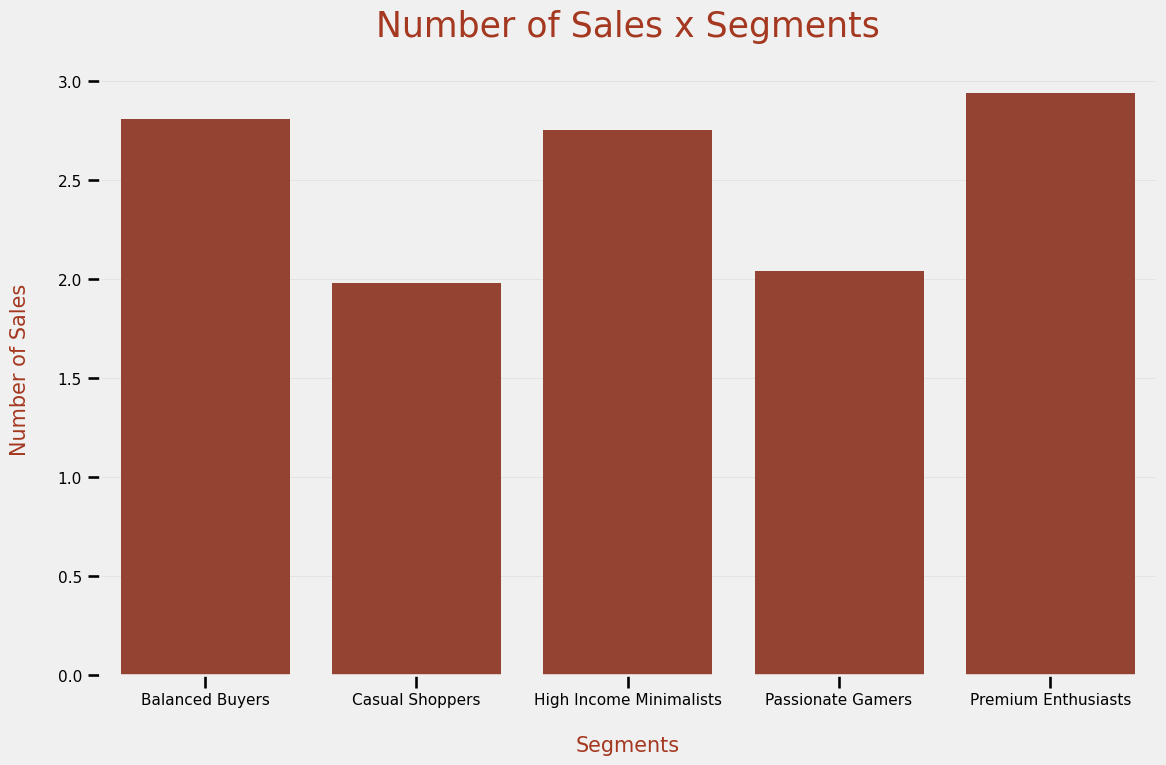

In [121]:
# Visualize in a bar chart.
barplot('segment_names', 'number_of_sales', segments_numeric,
        title = 'Number of Sales x Segments',
        xlabel = 'Segments',
        ylabel = 'Number of Sales')

Balanced Buyers, High Income Minimists, and Premium Enthusiasts, the groups with more average Remuneration, have a higher average number of sales.

<span style="color: #808080; font-style: italic;">Remuneration</span>

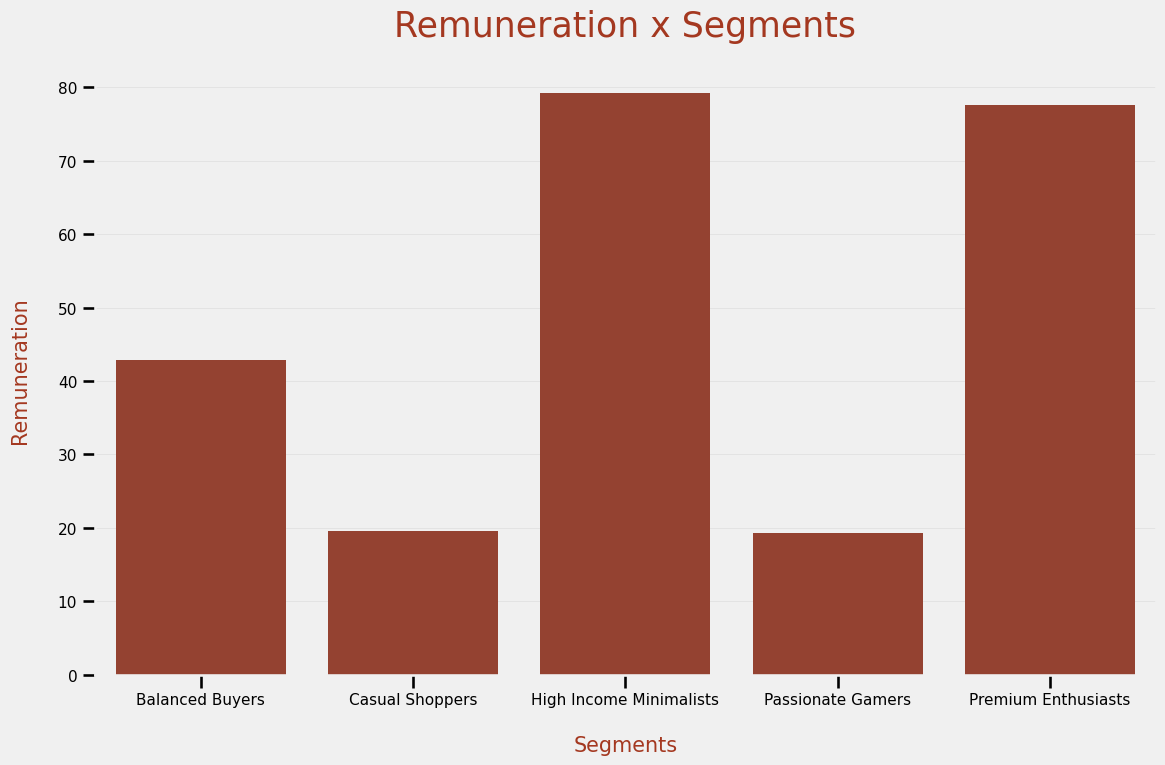

In [122]:
# Visualize in a bar chart.
barplot('segment_names', 'remuneration', segments_numeric,
        title = 'Remuneration x Segments',
        xlabel = 'Segments',
        ylabel = 'Remuneration')

<span style="color: #808080; font-style: italic;">Spending Score</span>

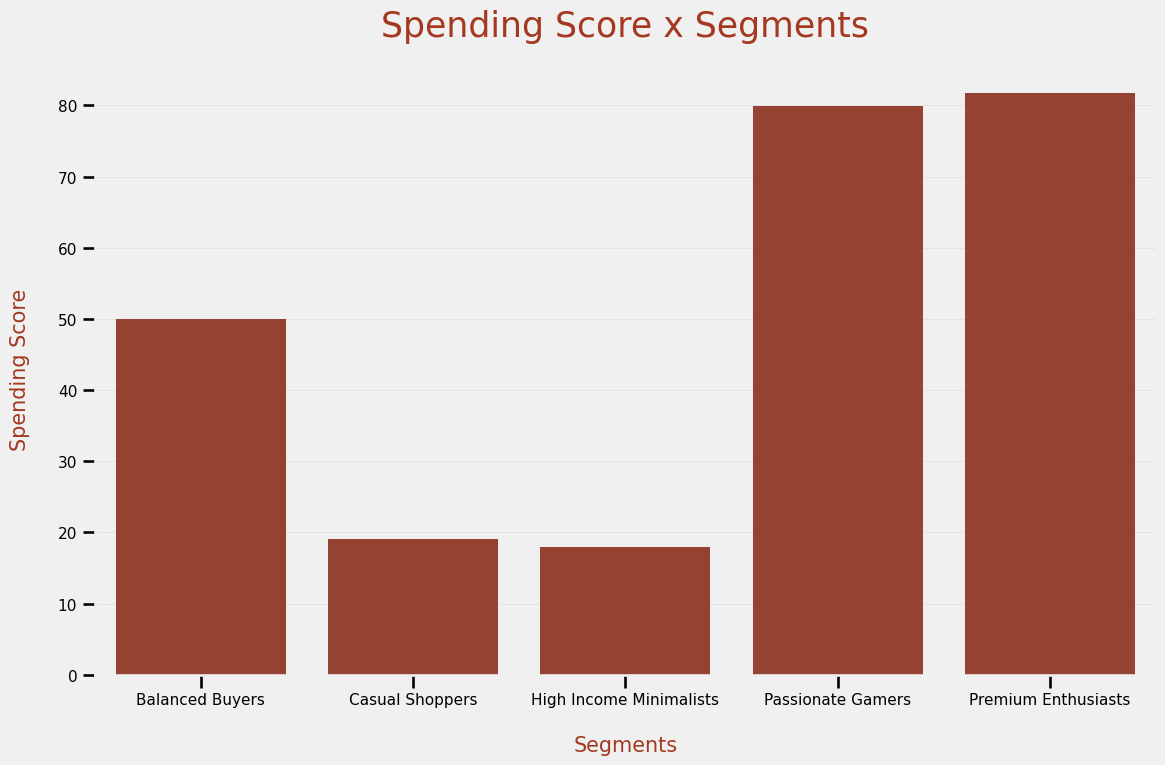

In [123]:
# Visualize in a bar chart.
barplot('segment_names', 'spending_score', segments_numeric,
        title = 'Spending Score x Segments',
        xlabel = 'Segments',
        ylabel = 'Spending Score')

<span style="color: #808080; font-style: italic;">Loyalty Points</span>

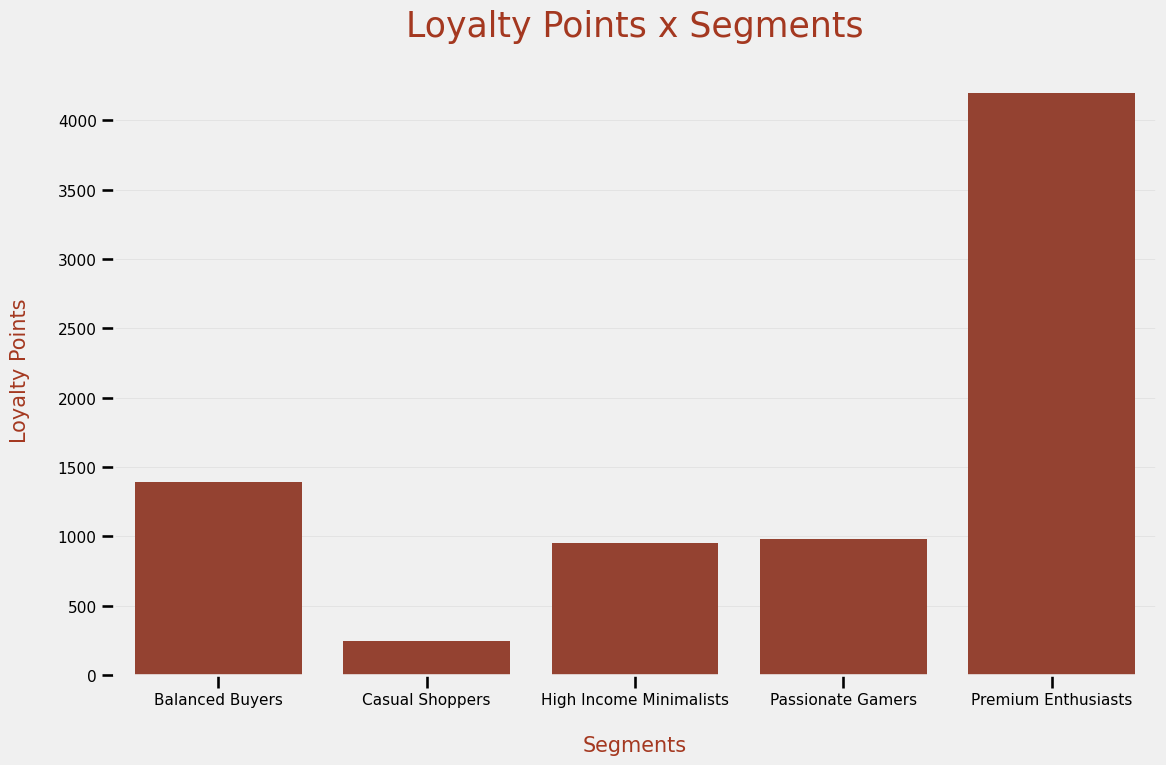

In [124]:
# Visualize in a bar chart.
barplot('segment_names', 'loyalty_points', segments_numeric,
        title = 'Loyalty Points x Segments',
        xlabel = 'Segments',
        ylabel = 'Loyalty Points')

Premium Enthusiasts are the ones that have more Loyalty Points as a combination of high Remuneration with a high Spending Score. Balance Buyers come after showing that a medium combination with those two factors is better than a high in one and a low in the other.

<span style="color: #808080; font-style: italic;">Remuneration x Loyalty Points</span>

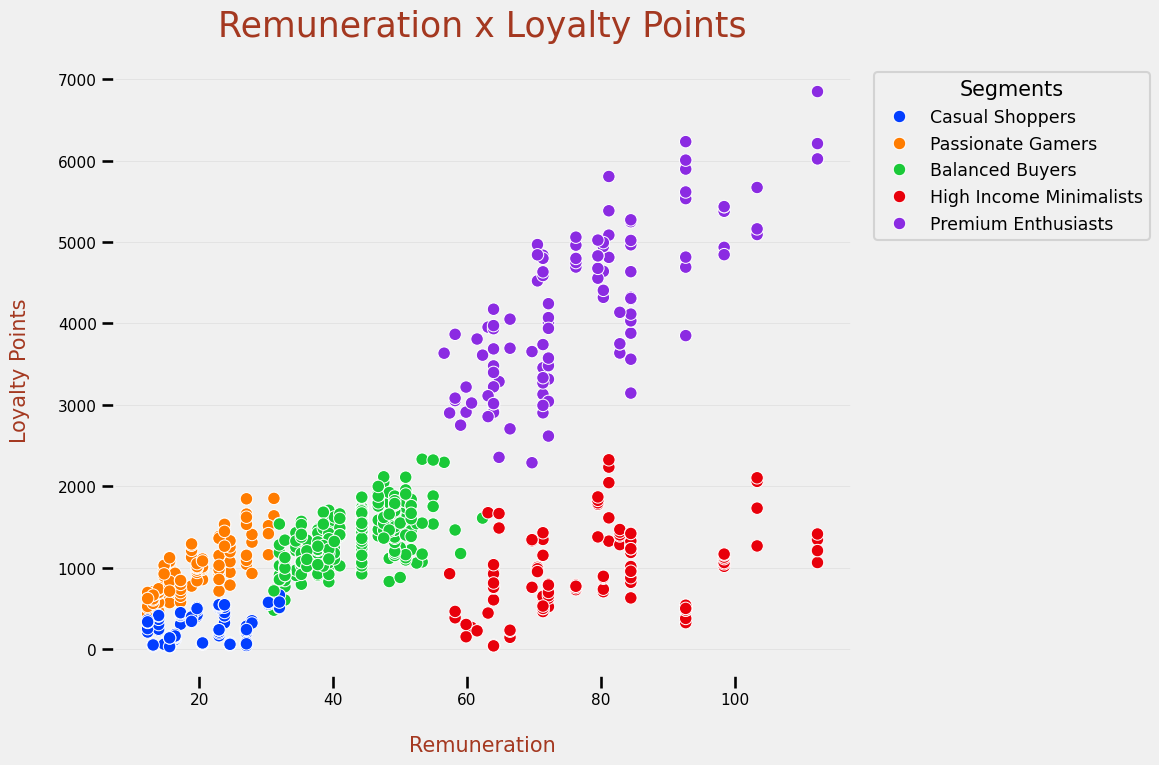

In [125]:
# Visualize in a scatterplot.
scatterplot_for_clustering('remuneration', 'loyalty_points', clients_segments, 'segment_names',
                            title = 'Remuneration x Loyalty Points',
                            xlabel = 'Remuneration',
                            ylabel = 'Loyalty Points',
                            titlelegend = 'Segments')

<span style="color: #808080; font-style: italic;">Spending Score x Loyalty Points</span>

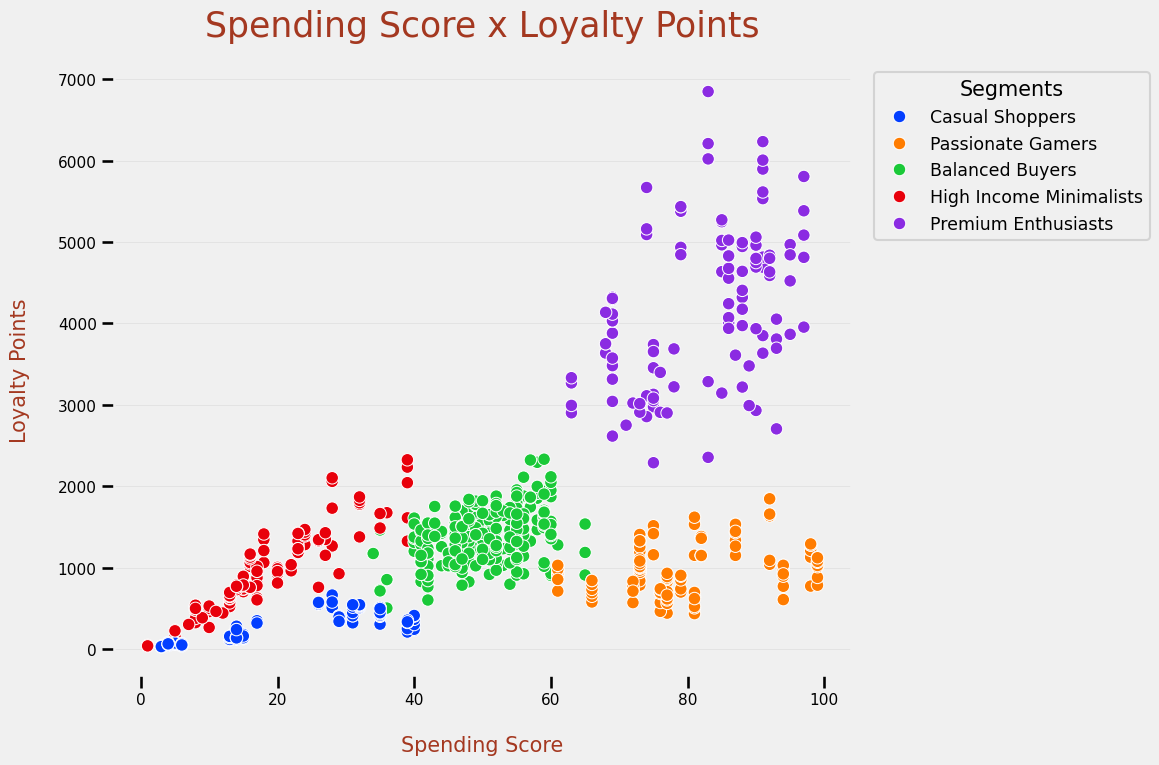

In [126]:
# Visualize in a scatterplot.
scatterplot_for_clustering('spending_score', 'loyalty_points', clients_segments, 'segment_names',
                            title = 'Spending Score x Loyalty Points',
                            xlabel = 'Spending Score',
                            ylabel = 'Loyalty Points',
                            titlelegend = 'Segments')

<span style="color: #808080; font-style: italic;">Gender</span>

In [127]:
# Group by Gender.
segments_gender = clients_segments.groupby('segment_names')['gender'].value_counts().reset_index()

# Pivot DataFrame.
segments_gender_pivot = segments_gender.pivot(index = 'segment_names', columns = 'gender', values = 'count').reset_index()

# Calculate Shares.
segments_gender_pivot[['Female', 'Male']] = segments_gender_pivot[['Female', 'Male']].apply(lambda x: round((x/x.sum()*100), 2), axis = 1)

# Visualize DataFrame.
segments_gender_pivot

gender            segment_names  Female   Male
0               Balanced Buyers   54.96  45.04
1               Casual Shoppers   62.12  37.88
2       High Income Minimalists   50.83  49.17
3             Passionate Gamers   53.54  46.46
4           Premium Enthusiasts   57.02  42.98

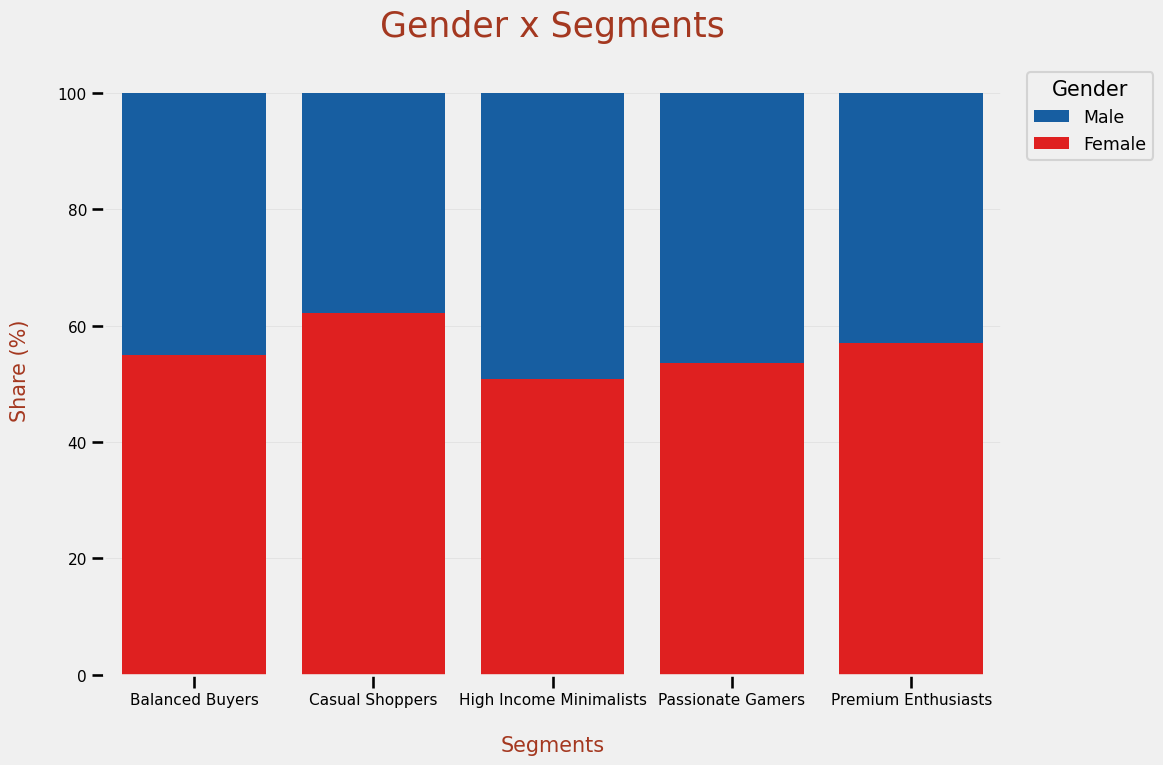

In [128]:
# Visualize in a stacked bar chart.
plt.figure(figsize = (12,8))
sns.barplot(x = 'segment_names', y = 'Male',
            data = segments_gender_pivot, color = '#005EB8', label = 'Male', bottom = segments_gender_pivot['Female'])
sns.barplot(x = 'segment_names', y = 'Female', data = segments_gender_pivot, color = 'red', label = 'Female')
plt.title('Gender x Segments', color = '#a43820', size = 25, pad = 20)
plt.xlabel('Segments', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis='y', alpha = 0.5, linewidth=0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.legend(title = 'Gender', fontsize = 'x-small', title_fontsize = 'small', loc = 'best', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

The gender split in high-income minimalists is more equal. Casual Shoppers have a higher disparity.

Clusters are defined, and clients are divided into different segments with different characteristics. These segments are explored, and actions within each segment will be explored in the presentation to the stakeholders.

<div style="color:#a43820; font-weight:bold;">
    
## Sentimental Analysis
    
</div>

In [129]:
# Create a copy of the dataframe. I will keep all the columns so I can check the data.
df4 = reviews_id.copy()

# Visualize.
df4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product                                             review  \
0     453  When it comes to a DM's screen, the space on t...   
1     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     254  Nice art, nice printing.  Why two panels are f...   
3     263  Amazing buy! Bought it as a gift for our new d...   
4     291  As my review of GF9's previous screens these w...   

                                             summary  client_id  
0  The fact that 50% of this space is wasted on a...         13  
1  Another worthless Dungeon Master's screen from...         69  
2                    pretty, but also pretty useless         50  
3                                         Five Stars        101  
4                                         Money trap        246

In [130]:
# Check for missing values.
df4[['review', 'summary']].isna().sum()

review     0
summary    0
dtype: int64

In [131]:
# Check for duplicates in both columns.
df4[['review', 'summary']].duplicated().sum()

18

In [132]:
# Visualize the duplicates in the table.

# Identify duplicates in both 'review' and 'summary' columns
duplicates = df4[df4[['review', 'summary']].duplicated(keep=False)].sort_values(by = 'client_id')

# Filter relevant columns.
duplicates_filtered = duplicates[['product', 'client_id', 'review', 'summary']]

# Display the duplicated rows.
duplicates_filtered

product  client_id                            review     summary
1713    7533         15                       Love these!  Five Stars
1435    4459         83                       As expected  Five Stars
1144    4712        148                              nice  Five Stars
1544    3267        149                            Great!  Five Stars
48      2079        172                           love it  Five Stars
1155    3153        189            On-time and nice item.  Five Stars
1037    2130        213                           Awesome  Five Stars
1145    6271        226                              nice  Five Stars
959    11086        227                           Love it  Five Stars
371     5726        231                            Great!  Five Stars
933     4477        268                           Awesome  Five Stars
294     6770        294                              Good  Five Stars
94      6721        294                             great  Five Stars
1651    4452        320                       As expected  Five Stars
1006    1183        350                        great game  Five Stars
811     1183        352                        great game  Five Stars
416      830        355                           love it  Five Stars
1553    6431        443                       As expected  Five Stars
1414     811        481  Great expansion to a great game.  Five Stars
326     2849        496                           love it  Five Stars
1382    1031        532                           Love it  Five Stars
55      3896        539                            Great!  Five Stars
1154   11086        549            On-time and nice item.  Five Stars
1186    3711        661                              Good  Five Stars
1540   11084        679                           love it  Five Stars
430     2173        706                           Love it  Five Stars
408     1459        724                             great  Five Stars
810     1175        743                        great game  Five Stars
702     6424        753                       Love these!  Five Stars
1302    5453        753  Great expansion to a great game.  Five Stars

All the comments come from different clients or the same client with a different product. In that case, we are going to keep the duplicates.

In [133]:
# Preprocessing function.
def preprocess_text(text):
    text = contractions.fix(text)             # Expand contractions i.e I'm not good goes to I am not good
    text = re.sub(r'http\S+', '', text)       # Remove URLs
    text = re.sub('#', '', text)              # Remove hashtags
    text = re.sub(r'\W', ' ', text)           # Remove special characters
    text = text.lower()                       # Convert to lowercase
    stop_words = set(stopwords.words('english')) - {'not'} 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function.
df4['cleaned_review'] = df4['review'].apply(preprocess_text)
df4['cleaned_summary'] = df4['summary'].apply(preprocess_text)

# Visualize.
df4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product                                             review  \
0     453  When it comes to a DM's screen, the space on t...   
1     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     254  Nice art, nice printing.  Why two panels are f...   
3     263  Amazing buy! Bought it as a gift for our new d...   
4     291  As my review of GF9's previous screens these w...   

                                             summary  client_id  \
0  The fact that 50% of this space is wasted on a...         13   
1  Another worthless Dungeon Master's screen from...         69   
2                    pretty, but also pretty useless         50   
3                                         Five Stars        101   
4                                         Money trap        246   

                                      cleaned_review  \
0  comes dm screen space screen absolute premium ...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9 previous screens completely unneces...   

                                     cleaned_summary  
0  fact 50 space wasted art not terribly informat...  
1  another worthless dungeon master screen galefo...  
2                         pretty also pretty useless  
3                                         five stars  
4                                         money trap

In [134]:
# Tokenize the text.
df4['tokenized_review'] = df4['cleaned_review'].apply(word_tokenize)
df4['tokenized_summary'] = df4['cleaned_summary'].apply(word_tokenize)

# Visualize.
df4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product                                             review  \
0     453  When it comes to a DM's screen, the space on t...   
1     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     254  Nice art, nice printing.  Why two panels are f...   
3     263  Amazing buy! Bought it as a gift for our new d...   
4     291  As my review of GF9's previous screens these w...   

                                             summary  client_id  \
0  The fact that 50% of this space is wasted on a...         13   
1  Another worthless Dungeon Master's screen from...         69   
2                    pretty, but also pretty useless         50   
3                                         Five Stars        101   
4                                         Money trap        246   

                                      cleaned_review  \
0  comes dm screen space screen absolute premium ...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9 previous screens completely unneces...   

                                     cleaned_summary  \
0  fact 50 space wasted art not terribly informat...   
1  another worthless dungeon master screen galefo...   
2                         pretty also pretty useless   
3                                         five stars   
4                                         money trap   

                                    tokenized_review  \
0  [comes, dm, screen, space, screen, absolute, p...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3     [amazing, buy, bought, gift, new, dm, perfect]   
4  [review, gf9, previous, screens, completely, u...   

                                   tokenized_summary  
0  [fact, 50, space, wasted, art, not, terribly, ...  
1  [another, worthless, dungeon, master, screen, ...  
2                    [pretty, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

**Frequency distribution and most common words for review**

In [135]:
# Flatten the lists of tokens into a single list of tokens
all_tokens_review = [token for sublist in df4['tokenized_review'] for token in sublist]

# View the frequency distribution.
fdist_review = FreqDist(all_tokens_review)

# Preview the Data.
fdist_review

FreqDist({'game': 1713, 'not': 1116, 'great': 598, 'fun': 558, 'one': 540, 'play': 509, 'like': 421, 'would': 357, 'love': 332, 'get': 320, ...})

In [136]:
# Get the 15 most common tokens
most_common_tokens = fdist_review.most_common(15)

# Convert to DataFrame.
df_common_words_review = pd.DataFrame(most_common_tokens, columns=['Word', 'Frequency'])

# Visualize the 15 most common words.
df_common_words_review

Word  Frequency
0     game       1713
1      not       1116
2    great        598
3      fun        558
4      one        540
5     play        509
6     like        421
7    would        357
8     love        332
9      get        320
10  really        319
11   cards        306
12    time        298
13   tiles        298
14    good        296

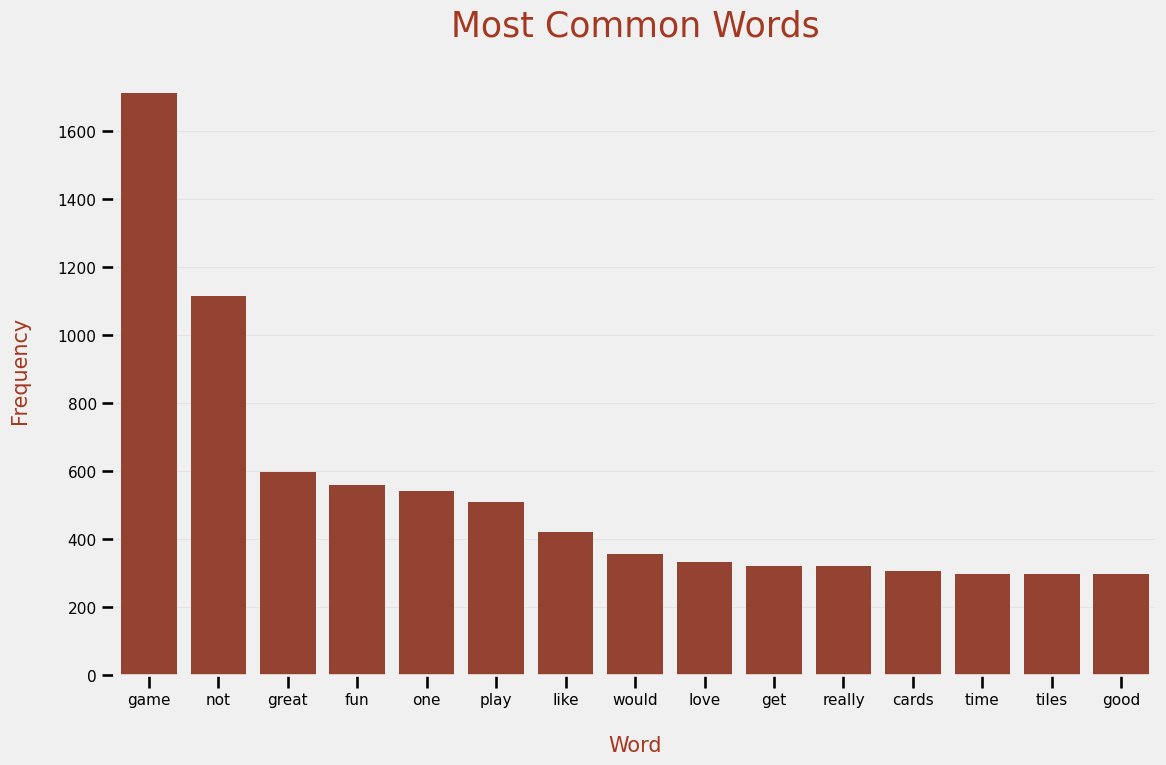

In [137]:
# Visualize in a graph.
barplot('Word', 'Frequency', df_common_words_review,
        title = 'Most Common Words',
        xlabel = 'Word',
        ylabel = 'Frequency')

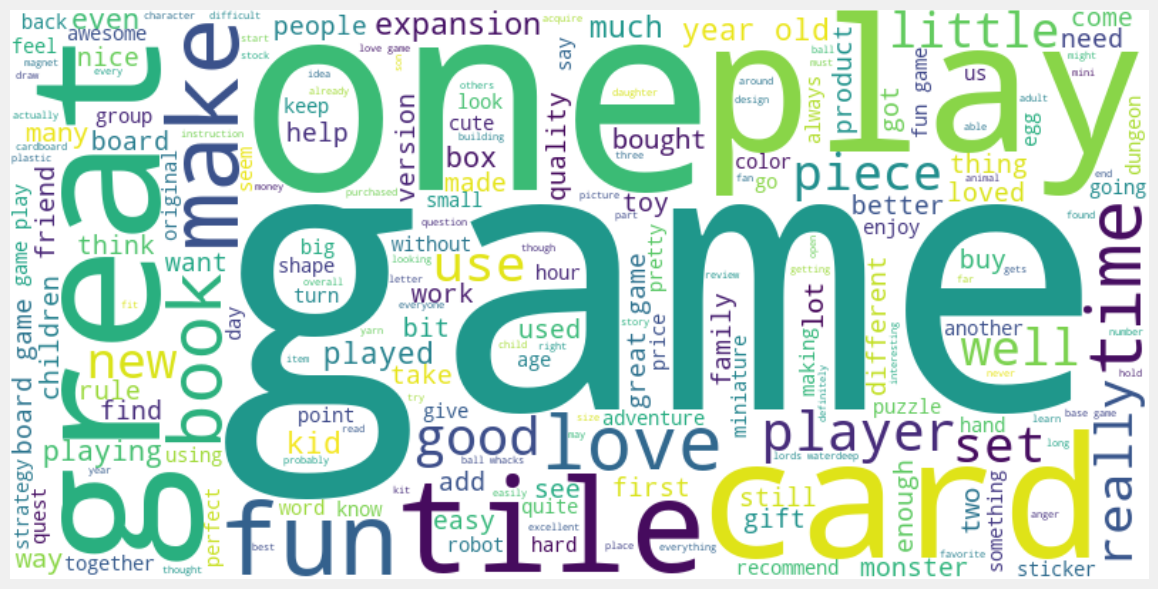

In [138]:
# Combine all tokenized reviews into a single string
all_review = ''
for i in range(df4.shape[0]):
    all_review += ' '.join(df4['tokenized_review'][i]) + ' '

# Create and configure the word cloud object
word_cloud_review = WordCloud(width=800, height=400, background_color = 'white').generate(all_review)

# Display the word cloud using matplotlib
plt.figure(figsize = (12, 8))
plt.imshow(word_cloud_review, interpolation = 'bilinear')
plt.tight_layout(pad = 0) 
plt.axis('off')
plt.show()

**Frequency distribution and most common words for summary**

In [139]:
# Flatten the lists of tokens into a single list of tokens.
all_tokens_summary = [token for sublist in df4['tokenized_summary'] for token in sublist]

# View the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview the Data.
fdist_review

FreqDist({'game': 1713, 'not': 1116, 'great': 598, 'fun': 558, 'one': 540, 'play': 509, 'like': 421, 'would': 357, 'love': 332, 'get': 320, ...})

In [140]:
# Get the 15 most common tokens
most_common_tokens = fdist_summary.most_common(15)

# Convert to DataFrame.
df_common_words_summary = pd.DataFrame(most_common_tokens, columns = ['Word', 'Frequency'])

# Visualize the 15 most common words.
df_common_words_summary

Word  Frequency
0       stars        466
1        five        381
2        game        319
3       great        296
4         fun        218
5         not         98
6        love         93
7        good         93
8        four         58
9        like         54
10  expansion         53
11       kids         51
12       cute         45
13       book         43
14        one         39

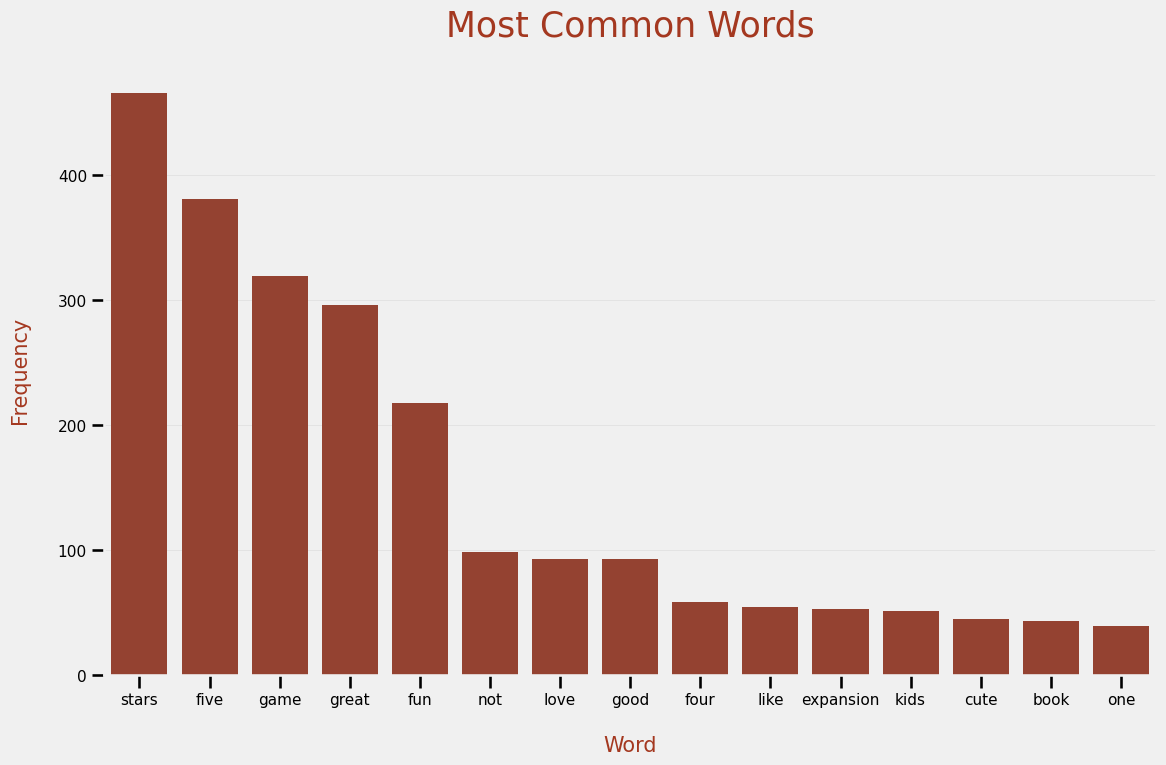

In [141]:
# Visualize in a graph plot.
barplot('Word', 'Frequency', df_common_words_summary,
        title = 'Most Common Words',
        xlabel = 'Word',
        ylabel = 'Frequency')

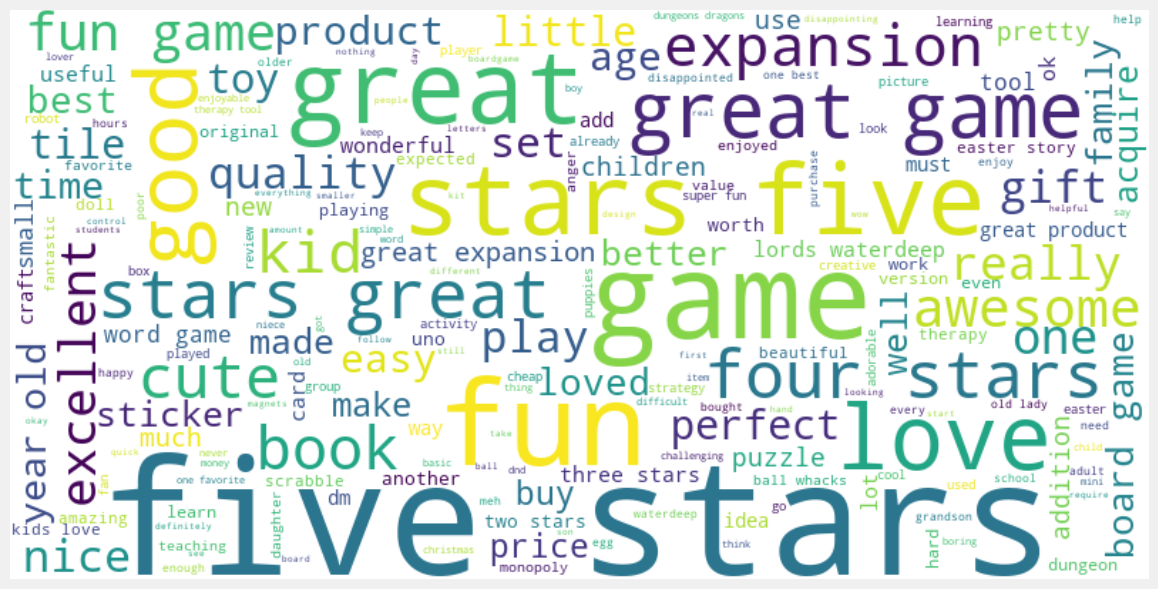

In [142]:
# Combine all tokenized reviews into a single string.
all_summary = ''
for i in range(df4.shape[0]):
    all_summary += ' '.join(df4['tokenized_summary'][i]) + ' '

# Create and configure the word cloud object.
word_cloud_summary = WordCloud(width=800, height=400, background_color = 'white').generate(all_summary)

# Display the word cloud using matplotlib.
plt.figure(figsize = (12, 8))
plt.imshow(word_cloud_summary, interpolation = 'bilinear')
plt.tight_layout(pad = 0) 
plt.axis('off')
plt.show()

**Lematizing**

In [143]:
# Define the tag map for POS tagging.
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Lemmatize the tokens with the correct POS tags.
lemma_function = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    # For each word in the token list, it lemmatizes the word with the correct part-of-speech.
    lemmatized_tokens = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]
    return lemmatized_tokens

df4['lemmatized_review'] = df4['tokenized_review'].apply(lemmatize_tokens)
df4['lemmatized_summary'] = df4['tokenized_summary'].apply(lemmatize_tokens)

# Visualize.
df4.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product                                             review  \
0     453  When it comes to a DM's screen, the space on t...   
1     466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     254  Nice art, nice printing.  Why two panels are f...   
3     263  Amazing buy! Bought it as a gift for our new d...   
4     291  As my review of GF9's previous screens these w...   

                                             summary  client_id  \
0  The fact that 50% of this space is wasted on a...         13   
1  Another worthless Dungeon Master's screen from...         69   
2                    pretty, but also pretty useless         50   
3                                         Five Stars        101   
4                                         Money trap        246   

                                      cleaned_review  \
0  comes dm screen space screen absolute premium ...   
1  open letter galeforce9 unpainted miniatures no...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf9 previous screens completely unneces...   

                                     cleaned_summary  \
0  fact 50 space wasted art not terribly informat...   
1  another worthless dungeon master screen galefo...   
2                         pretty also pretty useless   
3                                         five stars   
4                                         money trap   

                                    tokenized_review  \
0  [comes, dm, screen, space, screen, absolute, p...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panels, fille...   
3     [amazing, buy, bought, gift, new, dm, perfect]   
4  [review, gf9, previous, screens, completely, u...   

                                   tokenized_summary  \
0  [fact, 50, space, wasted, art, not, terribly, ...   
1  [another, worthless, dungeon, master, screen, ...   
2                    [pretty, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                   lemmatized_review  \
0  [come, dm, screen, space, screen, absolute, pr...   
1  [open, letter, galeforce9, unpainted, miniatur...   
2  [nice, art, nice, printing, two, panel, fill, ...   
3          [amaze, buy, buy, gift, new, dm, perfect]   
4  [review, gf9, previous, screen, completely, un...   

                                  lemmatized_summary  
0  [fact, 50, space, waste, art, not, terribly, i...  
1  [another, worthless, dungeon, master, screen, ...  
2                    [pretty, also, pretty, useless]  
3                                       [five, star]  
4                                      [money, trap]

**TextBlob Analysis**

<span style="color: #808080; font-style: italic;">Polarity for Review</span>

In [144]:
def generate_polarity(tokens):
    '''Extract polarity score (-1 to +1) for each comment'''
    # Join tokens into a single string.
    comment = ' '.join(tokens)
    return TextBlob(comment).sentiment.polarity

# Create a new column with polarity for review.
df4['polarity_review'] = df4['lemmatized_review'].apply(generate_polarity)

# Preview the result.
df4['polarity_review'].head()                                                       

0   -0.028571
1    0.015952
2    0.117369
3    0.568182
4   -0.316667
Name: polarity_review, dtype: float64

In [145]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(tokens):
    comment = ' '.join(tokens)
    return TextBlob(comment).sentiment[1]

# Create a new column with polarity for review.
df4['subjectivity_review'] = df4['lemmatized_review'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity_review'].head() 

0    0.428571
1    0.434226
2    0.428197
3    0.727273
4    0.316667
Name: subjectivity_review, dtype: float64

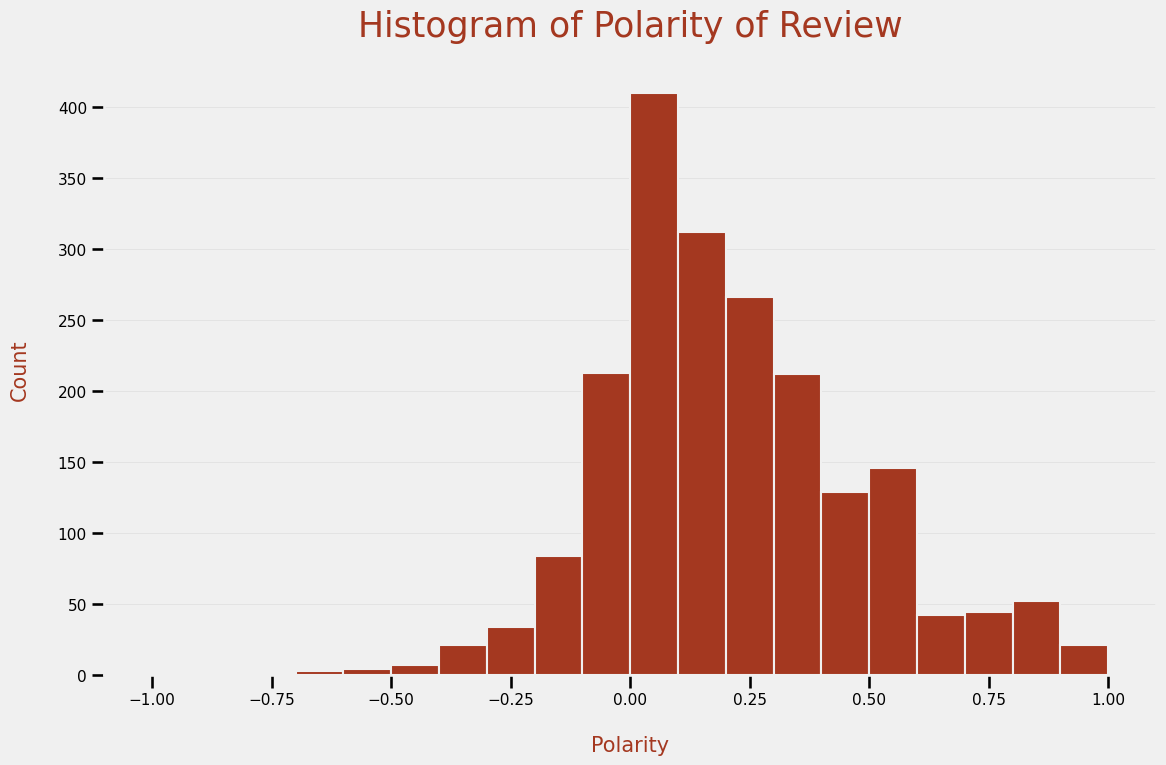

In [146]:
# Define bins.
bins_negative_to_positive = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0,
                             0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Plot the graph of Polarity of Reviews.
histogram('polarity_review', df4, bins_negative_to_positive,
          title = 'Histogram of Polarity of Review',
          xlabel = 'Polarity',
          ylabel = 'Count')

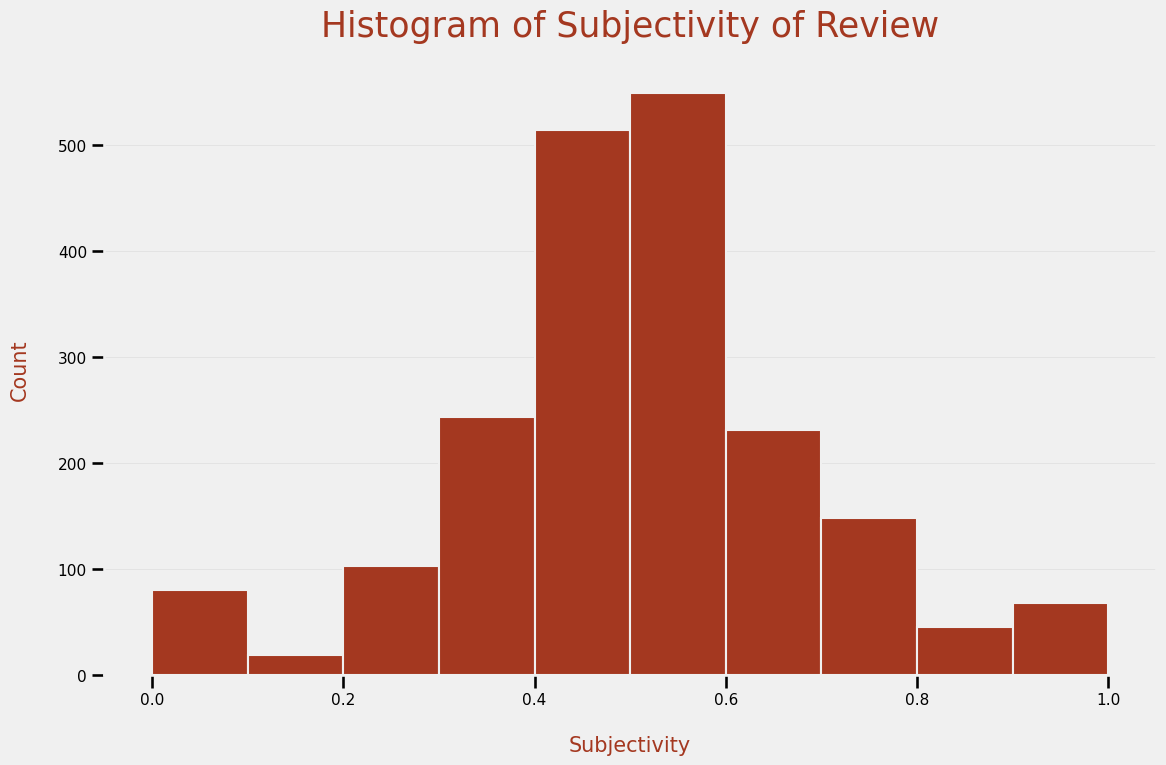

In [147]:
# Plot the graph of Subjectivity of Reviews.
histogram('subjectivity_review', df4, 10,
          title = 'Histogram of Subjectivity of Review',
          xlabel = 'Subjectivity',
          ylabel = 'Count')

In [148]:
# Create a positive, negative and neutral rating for Review.

# Determine overall sentiment
def get_sentiment_label(value):
    if value >= 0.05:
        return 'positive'
    elif value <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply function.
df4['review_classification_textblob'] = df4['polarity_review'].apply(get_sentiment_label)

<span style="color: #808080; font-style: italic;">Polarity for Summary</span>

In [149]:
def generate_polarity(tokens):
    '''Extract polarity score (-1 to +1) for each comment'''
    # Join tokens into a single string
    comment = ' '.join(tokens)
    return TextBlob(comment).sentiment.polarity

# Create a new column with polarity for review.
df4['polarity_summary'] = df4['lemmatized_summary'].apply(generate_polarity)

# Preview the result.
df4['polarity_summary'].head()  

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [150]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(tokens):
    comment = ' '.join(tokens)
    return TextBlob(comment).sentiment[1]

# Create a new column with polarity for review.
df4['subjectivity_summary'] = df4['lemmatized_summary'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity_summary'].head()  

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

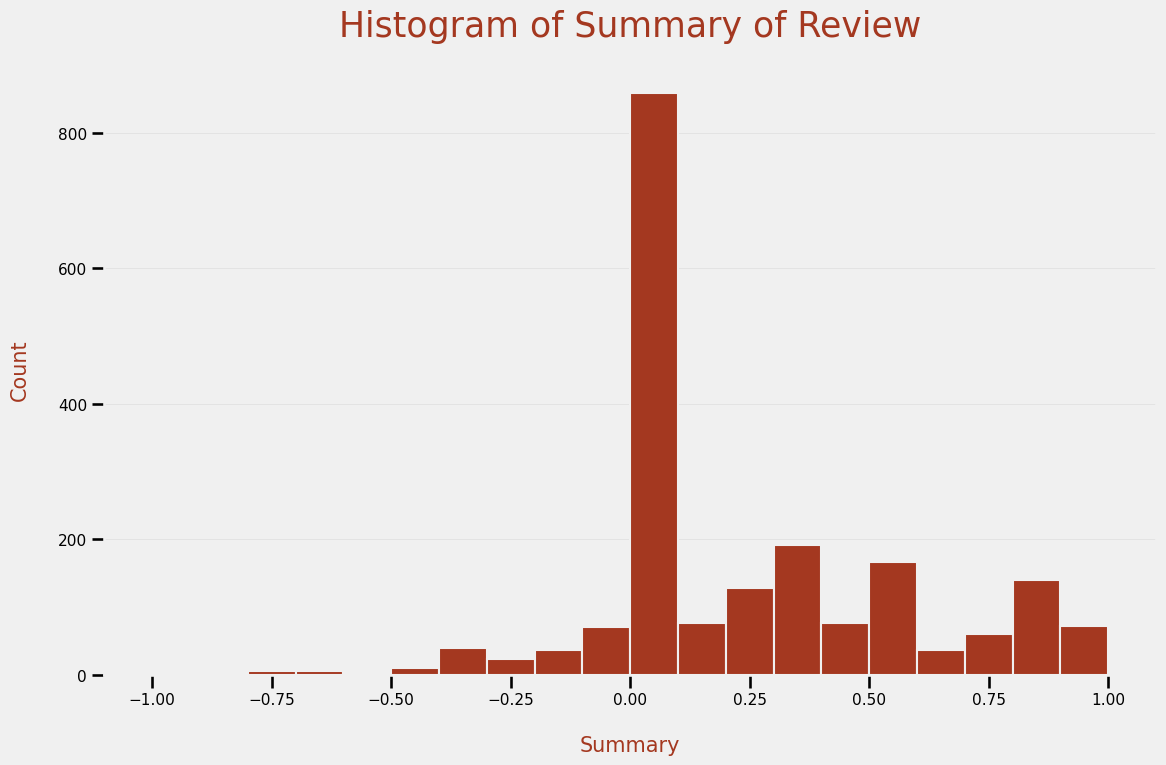

In [151]:
# Plot the graph of Polarity of Reviews.
histogram('polarity_summary', df4, bins_negative_to_positive,
          title = 'Histogram of Summary of Review',
          xlabel = 'Summary',
          ylabel = 'Count')

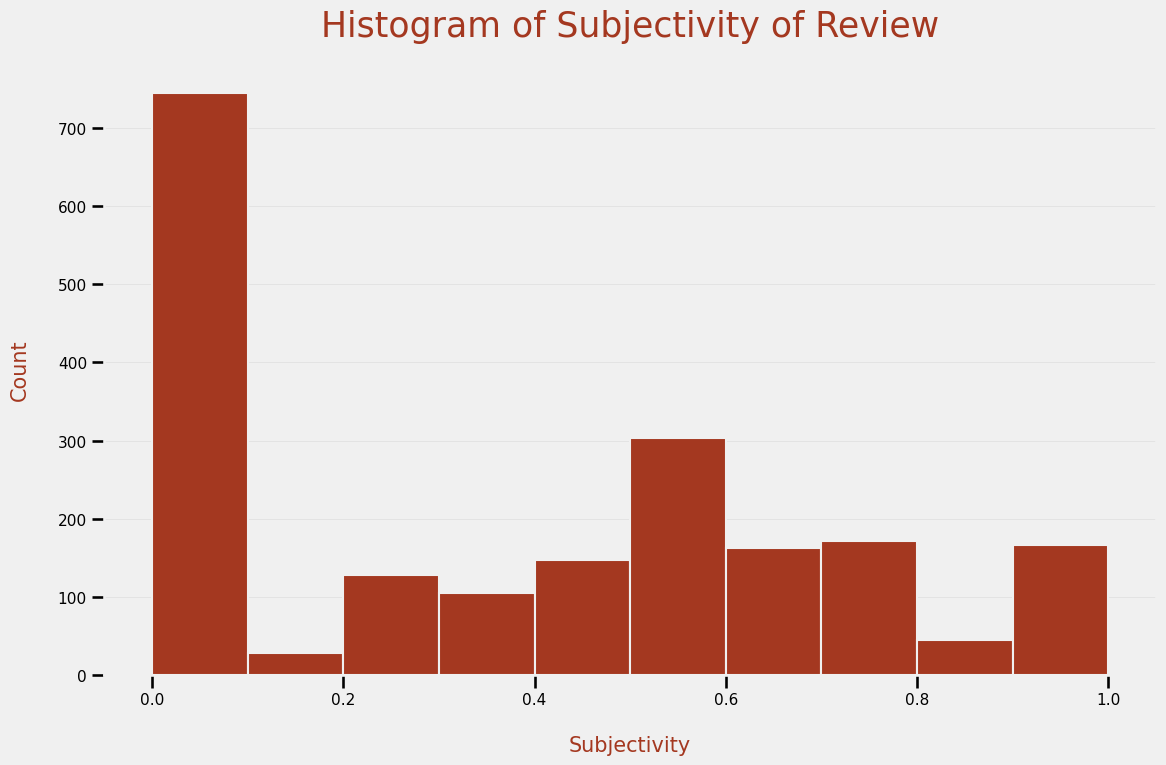

In [152]:
# Plot the graph of Subjectivity of Reviews.
histogram('subjectivity_summary', df4, 10,
          title = 'Histogram of Subjectivity of Review',
          xlabel = 'Subjectivity',
          ylabel = 'Count')

In [153]:
# Create a positive, negative and neutral rating for Summary.
df4['summary_classification_textblob'] = df4['polarity_summary'].apply(get_sentiment_label)

**Vader Analysis**

<span style="color: #808080; font-style: italic;">Sentiment Score for Review</span>

In [154]:
# Call the function.
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate polarity scores.
def analyze_sentiment(text):
    return analyzer.polarity_scores(' '.join(text))

# Apply function to calculate polarity scores.
df4['sentiment_scores_review'] = df4['lemmatized_review'].apply(analyze_sentiment)

In [155]:
# Extract individual sentiment scores.
df4['neg_review'] = df4['sentiment_scores_review'].apply(lambda x: x['neg'])
df4['neu_review'] = df4['sentiment_scores_review'].apply(lambda x: x['neu'])
df4['pos_review'] = df4['sentiment_scores_review'].apply(lambda x: x['pos'])
df4['compound_review'] = df4['sentiment_scores_review'].apply(lambda x: x['compound'])

# Create a positive, negative and neutral rating for Review.
df4['review_classification_vader'] = df4['compound_review'].apply(get_sentiment_label)

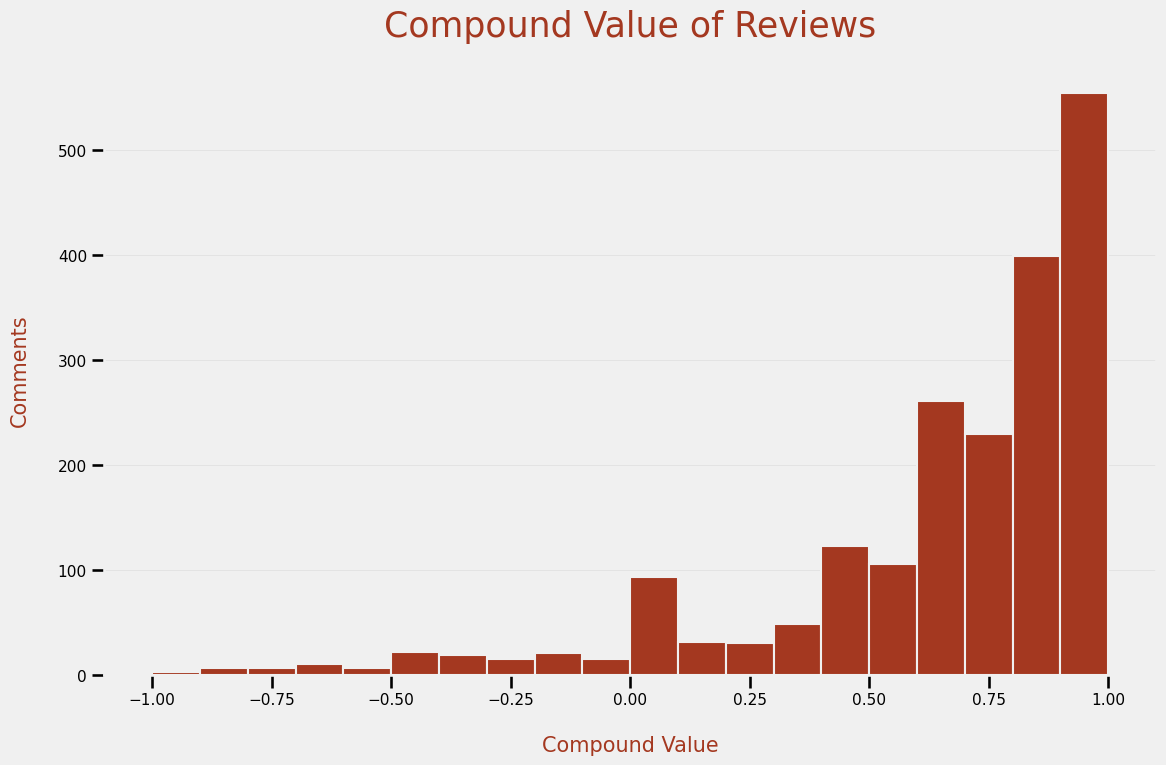

In [156]:
# Plot the graph of Compound of Reviews.
histogram('compound_review', df4, bins_negative_to_positive,
          title = 'Compound Value of Reviews',
          xlabel = 'Compound Value',
          ylabel = 'Comments')

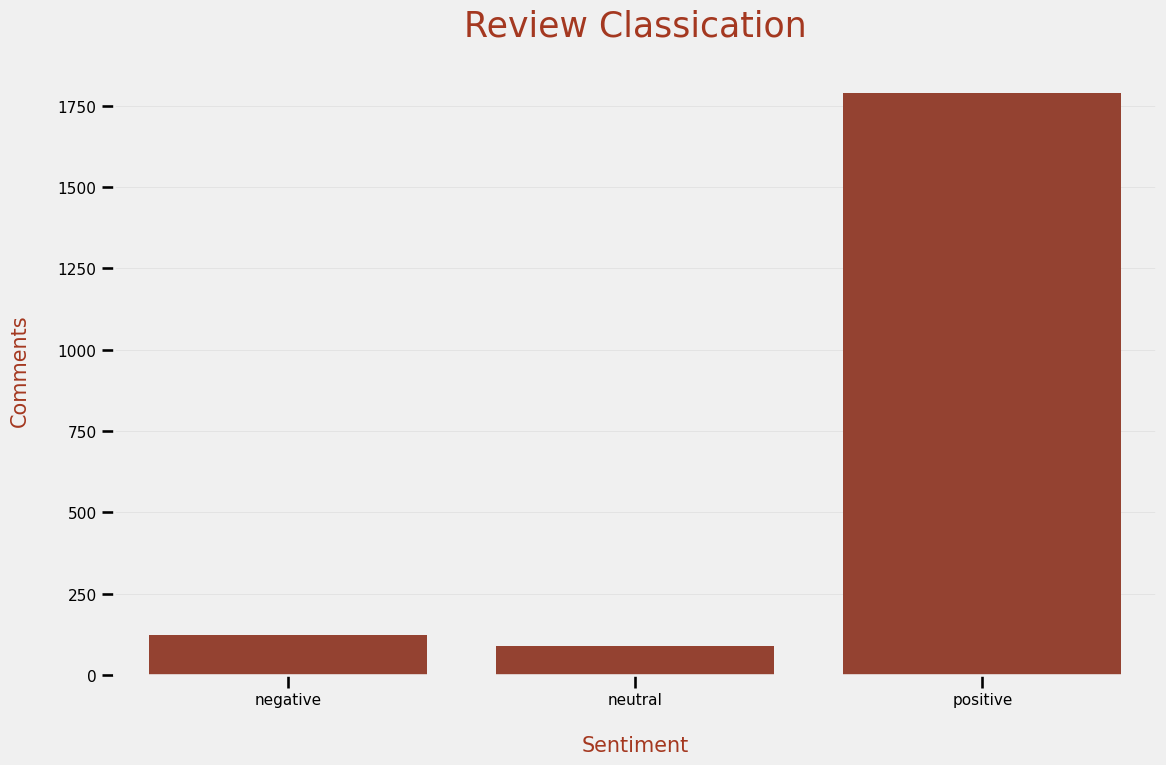

In [157]:
# Group By the classification.
review_classification = df4.groupby('review_classification_vader')['review_classification_vader'].value_counts().reset_index()

# Visualize classification in a plot.
barplot('review_classification_vader', 'count', review_classification,
        title = 'Review Classication',
        xlabel = 'Sentiment',
        ylabel = 'Comments')

<span style="color: #808080; font-style: italic;">Sentiment Score for Summary</span>

In [158]:
# Apply function to calculate polarity scores.
df4['sentiment_scores_summary'] = df4['lemmatized_summary'].apply(analyze_sentiment)

In [159]:
# Extract individual sentiment scores.
df4['neg_summary'] = df4['sentiment_scores_summary'].apply(lambda x: x['neg'])
df4['neu_summary'] = df4['sentiment_scores_summary'].apply(lambda x: x['neu'])
df4['pos_summary'] = df4['sentiment_scores_summary'].apply(lambda x: x['pos'])
df4['compound_summary'] = df4['sentiment_scores_summary'].apply(lambda x: x['compound'])

# Create a positive, negative and neutral rating for Review.
df4['summary_classification_vader'] = df4['compound_summary'].apply(get_sentiment_label)

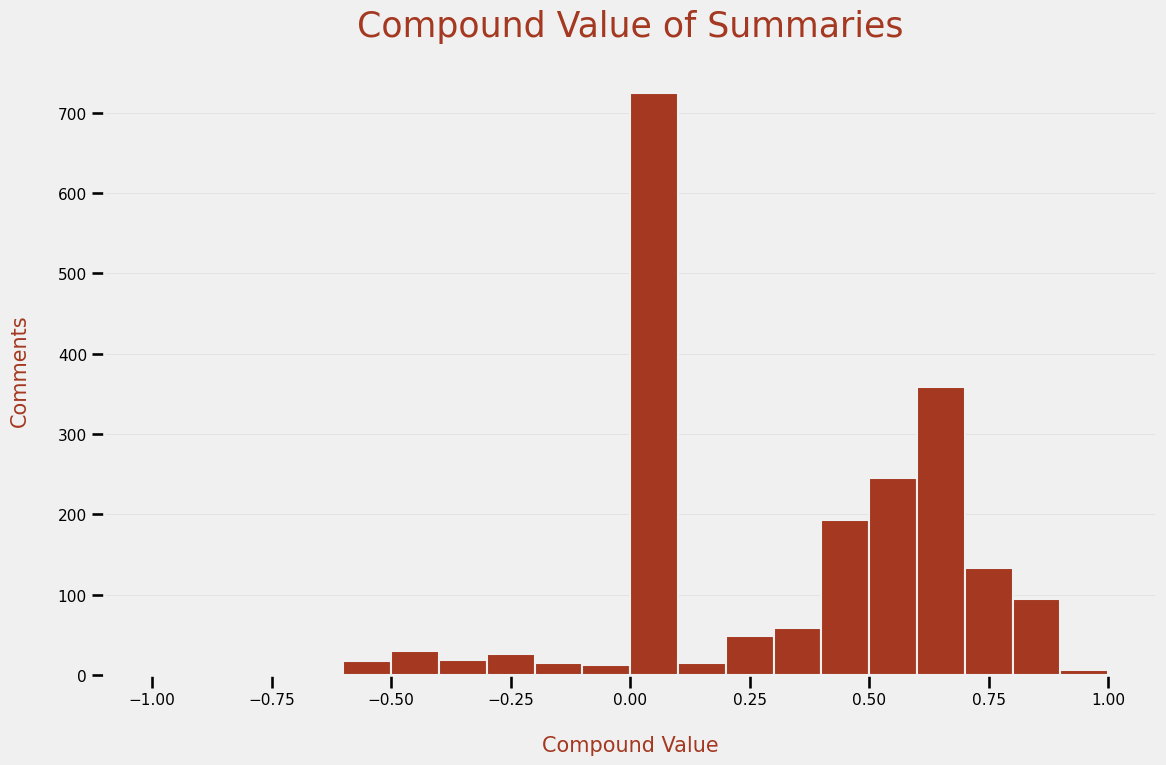

In [160]:
# Plot the graph of Compound of Summaries.
histogram('compound_summary', df4, bins_negative_to_positive,
          title = 'Compound Value of Summaries',
          xlabel = 'Compound Value',
          ylabel = 'Comments')

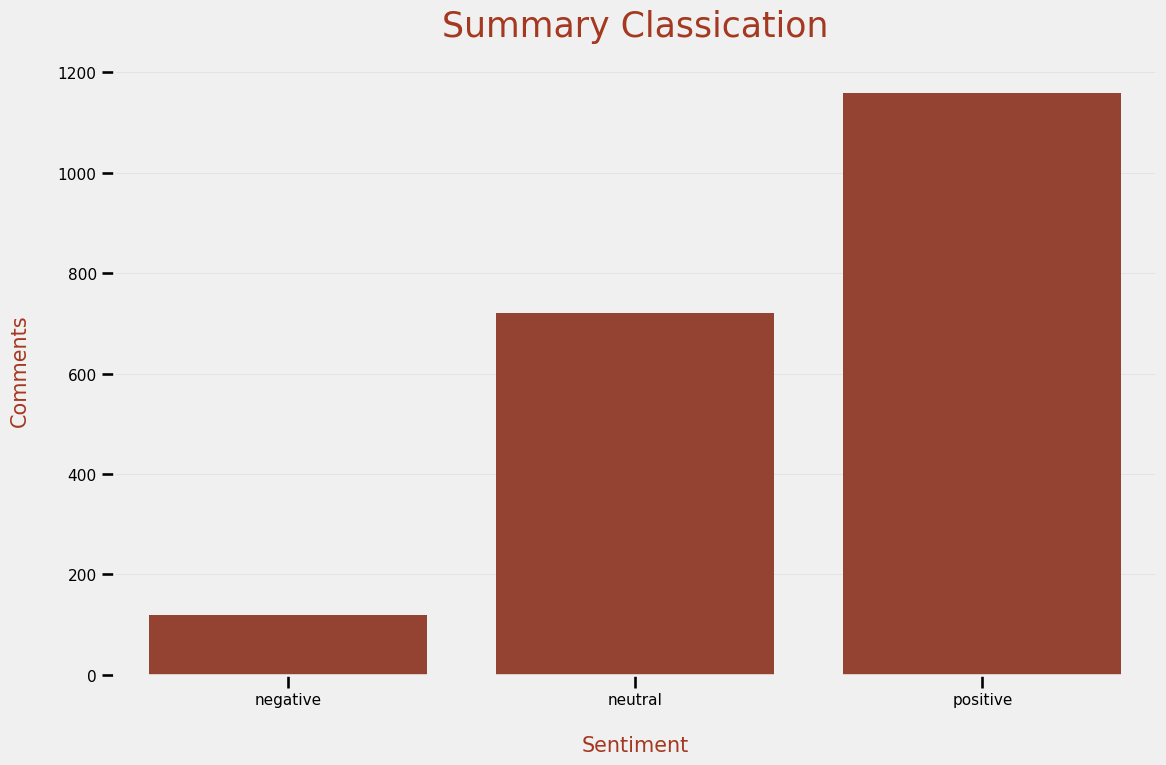

In [161]:
# Group By the classification.
summary_classification = df4.groupby('summary_classification_vader')['summary_classification_vader'].value_counts().reset_index()

# Visualize classification in a plot.
barplot('summary_classification_vader', 'count', summary_classification,
        title = 'Summary Classication',
        xlabel = 'Sentiment',
        ylabel = 'Comments')

**Model Comparision**

In [162]:
# Review the list of columns to select the ones relevant.
df4.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary', 'client_id',
       'cleaned_review', 'cleaned_summary', 'tokenized_review',
       'tokenized_summary', 'lemmatized_review', 'lemmatized_summary',
       'polarity_review', 'subjectivity_review',
       'review_classification_textblob', 'polarity_summary',
       'subjectivity_summary', 'summary_classification_textblob',
       'sentiment_scores_review', 'neg_review', 'neu_review', 'pos_review',
       'compound_review', 'review_classification_vader',
       'sentiment_scores_summary', 'neg_summary', 'neu_summary', 'pos_summary',
       'compound_summary', 'summary_classification_vader'],
      dtype='object')

In [163]:
# Filter only the columns relevant to the model comparison analysis.
df4_comparison = df4[['review', 'summary', 'review_classification_textblob', 'summary_classification_textblob',
                      'review_classification_vader', 'summary_classification_vader']]

# Check DataFrame.
df4_comparison.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

  review_classification_textblob summary_classification_textblob  \
0                        neutral                        positive   
1                        neutral                        negative   
2                       positive                         neutral   
3                       positive                         neutral   
4                       negative                         neutral   

  review_classification_vader summary_classification_vader  
0                    negative                      neutral  
1                    positive                     negative  
2                    negative                     positive  
3                    positive                      neutral  
4                    negative                     negative

In [164]:
# Select a random sample of 30 rows from the DataFrame
random_sample = df4_comparison.sample(n=30, random_state=42)

# Export the sampled DataFrame to an Excel file
random_sample.to_excel('random_sample.xlsx', index = False)

# Visualize.
random_sample

review  \
1860  A fun game if you like Scrabble and other word...   
353   My almost 9 Year Old loves this pom-pom puppy ...   
1333  Makes an awesome game even better, and opens u...   
905   This game was a little fun...not super fantast...   
1289  Or you might REALLY LOVE IT...\nSome of my fri...   
1273  If you want something other than a large battl...   
938   My husband bought this so we as a family could...   
1731  Bought this for my daughter she said its lots ...   
65                                           Very Cute!   
1323  If you love Lords of Waterdeep, you will proba...   
56    Sometimes you need something new and special t...   
1292  My wife and I LOVE this game.  While she was r...   
1118  I've only played full D&D adventures a few tim...   
584   We purchased the Star From Afar few years ago,...   
374   As a therapist who plays a lot of UNO with chi...   
275                     Recipient 11 yrs. old loves it!   
746   This is 54 cards; 6 shapes by 9 different colo...   
128   love this little book for an extra little fun ...   
1646  On David Rothmans 12th birthday he was a virtu...   
1852                                          good size   
674   Even though my grandson is not ready to learn ...   
1664  The Ball is an ingenious celebration of natura...   
1981  If you play this fascinating word game this di...   
1083  This is in my opinion the best dungeon crawler...   
1922  Love this card game , it's like scrabble only ...   
99                               Inspiring creativity!!   
1179  Wish it had a few more sheets, it is good as a...   
964   Great game and you get so much for the price. ...   
792   We love this game! We play with our daughters ...   
29    This coloring book was so much fun to color.  ...   

                                                summary  \
1860  A fun game if you like Scrabble and other word...   
353                      My almost 9 Year Old Loves it!   
1333                                         Five Stars   
905                                       Mediocre Game   
1289            If you like RPG/D&D You might love this   
1273                         A good first start for DMs   
938                                    Great purchase!!   
1731                                  Overall great toy   
65                                           Very Cute!   
1323                 Everything an expansion should be!   
56                                  Great 30 minute toy   
1292                  Best game I've played in a while!   
1118                                           fun game   
584   The hardcover book is beautifully written in r...   
374      Good quality.  Use frequently in plat therapy.   
275                                          Five Stars   
746   Wasn't what I was hoping for, but turned out o...   
128                                     fun cheap silly   
1646  A survival guide for young people who are hear...   
1852                                         Five Stars   
674                       Put them right on the fridge!   
1664          THE BALL OF WHACKS IS TRULY INSPIRATIONAL   
1981                              Well done and useful.   
1083                               Best Dungeon Crawler   
1922                                         Five Stars   
99                                                 Fun!   
1179                        it is good as a stand alone   
964                                          Four Stars   
792                      Excellent, Quick Strategy Game   
29                       WOW, GREAT COLORING BOOK!!!!!!   

     review_classification_textblob summary_classification_textblob  \
1860                       positive                        negative   
353                        positive                        positive   
1333                       positive                         neutral   
905                        positive                        negative   
1289                        neutra

I will analyze each sentence in Excel and classify each as positive, neutral, or negative.

Ideally, we would classify each sentence to compare each model, but due to time constraints, a small sample of 30 was selected.

In [165]:
# Import the excel with manual comments.
df4_manual = pd.read_excel('random_sample_manual.xlsx')

# Visualize the DataFrame.
df4_manual.head()

review  \
0  A fun game if you like Scrabble and other word...   
1  My almost 9 Year Old loves this pom-pom puppy ...   
2  Makes an awesome game even better, and opens u...   
3  This game was a little fun...not super fantast...   
4  Or you might REALLY LOVE IT...\nSome of my fri...   

                                             summary  \
0  A fun game if you like Scrabble and other word...   
1                     My almost 9 Year Old Loves it!   
2                                         Five Stars   
3                                      Mediocre Game   
4            If you like RPG/D&D You might love this   

  review_classification_textblob summary_classification_textblob  \
0                       positive                        negative   
1                       positive                        positive   
2                       positive                         neutral   
3                       positive                        negative   
4                        neutral                        positive   

  review_classification_vader summary_classification_vader  \
0                    positive                     positive   
1                    positive                     positive   
2                    positive                      neutral   
3                    positive                      neutral   
4                    positive                     positive   

  review_manual_classification summary_manual_classification  
0                     positive                      positive  
1                     positive                      positive  
2                     positive                      positive  
3                     positive                      negative  
4                     positive                      positive

In [166]:
# Create a function to return the % of success.

def calculate_matching_percentage(df, manual, model):
    '''Calculate a percentage of the rows that are equal in the two specified columns'''
    # Compare the two columns.
    matching_rows = df[manual] == df[model]

    # Calculate the percentage.
    success_percentage = matching_rows.mean() * 100
    return success_percentage

# Calculate the values.
reviews_textblob_share = calculate_matching_percentage(df4_manual, 'review_classification_textblob', 'review_manual_classification')
reviews_vader_share = calculate_matching_percentage(df4_manual, 'review_classification_vader', 'review_manual_classification')
summary_textblob_share = calculate_matching_percentage(df4_manual, 'summary_classification_textblob', 'summary_manual_classification')
summary_vader_share = calculate_matching_percentage(df4_manual, 'summary_classification_vader', 'summary_manual_classification')

# Calculate the percentages.
print("% of matching - Reviews / TextBlob - ", reviews_textblob_share , "%")
print("% of matching - Reviews / Vader - ", reviews_vader_share, "%")
print("% of matching - Summary / TextBlob - ", summary_textblob_share , "%")
print("% of matching - Summary / Vader - ", summary_vader_share, "%")

% of matching - Reviews / TextBlob -  60.0 %
% of matching - Reviews / Vader -  90.0 %
% of matching - Summary / TextBlob -  70.0 %
% of matching - Summary / Vader -  70.0 %


Vader has a matching % higher than TextBlob so it will be the model selected to go ahead with the analysis.

**Select the relevant columns to start analyzing**

In [167]:
# Review the list of columns to select the ones relevant.
df4.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary', 'client_id',
       'cleaned_review', 'cleaned_summary', 'tokenized_review',
       'tokenized_summary', 'lemmatized_review', 'lemmatized_summary',
       'polarity_review', 'subjectivity_review',
       'review_classification_textblob', 'polarity_summary',
       'subjectivity_summary', 'summary_classification_textblob',
       'sentiment_scores_review', 'neg_review', 'neu_review', 'pos_review',
       'compound_review', 'review_classification_vader',
       'sentiment_scores_summary', 'neg_summary', 'neu_summary', 'pos_summary',
       'compound_summary', 'summary_classification_vader'],
      dtype='object')

In [168]:
# Filter the DataFrame.
df4_analysis = df4[['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'client_id',
                    'compound_review', 'review_classification_vader', 'compound_summary', 'summary_classification_vader']]

# Visualize.
df4_analysis.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product  client_id  compound_review review_classification_vader  \
0     453         13          -0.7067                    negative   
1     466         69           0.8679                    positive   
2     254         50          -0.2310                    negative   
3     263        101           0.8779                    positive   
4     291        246          -0.7063                    negative   

   compound_summary summary_classification_vader  
0            0.0320                      neutral  
1           -0.4404                     negative  
2            0.5574                     positive  
3            0.0000                      neutral  
4           -0.3182                     negative

In [169]:
# Add segments to this table.

# Filter the clients_segments table.
cluster_group = clients_segments[['client_id', 'segment_names']]

# Merge the two data sets.
df4_final = pd.merge(df4_analysis, cluster_group, on = 'client_id', how = 'left')

# Visualize the DataFrame.
df4_final.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  Graduate   
1    Male   23         12.30              81             524  Graduate   
2  Female   22         13.12               6              40  Graduate   
3  Female   25         13.12              77             562  Graduate   
4  Female   33         13.94              40             366  Graduate   

  product  client_id  compound_review review_classification_vader  \
0     453         13          -0.7067                    negative   
1     466         69           0.8679                    positive   
2     254         50          -0.2310                    negative   
3     263        101           0.8779                    positive   
4     291        246          -0.7063                    negative   

   compound_summary summary_classification_vader      segment_names  
0            0.0320                      neutral    Casual Shoppers  
1           -0.4404                     negative  Passionate Gamers  
2            0.5574                     positive    Casual Shoppers  
3            0.0000                      neutral  Passionate Gamers  
4           -0.3182                     negative    Casual Shoppers

**Identify Top Comments**

<span style="color: #808080; font-style: italic;">Top 20 worst reviews</span>

In [170]:
# Sort by the top 20 comments more negative.
negative_comments_sorted = df4.sort_values(by = 'compound_review')

# Select only the top 20 comments.
top_20_negative_review = negative_comments_sorted.head(20)

# Display only the comments and the score.
reviews_negative = top_20_negative_review[['review', 'compound_review']]

# Visualize it.
reviews_negative

review  compound_review
1559  The One Ring is a very innovative RPG set in M...          -0.9426
363   I found that this card game does the opposite ...          -0.9391
882   A crappy cardboard ghost of the original.  Har...          -0.9001
13    This is one of the worst games I have ever pla...          -0.8873
1100  Hated this product.\n\nPredictable.  Not fun. ...          -0.8684
426   It's Uno with questions about anger. It's an o...          -0.8625
281   I bought this thinking it would be really fun ...          -0.8513
1797  The Ball of Whacks can be a valuable tool for ...          -0.8481
359   This is horrible! The directions are very hard...          -0.8181
793   My mom already owned an Acquire game but she a...          -0.8080
1148  I DIG THIS! It's a shame that 5-6 years ago I ...          -0.7951
459   This is a fun game for kids. It's basically th...          -0.7702
384   So I work as a mental health clinician in a lo...          -0.7490
1646  On David Rothmans 12th birthday he was a virtu...          -0.7286
540   I'm an OT and I intended on using it with my a...          -0.7184
0     When it comes to a DM's screen, the space on t...          -0.7067
4     As my review of GF9's previous screens these w...          -0.7063
337   Only buy this for an adult who is super patien...          -0.6908
1670  I thought I was getting a new product, but the...          -0.6806
1487  The quality die-cut album you'd expect from Wh...          -0.6597

<span style="color: #808080; font-style: italic;">Top 20 best reviews</span>

In [171]:
# Sort by the top 20 comments more positive.
positive_comments_sorted = df4.sort_values(by = 'compound_review', ascending = False)

# Select only the top 20 comments.
top_20_positive_review = positive_comments_sorted.head(20)

# Display only the comments and the score.
reviews_positive = top_20_positive_review[['review', 'compound_review']]

# Visualize it.
reviews_positive

review  compound_review
1121  Disclaimer: Bought this from a local store. Pa...           0.9991
879   Whenever I see this game on my shelf, I get a ...           0.9989
1666  If you only employ one creativity-enhancing re...           0.9989
358   This kit is AWESOME! My 5-year old daughter an...           0.9986
1570  As a dad of two boys Im always on the lookout ...           0.9982
1295  Lords of Waterdeep was awesome, and Scoundrels...           0.9982
1103  Who am I:\nMiddle aged married guy who loves S...           0.9981
1357  Lords of Waterdeep: Scoundrels of Skullport is...           0.9979
1063  If you are a fan of Dungeons and Dragons or ot...           0.9967
1575  Doctor Who: The Card Game was created by Marti...           0.9966
857   I grew up playing Monopoly.  Lots of people di...           0.9966
940   I bought this game as an impulse buy at Barnes...           0.9961
1112  I just bought this game with my 8 year old son...           0.9961
1584  nice good good great quick ship awesome good, ...           0.9960
836   I don't know if Ive ever taken more delight re...           0.9959
1097  I have a wife and kids & I don't have time to ...           0.9956
1475  I ordered this item as a gift for my wife for ...           0.9956
926   I was skeptical about 'Castle Ravenloft' despi...           0.9954
1734  Everyone loves the Ball of Whacks. Anytime it ...           0.9953
1784  The first thing anyone who sees this for the f...           0.9952

<span style="color: #808080; font-style: italic;">Top 20 worst summaries</span>

In [172]:
# Sort by the top 20 summaries more negative.
negative_summaries_sorted = df4.sort_values(by = 'compound_summary')

# Select only the top 20 summary.
top_20_negative_summary = negative_summaries_sorted.head(20)

# Display only the summaries and the score.
summaries_negative = top_20_negative_summary[['summary', 'compound_summary']]

# Visualize it.
summaries_negative

summary  compound_summary
882   A crappy cardboard ghost of the original.  Har...           -0.9001
1565  The TARDIS, The Doctor, River Song, Amy, Rory ...           -0.7269
328                                  Defective- poor QC           -0.7184
1003  Then you will find this board game to be dumb ...           -0.6486
947                                     No 20 sided die           -0.5994
1627      Box totally destroyed!!!!!!!!!!!!!!!!!!!!!!!!           -0.5849
403   This game is very simple and would not be as f...           -0.5773
1476  Adds a (needed) amount of tension in a tense f...           -0.5719
364                                  Anger Control game           -0.5719
530                                  Anger Control Game           -0.5719
1258  Not interesting or inspiring. But maybe that's...           -0.5541
847       Worst quality adult board game I've even seen           -0.5423
173   Horrible! Nothing more to say Would give zero ...           -0.5423
885          Too bad, this is not what I was expecting.           -0.5423
890                       Bad Quality-All made of paper           -0.5423
75                           Really small disappointed!           -0.5233
662                               Not the best quality.           -0.5216
504                             It's UNO for the angry!           -0.5106
773                        Not as great as 1999 version           -0.5096
862                                           not great           -0.5096

<span style="color: #808080; font-style: italic;">Top 20 best summaries</span>

In [173]:
# Sort by the top 20 summaries more positive.
positive_summaries_sorted = df4.sort_values(by = 'compound_summary', ascending = False)

# Select only the top 20 summary.
top_20_positive_summary = positive_summaries_sorted.head(20)

# Display only the summaries and the score.
summaries_positive = top_20_positive_summary[['summary', 'compound_summary']]

# Visualize it.
summaries_positive

summary  compound_summary
1201  Wow! What a great set of tiles for such a grea...            0.9524
1699  Great for playing, great for creative workshop...            0.9260
1543  ... loves stickers and she loves Peppa so this...            0.9201
1121  Wrath of Ashardalon: great investment for an a...            0.9169
1955                  Easy to learn, great fun to play!            0.9136
800   Probably the single best 'great' but 'beginner...            0.9100
1529  Excellent stickers. My grand daughter loves Pe...            0.8979
703   Great quality, very cute and perfect for my to...            0.8957
1872  Easy, FUN!, fast and thoroughly enjoyable for ...            0.8947
1492  He loves construction vehicles so I am sure he...            0.8934
1189      Great game. Value for the price is great also            0.8910
1029                           Great game, great value.            0.8910
973   I wish all those who buy better luck. Fairly e...            0.8885
1845                     Fun, friendly, beautiful game!            0.8860
1425  A useful and fun expansion to an already aweso...            0.8834
1681  Hours of good fun here- very well made and sta...            0.8834
293   ... 9 year old got this as a gift and loved th...            0.8834
1276  Fantastic Set, great flexibility.  Read Review...            0.8779
1490  Purchased as a gift for my great nephew who is...            0.8779
286                      Great birthday gift, very cute            0.8750

**Analysis of the results**

<span style="color: #808080; font-style: italic;">Products with best reviews</span>

In [174]:
# Group the DataFrame with products and compound_reviews.
products_reviews = df4_final.groupby('product')['compound_review'].mean().reset_index().sort_values(by = 'compound_review', ascending = False)

# Visualize the top 10 products with the best reviews.
products_reviews.head(10)

product  compound_review
80     3427          0.86740
126    5429          0.83848
70     2877          0.83792
88     3629          0.83530
86     3547          0.83332
96     3885          0.83191
50     2371          0.83173
52     2404          0.82685
171     811          0.82652
158    6815          0.82235

Turtle Games can promote those products since they have the best reviews.

<span style="color: #808080; font-style: italic;">Products with worst reviews</span>

In [175]:
# Group the DataFrame with products and compound_reviews.
products_reviews_negative = df4_final.groupby('product')['compound_review'].mean().reset_index().sort_values(by = 'compound_review')

# Visualize the top 10 products with the best reviews.
products_reviews_negative.head(10)

product  compound_review
98     3896          0.32442
61     2795          0.32607
176     876          0.36269
169     760          0.37428
192    9597          0.38667
146    6431          0.40545
162    7143          0.40706
42     2253          0.40732
26     1501          0.41345
102    4047          0.41673

Turtle Games can stop selling those products or take action to improve them. Bad reviews don't promote customer loyalty.

<span style="color: #808080; font-style: italic;">Segment Groups and Reviews</span>

In [176]:
# Group by Segment group and classification.
segments_reviews = df4_final.groupby('segment_names')['review_classification_vader'].value_counts().reset_index()

# Pivot DataFrame.
segments_reviews_pivot = segments_reviews.pivot(index = 'segment_names', columns = 'review_classification_vader',
                                               values = 'count').reset_index()

# Calculate shares.
segments_reviews_pivot[['positive', 'negative', 'neutral']] = segments_reviews_pivot[['positive', 'negative', 'neutral']].\
                                                              apply(lambda x: round((x/x.sum()*100), 2), axis = 1)

# Visualize DataFrame.
segments_reviews_pivot

review_classification_vader            segment_names  negative  neutral  \
0                                    Balanced Buyers      5.55     3.53   
1                                    Casual Shoppers      7.63     6.87   
2                            High Income Minimalists      6.36     4.24   
3                                  Passionate Gamers      5.79     3.86   
4                                Premium Enthusiasts      6.18     5.06   

review_classification_vader  positive  
0                               90.92  
1                               85.50  
2                               89.39  
3                               90.35  
4                               88.76

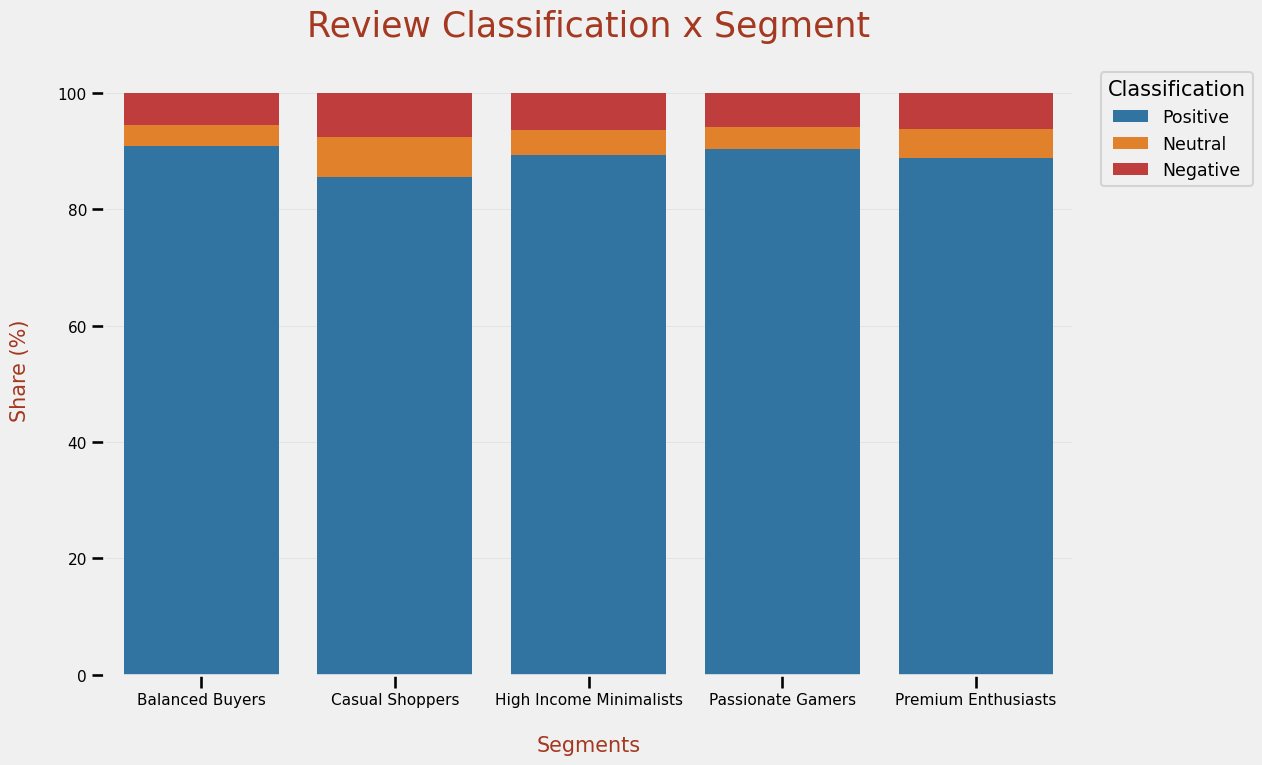

In [177]:
# Plot the stacked bar chart.
plt.figure(figsize = (13, 8))
sns.barplot(x = 'segment_names', y = 'positive', data = segments_reviews_pivot, color = '#1f77b4', label = 'Positive')
sns.barplot(x = 'segment_names', y = 'neutral', data = segments_reviews_pivot, color = '#ff7f0e',
            label='Neutral', bottom = segments_reviews_pivot['positive'])
sns.barplot(x = 'segment_names', y = 'negative', data = segments_reviews_pivot, color = '#d62728',
            label = 'Negative', bottom = segments_reviews_pivot['positive'] + segments_reviews_pivot['neutral'])
plt.title('Review Classification x Segment', color  ='#a43820', size = 25, pad = 20)
plt.xlabel('Segments', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.legend(title = 'Classification', fontsize = 'x-small', title_fontsize = 'small', loc = 'best', bbox_to_anchor = (1.02, 1))
plt.tight_layout()
plt.show()

Casual Shoppers are the group that display least percentage of positive happiness. That might lead to least purchases so targeting those grupos with promotions might be a good strategy.

<span style="color: #808080; font-style: italic;">Segment Groups and Summary</span>

In [178]:
# Group by Segment group and classification.
segments_summaries = df4_final.groupby('segment_names')['summary_classification_vader'].value_counts().reset_index()

# Pivot DataFrame.
segments_summaries_pivot = segments_summaries.pivot(index = 'segment_names', columns = 'summary_classification_vader',
                                                    values = 'count').reset_index()

# Calculate shares.
segments_summaries_pivot[['positive', 'negative', 'neutral']] = segments_summaries_pivot[['positive', 'negative', 'neutral']].\
                                                                apply(lambda x: round((x/x.sum()*100), 2), axis = 1)

# Visualize DataFrame.
segments_summaries_pivot

summary_classification_vader            segment_names  negative  neutral  \
0                                     Balanced Buyers      5.80    34.55   
1                                     Casual Shoppers      5.73    38.55   
2                             High Income Minimalists      5.45    37.58   
3                                   Passionate Gamers      7.34    33.98   
4                                 Premium Enthusiasts      6.18    37.64   

summary_classification_vader  positive  
0                                59.65  
1                                55.73  
2                                56.97  
3                                58.69  
4                                56.18

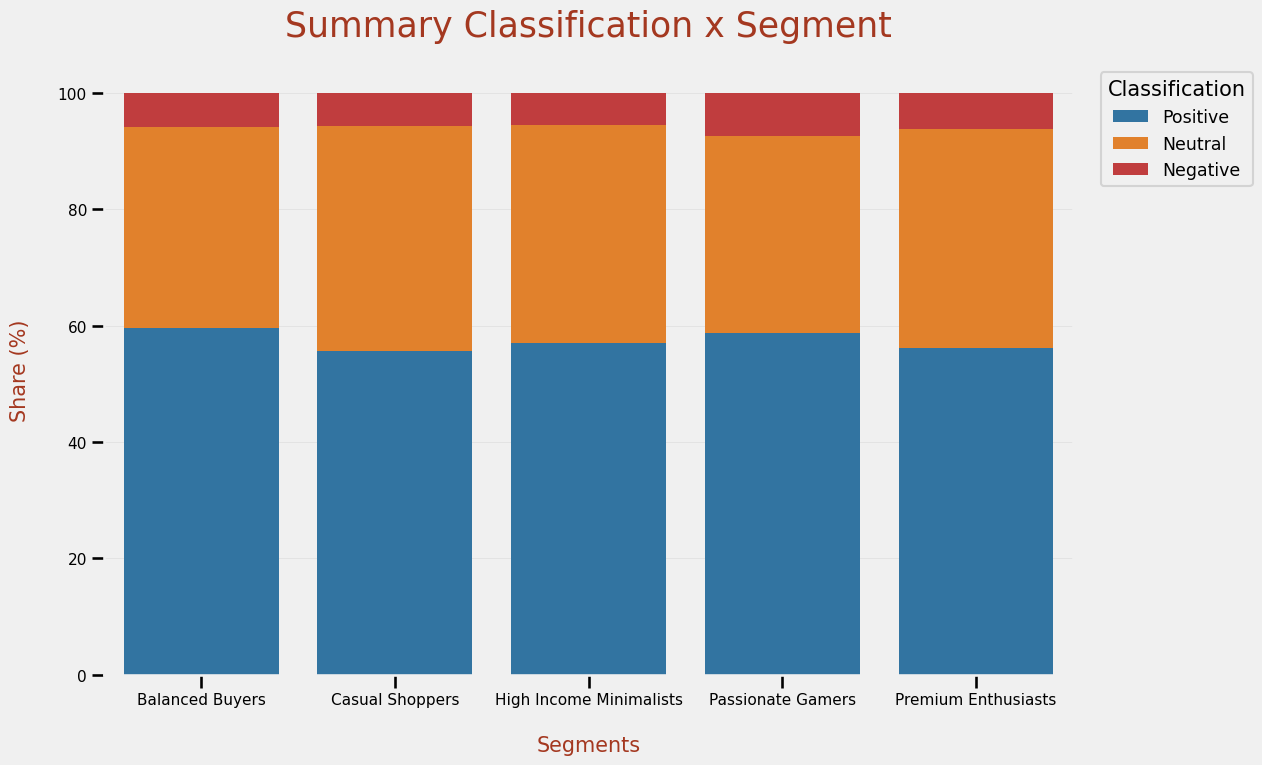

In [179]:
# Plot the stacked bar chart.
plt.figure(figsize = (13, 8))
sns.barplot(x = 'segment_names', y = 'positive', data = segments_summaries_pivot, color = '#1f77b4', label = 'Positive')
sns.barplot(x = 'segment_names', y = 'neutral', data = segments_summaries_pivot, color = '#ff7f0e',
            label='Neutral', bottom = segments_summaries_pivot['positive'])
sns.barplot(x = 'segment_names', y = 'negative', data = segments_summaries_pivot, color = '#d62728',
            label = 'Negative', bottom = segments_summaries_pivot['positive'] + segments_summaries_pivot['neutral'])
plt.title('Summary Classification x Segment', color  ='#a43820', size = 25, pad = 20)
plt.xlabel('Segments', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Share (%)', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis = 'y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.legend(title = 'Classification', fontsize = 'x-small', title_fontsize = 'small', loc = 'best', bbox_to_anchor = (1.02, 1))
plt.tight_layout()
plt.show()

Again, Casual Shoppers are the ones with the least positivity. Passionate Gamers have a higher percentage of Negative Summaries. This is an important group with a high spending score and repeated purchases, so it is important to monitor this to avoid losing customers.

<span style="color: #808080; font-style: italic;">Loyalty Points x Review Score</span>

In [180]:
# Create a table with an average score per client.
average_client = df4_final.groupby('client_id')[['compound_review', 'compound_summary']].mean().reset_index()

# Merge with clients data.
clients_score = pd.merge(clients_segments, average_client, on = 'client_id', how = 'left')

# Visualize it.
clients_score.head()

age  remuneration  spending_score  gender     education  number_of_sales  \
0   17         13.94              40  Female  Postgraduate                1   
1   17         18.86              98    Male           Phd                1   
2   17         27.06               4    Male           Phd                1   
3   17         27.06              92    Male           Phd                7   
4   17         35.26              54  Female  Postgraduate                1   

   client_id  loyalty_points  segment      segment_names  compound_review  \
0          1             233        4    Casual Shoppers         0.000000   
1          2             774        2  Passionate Gamers         0.670300   
2          3              45        4    Casual Shoppers         0.510600   
3          4            1042        2  Passionate Gamers         0.712557   
4          5             797        0    Balanced Buyers         0.690800   

   compound_summary  
0          0.000000  
1         -0.296000  
2          0.510600  
3          0.371643  
4          0.000000

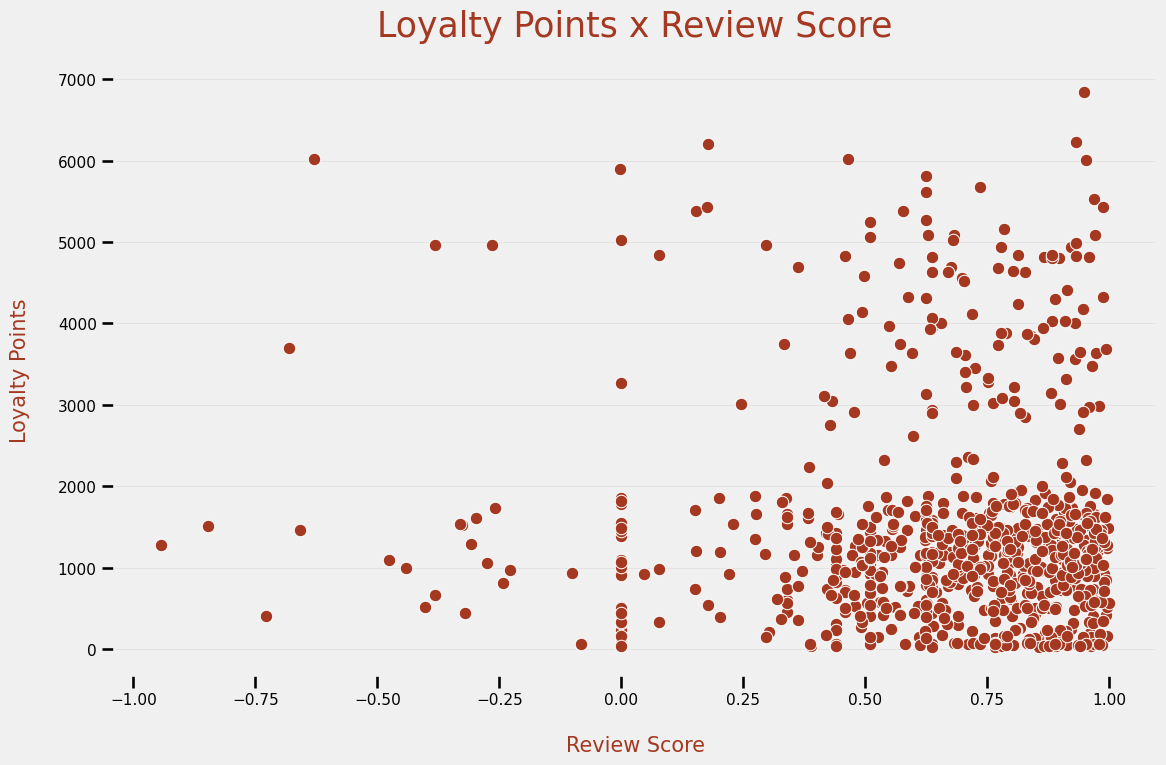

In [181]:
# Visualize Loyalty Points x Review Score.
scatterplot('compound_review', 'loyalty_points', clients_score,
            title = 'Loyalty Points x Review Score',
            xlabel = 'Review Score',
            ylabel = 'Loyalty Points')

No clear relationship between loyalty points and review score.

<span style="color: #808080; font-style: italic;">Loyalty Points x Summary Score</span>

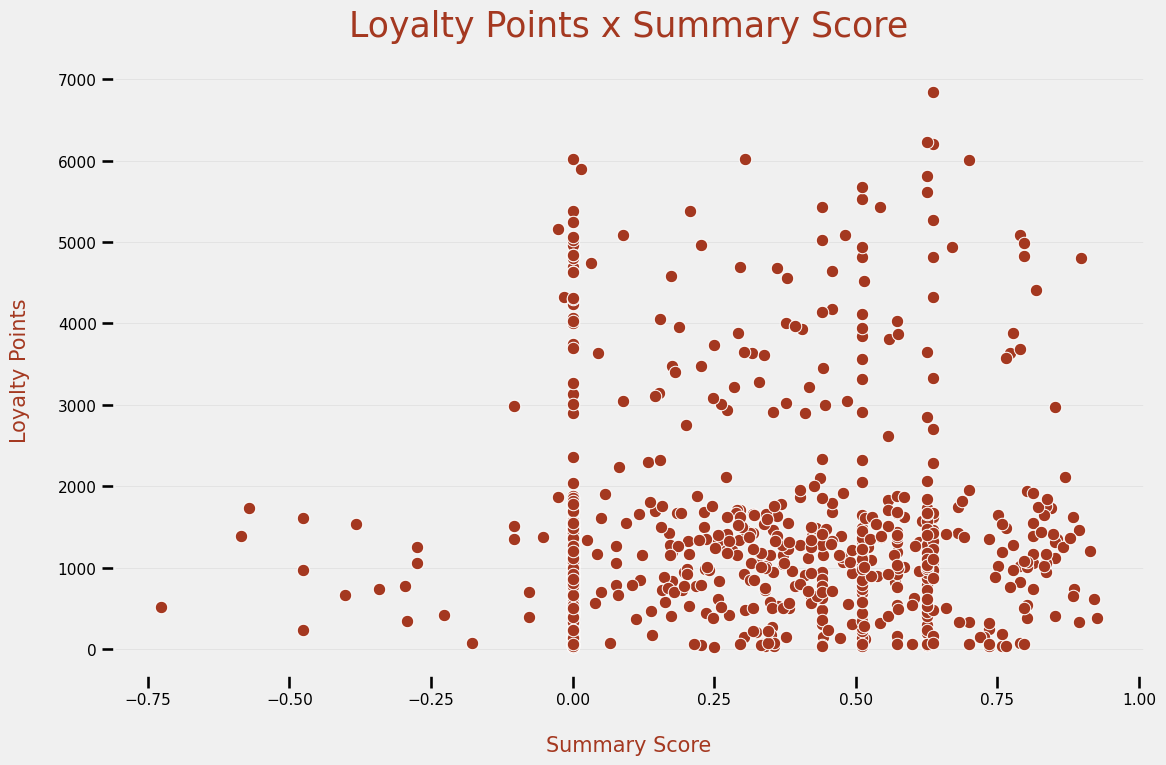

In [182]:
# Visualize Loyalty Points x Review Score.
scatterplot('compound_summary', 'loyalty_points', clients_score,
            title = 'Loyalty Points x Summary Score',
            xlabel = 'Summary Score',
            ylabel = 'Loyalty Points')

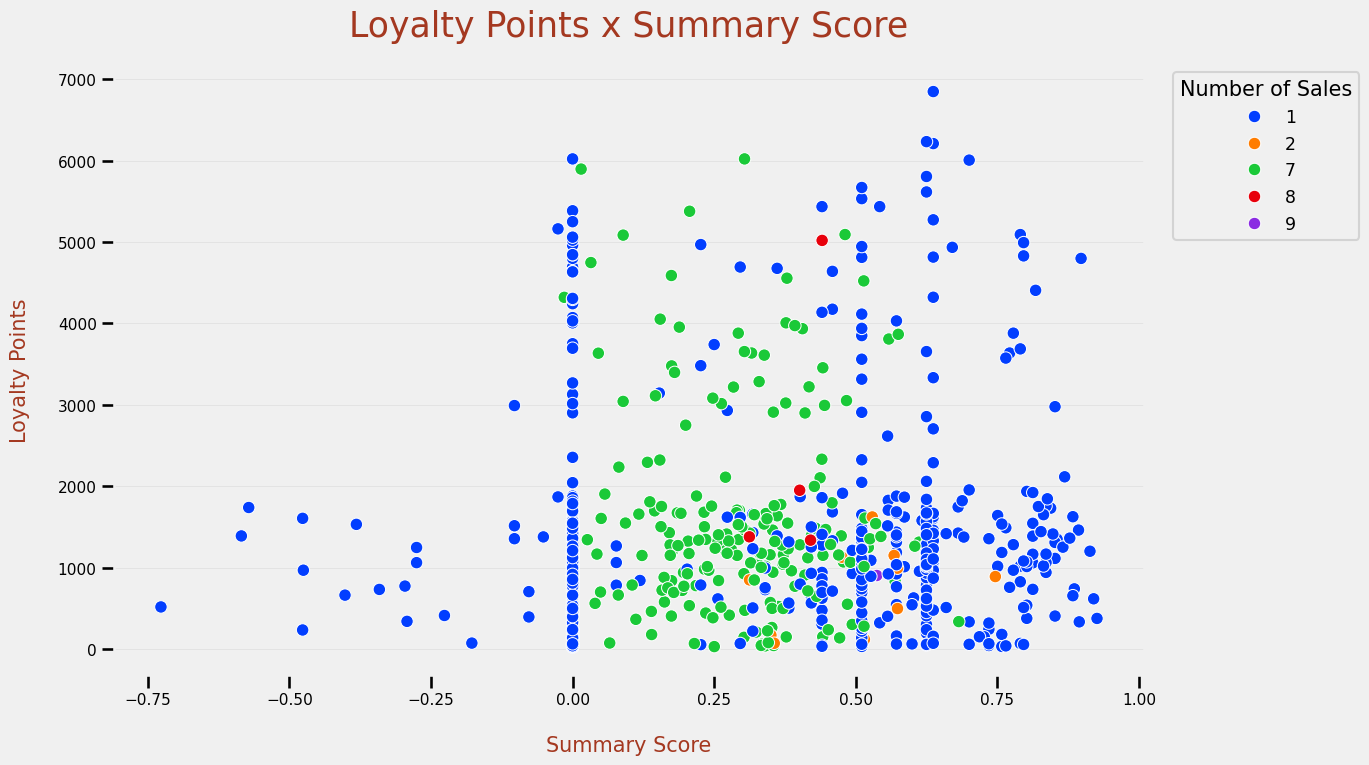

In [183]:
# Visualize the same but with number of sales.
scatterplot_for_clustering('compound_summary', 'loyalty_points', clients_score, 'number_of_sales',
                           title = 'Loyalty Points x Summary Score',
                           xlabel = 'Summary Score',
                           ylabel = 'Loyalty Points',
                           titlelegend = 'Number of Sales')

A positive summary doesn't necessarily correlate with high or low loyalty points, but a negative summary almost always results in low loyalty points and never a repeated purchase. Therefore, it's crucial to address customers who have low summary scores. Implementing strategies such as offering compensation, providing vouchers for future purchases, or issuing refunds can help mitigate the negative impact of their experiences. These proactive measures not only resolve current dissatisfaction but also improve future customer loyalty and satisfaction.

<div style="background-color:#a43820; color:white; padding:20px; text-align:center; font-weight:bold; border-radius: 8px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">

<h2 style="font-size: 24px;">End of analysis</h2>
    
</div>